In [1]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/karpathy/minGPT.git
%cd minGPT/

Cloning into 'minGPT'...
remote: Enumerating objects: 175, done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (175/175), 1.37 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (101/101), done.
/kaggle/working/minGPT


In [3]:
import logging
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
)

In [4]:
from mingpt.utils import set_seed
set_seed(42)

In [6]:
root = './'
train_data = torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=True)
test_data  = torchvision.datasets.MNIST(root, train=False, transform=None, target_transform=None, download=True)
print(len(train_data), len(test_data))

60000 10000


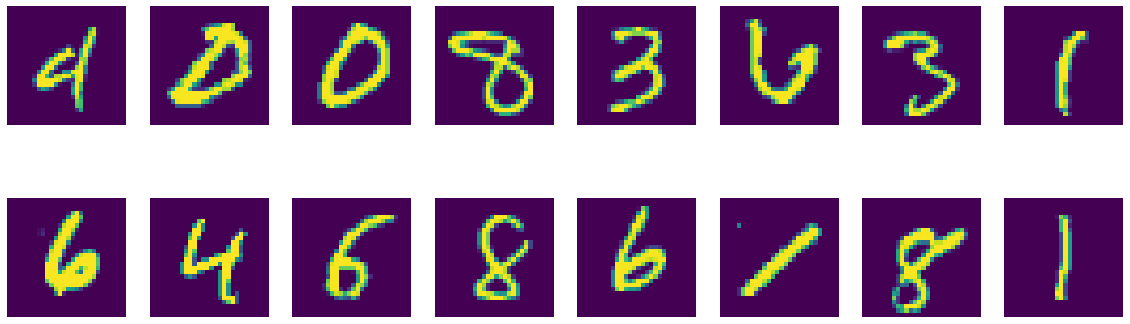

In [7]:
n_samples = 16
ncol = 8
nrow = n_samples // ncol + 1
plt.figure(figsize=(20, 10))
for i in range(n_samples):
    
    # encode and decode random data
    x, y = train_data[np.random.randint(0, len(train_data))]
    xpt = torch.from_numpy(np.array(x)).float().view(28*28)
  
    
    # these images should look normal ideally
    plt.subplot(nrow, ncol, i+1)
    plt.imshow(xpt.view(28,28).numpy().astype(np.uint8))
    plt.axis('off')
    

In [8]:
from torch.utils.data import Dataset
class ImageDataset(Dataset):
    """
    wrap up the pytorch CIFAR-10 dataset into our own, which will convert images into sequences of integers
    """
    
    def __init__(self, pt_dataset):
        self.pt_dataset = pt_dataset
        
        
        self.vocab_size = 256
        self.block_size = 28*28 - 1
        
    def __len__(self):
        return len(self.pt_dataset)

    def __getitem__(self, idx):
        x, y = self.pt_dataset[idx]
        x = torch.from_numpy(np.array(x)).view(-1) # flatten out all pixels
        x = x.long() # reshuffle pixels with any fixed permutation and -> float
        
        return x[:-1],x[1:] # always just predict the next one in the sequence

train_dataset = ImageDataset(train_data)
test_dataset = ImageDataset(test_data)
train_dataset[10][0].size() # one example image flattened out into integers

torch.Size([783])

In [9]:
from mingpt.model import GPT, GPTConfig, GPT1Config

# we'll do something a bit smaller
mconf = GPTConfig(train_dataset.vocab_size, train_dataset.block_size,
                  embd_pdrop=0.0, resid_pdrop=0.0, attn_pdrop=0.0,
                  n_layer=6, n_head=8, n_embd=256)
model = GPT(mconf)

In [10]:
from mingpt.trainer import Trainer, TrainerConfig

tokens_per_epoch = len(train_data) * train_dataset.block_size
train_epochs = 4 # todo run a bigger model and longer, this is tiny

# initialize a trainer instance and kick off training
tconf = TrainerConfig(max_epochs=train_epochs, batch_size=8, learning_rate=3e-3,
                      betas = (0.9, 0.95), weight_decay=0,
                      lr_decay=True, warmup_tokens=tokens_per_epoch, final_tokens=train_epochs*tokens_per_epoch,
                      ckpt_path='mnist.pt',
                      num_workers=8)
trainer = Trainer(model, train_dataset, test_dataset, tconf)
trainer.train()





  0%|          | 0/7500 [00:00<?, ?it/s]



epoch 1 iter 0: train loss 5.48778. lr 4.000000e-07:   0%|          | 0/7500 [00:01<?, ?it/s]



epoch 1 iter 0: train loss 5.48778. lr 4.000000e-07:   0%|          | 1/7500 [00:01<2:10:23,  1.04s/it]



epoch 1 iter 1: train loss 3.01602. lr 8.000000e-07:   0%|          | 1/7500 [00:01<2:10:23,  1.04s/it]



epoch 1 iter 1: train loss 3.01602. lr 8.000000e-07:   0%|          | 2/7500 [00:01<1:15:41,  1.65it/s]



epoch 1 iter 2: train loss 2.91933. lr 1.200000e-06:   0%|          | 2/7500 [00:01<1:15:41,  1.65it/s]



epoch 1 iter 2: train loss 2.91933. lr 1.200000e-06:   0%|          | 3/7500 [00:01<58:12,  2.15it/s]  



epoch 1 iter 3: train loss 3.07036. lr 1.600000e-06:   0%|          | 3/7500 [00:01<58:12,  2.15it/s]



epoch 1 iter 3: train loss 3.07036. lr 1.600000e-06:   0%|          | 4/7500 [00:01<49:58,  2.50it/s]



epoch 1 iter 4: train loss 2.95850. lr 2.000000e-06:   0%|          | 4/7500 [00:02<49:58,  2.50it/s]



epoch

epoch 1 iter 34: train loss 1.93586. lr 1.400000e-05:   0%|          | 34/7500 [00:11<37:08,  3.35it/s]



epoch 1 iter 34: train loss 1.93586. lr 1.400000e-05:   0%|          | 35/7500 [00:11<36:59,  3.36it/s]



epoch 1 iter 35: train loss 1.66641. lr 1.440000e-05:   0%|          | 35/7500 [00:11<36:59,  3.36it/s]



epoch 1 iter 35: train loss 1.66641. lr 1.440000e-05:   0%|          | 36/7500 [00:11<36:47,  3.38it/s]



epoch 1 iter 36: train loss 1.85089. lr 1.480000e-05:   0%|          | 36/7500 [00:11<36:47,  3.38it/s]



epoch 1 iter 36: train loss 1.85089. lr 1.480000e-05:   0%|          | 37/7500 [00:11<36:45,  3.38it/s]



epoch 1 iter 37: train loss 1.90151. lr 1.520000e-05:   0%|          | 37/7500 [00:12<36:45,  3.38it/s]



epoch 1 iter 37: train loss 1.90151. lr 1.520000e-05:   1%|          | 38/7500 [00:12<36:47,  3.38it/s]



epoch 1 iter 38: train loss 1.57972. lr 1.560000e-05:   1%|          | 38/7500 [00:12<36:47,  3.38it/s]



epoch 1 iter 38: train loss 1.57972. 

epoch 1 iter 68: train loss 1.77160. lr 2.760000e-05:   1%|          | 68/7500 [00:21<36:57,  3.35it/s]



epoch 1 iter 68: train loss 1.77160. lr 2.760000e-05:   1%|          | 69/7500 [00:21<36:45,  3.37it/s]



epoch 1 iter 69: train loss 1.81045. lr 2.800000e-05:   1%|          | 69/7500 [00:21<36:45,  3.37it/s]



epoch 1 iter 69: train loss 1.81045. lr 2.800000e-05:   1%|          | 70/7500 [00:21<36:41,  3.37it/s]



epoch 1 iter 70: train loss 1.61146. lr 2.840000e-05:   1%|          | 70/7500 [00:22<36:41,  3.37it/s]



epoch 1 iter 70: train loss 1.61146. lr 2.840000e-05:   1%|          | 71/7500 [00:22<36:48,  3.36it/s]



epoch 1 iter 71: train loss 1.59702. lr 2.880000e-05:   1%|          | 71/7500 [00:22<36:48,  3.36it/s]



epoch 1 iter 71: train loss 1.59702. lr 2.880000e-05:   1%|          | 72/7500 [00:22<36:39,  3.38it/s]



epoch 1 iter 72: train loss 1.70382. lr 2.920000e-05:   1%|          | 72/7500 [00:22<36:39,  3.38it/s]



epoch 1 iter 72: train loss 1.70382. 

epoch 1 iter 102: train loss 1.42270. lr 4.120000e-05:   1%|▏         | 102/7500 [00:31<37:06,  3.32it/s]



epoch 1 iter 102: train loss 1.42270. lr 4.120000e-05:   1%|▏         | 103/7500 [00:31<36:55,  3.34it/s]



epoch 1 iter 103: train loss 1.43001. lr 4.160000e-05:   1%|▏         | 103/7500 [00:32<36:55,  3.34it/s]



epoch 1 iter 103: train loss 1.43001. lr 4.160000e-05:   1%|▏         | 104/7500 [00:32<36:54,  3.34it/s]



epoch 1 iter 104: train loss 1.34125. lr 4.200000e-05:   1%|▏         | 104/7500 [00:32<36:54,  3.34it/s]



epoch 1 iter 104: train loss 1.34125. lr 4.200000e-05:   1%|▏         | 105/7500 [00:32<36:51,  3.34it/s]



epoch 1 iter 105: train loss 1.40519. lr 4.240000e-05:   1%|▏         | 105/7500 [00:32<36:51,  3.34it/s]



epoch 1 iter 105: train loss 1.40519. lr 4.240000e-05:   1%|▏         | 106/7500 [00:32<36:38,  3.36it/s]



epoch 1 iter 106: train loss 1.29974. lr 4.280000e-05:   1%|▏         | 106/7500 [00:33<36:38,  3.36it/s]



epoch 1 iter 106: t

epoch 1 iter 135: train loss 1.19991. lr 5.440000e-05:   2%|▏         | 136/7500 [00:41<36:26,  3.37it/s]



epoch 1 iter 136: train loss 1.18811. lr 5.480000e-05:   2%|▏         | 136/7500 [00:41<36:26,  3.37it/s]



epoch 1 iter 136: train loss 1.18811. lr 5.480000e-05:   2%|▏         | 137/7500 [00:41<36:31,  3.36it/s]



epoch 1 iter 137: train loss 1.19081. lr 5.520000e-05:   2%|▏         | 137/7500 [00:42<36:31,  3.36it/s]



epoch 1 iter 137: train loss 1.19081. lr 5.520000e-05:   2%|▏         | 138/7500 [00:42<36:23,  3.37it/s]



epoch 1 iter 138: train loss 1.12730. lr 5.560000e-05:   2%|▏         | 138/7500 [00:42<36:23,  3.37it/s]



epoch 1 iter 138: train loss 1.12730. lr 5.560000e-05:   2%|▏         | 139/7500 [00:42<36:48,  3.33it/s]



epoch 1 iter 139: train loss 1.21207. lr 5.600000e-05:   2%|▏         | 139/7500 [00:42<36:48,  3.33it/s]



epoch 1 iter 139: train loss 1.21207. lr 5.600000e-05:   2%|▏         | 140/7500 [00:42<36:39,  3.35it/s]



epoch 1 iter 140: t

epoch 1 iter 169: train loss 1.13668. lr 6.800000e-05:   2%|▏         | 169/7500 [00:51<36:12,  3.38it/s]



epoch 1 iter 169: train loss 1.13668. lr 6.800000e-05:   2%|▏         | 170/7500 [00:51<36:14,  3.37it/s]



epoch 1 iter 170: train loss 1.21411. lr 6.840000e-05:   2%|▏         | 170/7500 [00:52<36:14,  3.37it/s]



epoch 1 iter 170: train loss 1.21411. lr 6.840000e-05:   2%|▏         | 171/7500 [00:52<36:12,  3.37it/s]



epoch 1 iter 171: train loss 0.97450. lr 6.880000e-05:   2%|▏         | 171/7500 [00:52<36:12,  3.37it/s]



epoch 1 iter 171: train loss 0.97450. lr 6.880000e-05:   2%|▏         | 172/7500 [00:52<36:15,  3.37it/s]



epoch 1 iter 172: train loss 0.99661. lr 6.920000e-05:   2%|▏         | 172/7500 [00:52<36:15,  3.37it/s]



epoch 1 iter 172: train loss 0.99661. lr 6.920000e-05:   2%|▏         | 173/7500 [00:52<35:54,  3.40it/s]



epoch 1 iter 173: train loss 1.09726. lr 6.960000e-05:   2%|▏         | 173/7500 [00:53<35:54,  3.40it/s]



epoch 1 iter 173: t

epoch 1 iter 202: train loss 1.08702. lr 8.120000e-05:   3%|▎         | 203/7500 [01:01<42:12,  2.88it/s]



epoch 1 iter 203: train loss 0.88533. lr 8.160000e-05:   3%|▎         | 203/7500 [01:02<42:12,  2.88it/s]



epoch 1 iter 203: train loss 0.88533. lr 8.160000e-05:   3%|▎         | 204/7500 [01:02<40:17,  3.02it/s]



epoch 1 iter 204: train loss 1.05394. lr 8.200000e-05:   3%|▎         | 204/7500 [01:02<40:17,  3.02it/s]



epoch 1 iter 204: train loss 1.05394. lr 8.200000e-05:   3%|▎         | 205/7500 [01:02<38:44,  3.14it/s]



epoch 1 iter 205: train loss 0.99840. lr 8.240000e-05:   3%|▎         | 205/7500 [01:02<38:44,  3.14it/s]



epoch 1 iter 205: train loss 0.99840. lr 8.240000e-05:   3%|▎         | 206/7500 [01:02<38:10,  3.18it/s]



epoch 1 iter 206: train loss 1.08214. lr 8.280000e-05:   3%|▎         | 206/7500 [01:03<38:10,  3.18it/s]



epoch 1 iter 206: train loss 1.08214. lr 8.280000e-05:   3%|▎         | 207/7500 [01:03<37:20,  3.25it/s]



epoch 1 iter 207: t

epoch 1 iter 236: train loss 1.04928. lr 9.480000e-05:   3%|▎         | 236/7500 [01:11<35:58,  3.37it/s]



epoch 1 iter 236: train loss 1.04928. lr 9.480000e-05:   3%|▎         | 237/7500 [01:11<37:29,  3.23it/s]



epoch 1 iter 237: train loss 0.94420. lr 9.520000e-05:   3%|▎         | 237/7500 [01:12<37:29,  3.23it/s]



epoch 1 iter 237: train loss 0.94420. lr 9.520000e-05:   3%|▎         | 238/7500 [01:12<37:59,  3.19it/s]



epoch 1 iter 238: train loss 1.02313. lr 9.560000e-05:   3%|▎         | 238/7500 [01:12<37:59,  3.19it/s]



epoch 1 iter 238: train loss 1.02313. lr 9.560000e-05:   3%|▎         | 239/7500 [01:12<37:20,  3.24it/s]



epoch 1 iter 239: train loss 1.01230. lr 9.600000e-05:   3%|▎         | 239/7500 [01:12<37:20,  3.24it/s]



epoch 1 iter 239: train loss 1.01230. lr 9.600000e-05:   3%|▎         | 240/7500 [01:12<37:07,  3.26it/s]



epoch 1 iter 240: train loss 1.00969. lr 9.640000e-05:   3%|▎         | 240/7500 [01:13<37:07,  3.26it/s]



epoch 1 iter 240: t

epoch 1 iter 269: train loss 0.93722. lr 1.080000e-04:   4%|▎         | 270/7500 [01:21<34:58,  3.45it/s]



epoch 1 iter 270: train loss 0.95185. lr 1.084000e-04:   4%|▎         | 270/7500 [01:21<34:58,  3.45it/s]



epoch 1 iter 270: train loss 0.95185. lr 1.084000e-04:   4%|▎         | 271/7500 [01:21<35:01,  3.44it/s]



epoch 1 iter 271: train loss 0.93511. lr 1.088000e-04:   4%|▎         | 271/7500 [01:22<35:01,  3.44it/s]



epoch 1 iter 271: train loss 0.93511. lr 1.088000e-04:   4%|▎         | 272/7500 [01:22<34:59,  3.44it/s]



epoch 1 iter 272: train loss 0.93678. lr 1.092000e-04:   4%|▎         | 272/7500 [01:22<34:59,  3.44it/s]



epoch 1 iter 272: train loss 0.93678. lr 1.092000e-04:   4%|▎         | 273/7500 [01:22<35:15,  3.42it/s]



epoch 1 iter 273: train loss 1.03663. lr 1.096000e-04:   4%|▎         | 273/7500 [01:22<35:15,  3.42it/s]



epoch 1 iter 273: train loss 1.03663. lr 1.096000e-04:   4%|▎         | 274/7500 [01:22<35:59,  3.35it/s]



epoch 1 iter 274: t

epoch 1 iter 303: train loss 0.94439. lr 1.216000e-04:   4%|▍         | 303/7500 [01:31<35:14,  3.40it/s]



epoch 1 iter 303: train loss 0.94439. lr 1.216000e-04:   4%|▍         | 304/7500 [01:31<35:15,  3.40it/s]



epoch 1 iter 304: train loss 0.98348. lr 1.220000e-04:   4%|▍         | 304/7500 [01:31<35:15,  3.40it/s]



epoch 1 iter 304: train loss 0.98348. lr 1.220000e-04:   4%|▍         | 305/7500 [01:31<35:19,  3.40it/s]



epoch 1 iter 305: train loss 0.93773. lr 1.224000e-04:   4%|▍         | 305/7500 [01:32<35:19,  3.40it/s]



epoch 1 iter 305: train loss 0.93773. lr 1.224000e-04:   4%|▍         | 306/7500 [01:32<35:26,  3.38it/s]



epoch 1 iter 306: train loss 0.90771. lr 1.228000e-04:   4%|▍         | 306/7500 [01:32<35:26,  3.38it/s]



epoch 1 iter 306: train loss 0.90771. lr 1.228000e-04:   4%|▍         | 307/7500 [01:32<35:22,  3.39it/s]



epoch 1 iter 307: train loss 0.90834. lr 1.232000e-04:   4%|▍         | 307/7500 [01:32<35:22,  3.39it/s]



epoch 1 iter 307: t

epoch 1 iter 336: train loss 1.03068. lr 1.348000e-04:   4%|▍         | 337/7500 [01:41<34:57,  3.41it/s]



epoch 1 iter 337: train loss 0.87147. lr 1.352000e-04:   4%|▍         | 337/7500 [01:42<34:57,  3.41it/s]



epoch 1 iter 337: train loss 0.87147. lr 1.352000e-04:   5%|▍         | 338/7500 [01:42<34:59,  3.41it/s]



epoch 1 iter 338: train loss 0.99226. lr 1.356000e-04:   5%|▍         | 338/7500 [01:42<34:59,  3.41it/s]



epoch 1 iter 338: train loss 0.99226. lr 1.356000e-04:   5%|▍         | 339/7500 [01:42<34:55,  3.42it/s]



epoch 1 iter 339: train loss 0.99453. lr 1.360000e-04:   5%|▍         | 339/7500 [01:42<34:55,  3.42it/s]



epoch 1 iter 339: train loss 0.99453. lr 1.360000e-04:   5%|▍         | 340/7500 [01:42<35:27,  3.36it/s]



epoch 1 iter 340: train loss 0.92534. lr 1.364000e-04:   5%|▍         | 340/7500 [01:42<35:27,  3.36it/s]



epoch 1 iter 340: train loss 0.92534. lr 1.364000e-04:   5%|▍         | 341/7500 [01:42<35:20,  3.38it/s]



epoch 1 iter 341: t

epoch 1 iter 370: train loss 1.00314. lr 1.484000e-04:   5%|▍         | 370/7500 [01:51<35:09,  3.38it/s]



epoch 1 iter 370: train loss 1.00314. lr 1.484000e-04:   5%|▍         | 371/7500 [01:51<35:03,  3.39it/s]



epoch 1 iter 371: train loss 0.92202. lr 1.488000e-04:   5%|▍         | 371/7500 [01:52<35:03,  3.39it/s]



epoch 1 iter 371: train loss 0.92202. lr 1.488000e-04:   5%|▍         | 372/7500 [01:52<34:49,  3.41it/s]



epoch 1 iter 372: train loss 1.09471. lr 1.492000e-04:   5%|▍         | 372/7500 [01:52<34:49,  3.41it/s]



epoch 1 iter 372: train loss 1.09471. lr 1.492000e-04:   5%|▍         | 373/7500 [01:52<34:41,  3.42it/s]



epoch 1 iter 373: train loss 1.03760. lr 1.496000e-04:   5%|▍         | 373/7500 [01:52<34:41,  3.42it/s]



epoch 1 iter 373: train loss 1.03760. lr 1.496000e-04:   5%|▍         | 374/7500 [01:52<34:53,  3.40it/s]



epoch 1 iter 374: train loss 0.93457. lr 1.500000e-04:   5%|▍         | 374/7500 [01:52<34:53,  3.40it/s]



epoch 1 iter 374: t

epoch 1 iter 403: train loss 1.00086. lr 1.616000e-04:   5%|▌         | 404/7500 [02:01<34:22,  3.44it/s]



epoch 1 iter 404: train loss 0.83332. lr 1.620000e-04:   5%|▌         | 404/7500 [02:01<34:22,  3.44it/s]



epoch 1 iter 404: train loss 0.83332. lr 1.620000e-04:   5%|▌         | 405/7500 [02:01<34:25,  3.43it/s]



epoch 1 iter 405: train loss 0.83556. lr 1.624000e-04:   5%|▌         | 405/7500 [02:02<34:25,  3.43it/s]



epoch 1 iter 405: train loss 0.83556. lr 1.624000e-04:   5%|▌         | 406/7500 [02:02<34:22,  3.44it/s]



epoch 1 iter 406: train loss 0.79108. lr 1.628000e-04:   5%|▌         | 406/7500 [02:02<34:22,  3.44it/s]



epoch 1 iter 406: train loss 0.79108. lr 1.628000e-04:   5%|▌         | 407/7500 [02:02<34:14,  3.45it/s]



epoch 1 iter 407: train loss 1.03393. lr 1.632000e-04:   5%|▌         | 407/7500 [02:02<34:14,  3.45it/s]



epoch 1 iter 407: train loss 1.03393. lr 1.632000e-04:   5%|▌         | 408/7500 [02:02<34:17,  3.45it/s]



epoch 1 iter 408: t

epoch 1 iter 437: train loss 0.98228. lr 1.752000e-04:   6%|▌         | 437/7500 [02:11<34:24,  3.42it/s]



epoch 1 iter 437: train loss 0.98228. lr 1.752000e-04:   6%|▌         | 438/7500 [02:11<34:27,  3.42it/s]



epoch 1 iter 438: train loss 1.02746. lr 1.756000e-04:   6%|▌         | 438/7500 [02:11<34:27,  3.42it/s]



epoch 1 iter 438: train loss 1.02746. lr 1.756000e-04:   6%|▌         | 439/7500 [02:11<34:19,  3.43it/s]



epoch 1 iter 439: train loss 0.94929. lr 1.760000e-04:   6%|▌         | 439/7500 [02:12<34:19,  3.43it/s]



epoch 1 iter 439: train loss 0.94929. lr 1.760000e-04:   6%|▌         | 440/7500 [02:12<34:26,  3.42it/s]



epoch 1 iter 440: train loss 0.93227. lr 1.764000e-04:   6%|▌         | 440/7500 [02:12<34:26,  3.42it/s]



epoch 1 iter 440: train loss 0.93227. lr 1.764000e-04:   6%|▌         | 441/7500 [02:12<34:27,  3.41it/s]



epoch 1 iter 441: train loss 0.75130. lr 1.768000e-04:   6%|▌         | 441/7500 [02:12<34:27,  3.41it/s]



epoch 1 iter 441: t

epoch 1 iter 470: train loss 0.94676. lr 1.884000e-04:   6%|▋         | 471/7500 [02:21<34:05,  3.44it/s]



epoch 1 iter 471: train loss 0.96824. lr 1.888000e-04:   6%|▋         | 471/7500 [02:21<34:05,  3.44it/s]



epoch 1 iter 471: train loss 0.96824. lr 1.888000e-04:   6%|▋         | 472/7500 [02:21<34:06,  3.43it/s]



epoch 1 iter 472: train loss 1.01647. lr 1.892000e-04:   6%|▋         | 472/7500 [02:21<34:06,  3.43it/s]



epoch 1 iter 472: train loss 1.01647. lr 1.892000e-04:   6%|▋         | 473/7500 [02:21<34:01,  3.44it/s]



epoch 1 iter 473: train loss 0.92876. lr 1.896000e-04:   6%|▋         | 473/7500 [02:22<34:01,  3.44it/s]



epoch 1 iter 473: train loss 0.92876. lr 1.896000e-04:   6%|▋         | 474/7500 [02:22<34:06,  3.43it/s]



epoch 1 iter 474: train loss 1.01591. lr 1.900000e-04:   6%|▋         | 474/7500 [02:22<34:06,  3.43it/s]



epoch 1 iter 474: train loss 1.01591. lr 1.900000e-04:   6%|▋         | 475/7500 [02:22<34:08,  3.43it/s]



epoch 1 iter 475: t

epoch 1 iter 504: train loss 0.93528. lr 2.020000e-04:   7%|▋         | 504/7500 [02:31<34:13,  3.41it/s]



epoch 1 iter 504: train loss 0.93528. lr 2.020000e-04:   7%|▋         | 505/7500 [02:31<34:17,  3.40it/s]



epoch 1 iter 505: train loss 1.06194. lr 2.024000e-04:   7%|▋         | 505/7500 [02:31<34:17,  3.40it/s]



epoch 1 iter 505: train loss 1.06194. lr 2.024000e-04:   7%|▋         | 506/7500 [02:31<34:08,  3.41it/s]



epoch 1 iter 506: train loss 0.92730. lr 2.028000e-04:   7%|▋         | 506/7500 [02:31<34:08,  3.41it/s]



epoch 1 iter 506: train loss 0.92730. lr 2.028000e-04:   7%|▋         | 507/7500 [02:31<34:02,  3.42it/s]



epoch 1 iter 507: train loss 1.05272. lr 2.032000e-04:   7%|▋         | 507/7500 [02:32<34:02,  3.42it/s]



epoch 1 iter 507: train loss 1.05272. lr 2.032000e-04:   7%|▋         | 508/7500 [02:32<34:06,  3.42it/s]



epoch 1 iter 508: train loss 0.85331. lr 2.036000e-04:   7%|▋         | 508/7500 [02:32<34:06,  3.42it/s]



epoch 1 iter 508: t

epoch 1 iter 537: train loss 0.95421. lr 2.152000e-04:   7%|▋         | 538/7500 [02:41<35:16,  3.29it/s]



epoch 1 iter 538: train loss 0.96577. lr 2.156000e-04:   7%|▋         | 538/7500 [02:41<35:16,  3.29it/s]



epoch 1 iter 538: train loss 0.96577. lr 2.156000e-04:   7%|▋         | 539/7500 [02:41<34:52,  3.33it/s]



epoch 1 iter 539: train loss 0.86009. lr 2.160000e-04:   7%|▋         | 539/7500 [02:41<34:52,  3.33it/s]



epoch 1 iter 539: train loss 0.86009. lr 2.160000e-04:   7%|▋         | 540/7500 [02:41<34:38,  3.35it/s]



epoch 1 iter 540: train loss 0.94048. lr 2.164000e-04:   7%|▋         | 540/7500 [02:42<34:38,  3.35it/s]



epoch 1 iter 540: train loss 0.94048. lr 2.164000e-04:   7%|▋         | 541/7500 [02:42<34:30,  3.36it/s]



epoch 1 iter 541: train loss 0.95855. lr 2.168000e-04:   7%|▋         | 541/7500 [02:42<34:30,  3.36it/s]



epoch 1 iter 541: train loss 0.95855. lr 2.168000e-04:   7%|▋         | 542/7500 [02:42<34:25,  3.37it/s]



epoch 1 iter 542: t

epoch 1 iter 571: train loss 0.94115. lr 2.288000e-04:   8%|▊         | 571/7500 [02:51<35:01,  3.30it/s]



epoch 1 iter 571: train loss 0.94115. lr 2.288000e-04:   8%|▊         | 572/7500 [02:51<35:33,  3.25it/s]



epoch 1 iter 572: train loss 0.92580. lr 2.292000e-04:   8%|▊         | 572/7500 [02:51<35:33,  3.25it/s]



epoch 1 iter 572: train loss 0.92580. lr 2.292000e-04:   8%|▊         | 573/7500 [02:51<34:59,  3.30it/s]



epoch 1 iter 573: train loss 0.89615. lr 2.296000e-04:   8%|▊         | 573/7500 [02:51<34:59,  3.30it/s]



epoch 1 iter 573: train loss 0.89615. lr 2.296000e-04:   8%|▊         | 574/7500 [02:51<34:42,  3.33it/s]



epoch 1 iter 574: train loss 0.80120. lr 2.300000e-04:   8%|▊         | 574/7500 [02:52<34:42,  3.33it/s]



epoch 1 iter 574: train loss 0.80120. lr 2.300000e-04:   8%|▊         | 575/7500 [02:52<34:22,  3.36it/s]



epoch 1 iter 575: train loss 0.95705. lr 2.304000e-04:   8%|▊         | 575/7500 [02:52<34:22,  3.36it/s]



epoch 1 iter 575: t

epoch 1 iter 604: train loss 0.93905. lr 2.420000e-04:   8%|▊         | 605/7500 [03:00<33:29,  3.43it/s]



epoch 1 iter 605: train loss 0.93834. lr 2.424000e-04:   8%|▊         | 605/7500 [03:01<33:29,  3.43it/s]



epoch 1 iter 605: train loss 0.93834. lr 2.424000e-04:   8%|▊         | 606/7500 [03:01<33:38,  3.41it/s]



epoch 1 iter 606: train loss 0.79684. lr 2.428000e-04:   8%|▊         | 606/7500 [03:01<33:38,  3.41it/s]



epoch 1 iter 606: train loss 0.79684. lr 2.428000e-04:   8%|▊         | 607/7500 [03:01<33:39,  3.41it/s]



epoch 1 iter 607: train loss 0.99178. lr 2.432000e-04:   8%|▊         | 607/7500 [03:01<33:39,  3.41it/s]



epoch 1 iter 607: train loss 0.99178. lr 2.432000e-04:   8%|▊         | 608/7500 [03:01<34:36,  3.32it/s]



epoch 1 iter 608: train loss 0.88149. lr 2.436000e-04:   8%|▊         | 608/7500 [03:02<34:36,  3.32it/s]



epoch 1 iter 608: train loss 0.88149. lr 2.436000e-04:   8%|▊         | 609/7500 [03:02<35:19,  3.25it/s]



epoch 1 iter 609: t

epoch 1 iter 638: train loss 0.81479. lr 2.556000e-04:   9%|▊         | 638/7500 [03:10<33:16,  3.44it/s]



epoch 1 iter 638: train loss 0.81479. lr 2.556000e-04:   9%|▊         | 639/7500 [03:10<33:21,  3.43it/s]



epoch 1 iter 639: train loss 0.86282. lr 2.560000e-04:   9%|▊         | 639/7500 [03:11<33:21,  3.43it/s]



epoch 1 iter 639: train loss 0.86282. lr 2.560000e-04:   9%|▊         | 640/7500 [03:11<33:18,  3.43it/s]



epoch 1 iter 640: train loss 0.99480. lr 2.564000e-04:   9%|▊         | 640/7500 [03:11<33:18,  3.43it/s]



epoch 1 iter 640: train loss 0.99480. lr 2.564000e-04:   9%|▊         | 641/7500 [03:11<34:18,  3.33it/s]



epoch 1 iter 641: train loss 0.91160. lr 2.568000e-04:   9%|▊         | 641/7500 [03:11<34:18,  3.33it/s]



epoch 1 iter 641: train loss 0.91160. lr 2.568000e-04:   9%|▊         | 642/7500 [03:11<35:25,  3.23it/s]



epoch 1 iter 642: train loss 0.95938. lr 2.572000e-04:   9%|▊         | 642/7500 [03:12<35:25,  3.23it/s]



epoch 1 iter 642: t

epoch 1 iter 671: train loss 0.98300. lr 2.688000e-04:   9%|▉         | 672/7500 [03:20<33:23,  3.41it/s]



epoch 1 iter 672: train loss 0.93294. lr 2.692000e-04:   9%|▉         | 672/7500 [03:21<33:23,  3.41it/s]



epoch 1 iter 672: train loss 0.93294. lr 2.692000e-04:   9%|▉         | 673/7500 [03:21<33:25,  3.40it/s]



epoch 1 iter 673: train loss 0.78650. lr 2.696000e-04:   9%|▉         | 673/7500 [03:21<33:25,  3.40it/s]



epoch 1 iter 673: train loss 0.78650. lr 2.696000e-04:   9%|▉         | 674/7500 [03:21<33:22,  3.41it/s]



epoch 1 iter 674: train loss 0.95103. lr 2.700000e-04:   9%|▉         | 674/7500 [03:21<33:22,  3.41it/s]



epoch 1 iter 674: train loss 0.95103. lr 2.700000e-04:   9%|▉         | 675/7500 [03:21<33:13,  3.42it/s]



epoch 1 iter 675: train loss 0.86004. lr 2.704000e-04:   9%|▉         | 675/7500 [03:22<33:13,  3.42it/s]



epoch 1 iter 675: train loss 0.86004. lr 2.704000e-04:   9%|▉         | 676/7500 [03:22<33:21,  3.41it/s]



epoch 1 iter 676: t

epoch 1 iter 705: train loss 0.90259. lr 2.824000e-04:   9%|▉         | 705/7500 [03:30<33:23,  3.39it/s]



epoch 1 iter 705: train loss 0.90259. lr 2.824000e-04:   9%|▉         | 706/7500 [03:30<33:11,  3.41it/s]



epoch 1 iter 706: train loss 0.85877. lr 2.828000e-04:   9%|▉         | 706/7500 [03:31<33:11,  3.41it/s]



epoch 1 iter 706: train loss 0.85877. lr 2.828000e-04:   9%|▉         | 707/7500 [03:31<33:02,  3.43it/s]



epoch 1 iter 707: train loss 0.95884. lr 2.832000e-04:   9%|▉         | 707/7500 [03:31<33:02,  3.43it/s]



epoch 1 iter 707: train loss 0.95884. lr 2.832000e-04:   9%|▉         | 708/7500 [03:31<33:01,  3.43it/s]



epoch 1 iter 708: train loss 0.79953. lr 2.836000e-04:   9%|▉         | 708/7500 [03:31<33:01,  3.43it/s]



epoch 1 iter 708: train loss 0.79953. lr 2.836000e-04:   9%|▉         | 709/7500 [03:31<33:01,  3.43it/s]



epoch 1 iter 709: train loss 1.00244. lr 2.840000e-04:   9%|▉         | 709/7500 [03:32<33:01,  3.43it/s]



epoch 1 iter 709: t

epoch 1 iter 738: train loss 0.98209. lr 2.956000e-04:  10%|▉         | 739/7500 [03:40<32:51,  3.43it/s]



epoch 1 iter 739: train loss 0.84828. lr 2.960000e-04:  10%|▉         | 739/7500 [03:40<32:51,  3.43it/s]



epoch 1 iter 739: train loss 0.84828. lr 2.960000e-04:  10%|▉         | 740/7500 [03:40<32:44,  3.44it/s]



epoch 1 iter 740: train loss 0.90497. lr 2.964000e-04:  10%|▉         | 740/7500 [03:41<32:44,  3.44it/s]



epoch 1 iter 740: train loss 0.90497. lr 2.964000e-04:  10%|▉         | 741/7500 [03:41<32:50,  3.43it/s]



epoch 1 iter 741: train loss 0.90393. lr 2.968000e-04:  10%|▉         | 741/7500 [03:41<32:50,  3.43it/s]



epoch 1 iter 741: train loss 0.90393. lr 2.968000e-04:  10%|▉         | 742/7500 [03:41<32:46,  3.44it/s]



epoch 1 iter 742: train loss 0.90711. lr 2.972000e-04:  10%|▉         | 742/7500 [03:41<32:46,  3.44it/s]



epoch 1 iter 742: train loss 0.90711. lr 2.972000e-04:  10%|▉         | 743/7500 [03:41<32:47,  3.43it/s]



epoch 1 iter 743: t

epoch 1 iter 772: train loss 0.82269. lr 3.092000e-04:  10%|█         | 772/7500 [03:50<32:34,  3.44it/s]



epoch 1 iter 772: train loss 0.82269. lr 3.092000e-04:  10%|█         | 773/7500 [03:50<32:36,  3.44it/s]



epoch 1 iter 773: train loss 0.97625. lr 3.096000e-04:  10%|█         | 773/7500 [03:51<32:36,  3.44it/s]



epoch 1 iter 773: train loss 0.97625. lr 3.096000e-04:  10%|█         | 774/7500 [03:51<32:42,  3.43it/s]



epoch 1 iter 774: train loss 0.84791. lr 3.100000e-04:  10%|█         | 774/7500 [03:51<32:42,  3.43it/s]



epoch 1 iter 774: train loss 0.84791. lr 3.100000e-04:  10%|█         | 775/7500 [03:51<32:46,  3.42it/s]



epoch 1 iter 775: train loss 0.73946. lr 3.104000e-04:  10%|█         | 775/7500 [03:51<32:46,  3.42it/s]



epoch 1 iter 775: train loss 0.73946. lr 3.104000e-04:  10%|█         | 776/7500 [03:51<32:45,  3.42it/s]



epoch 1 iter 776: train loss 0.78225. lr 3.108000e-04:  10%|█         | 776/7500 [03:51<32:45,  3.42it/s]



epoch 1 iter 776: t

epoch 1 iter 805: train loss 1.01499. lr 3.224000e-04:  11%|█         | 806/7500 [04:00<32:45,  3.41it/s]



epoch 1 iter 806: train loss 1.04955. lr 3.228000e-04:  11%|█         | 806/7500 [04:00<32:45,  3.41it/s]



epoch 1 iter 806: train loss 1.04955. lr 3.228000e-04:  11%|█         | 807/7500 [04:00<32:33,  3.43it/s]



epoch 1 iter 807: train loss 0.97229. lr 3.232000e-04:  11%|█         | 807/7500 [04:01<32:33,  3.43it/s]



epoch 1 iter 807: train loss 0.97229. lr 3.232000e-04:  11%|█         | 808/7500 [04:01<32:30,  3.43it/s]



epoch 1 iter 808: train loss 0.90809. lr 3.236000e-04:  11%|█         | 808/7500 [04:01<32:30,  3.43it/s]



epoch 1 iter 808: train loss 0.90809. lr 3.236000e-04:  11%|█         | 809/7500 [04:01<32:37,  3.42it/s]



epoch 1 iter 809: train loss 0.80922. lr 3.240000e-04:  11%|█         | 809/7500 [04:01<32:37,  3.42it/s]



epoch 1 iter 809: train loss 0.80922. lr 3.240000e-04:  11%|█         | 810/7500 [04:01<32:28,  3.43it/s]



epoch 1 iter 810: t

epoch 1 iter 839: train loss 0.98876. lr 3.360000e-04:  11%|█         | 839/7500 [04:10<32:49,  3.38it/s]



epoch 1 iter 839: train loss 0.98876. lr 3.360000e-04:  11%|█         | 840/7500 [04:10<32:49,  3.38it/s]



epoch 1 iter 840: train loss 0.86619. lr 3.364000e-04:  11%|█         | 840/7500 [04:10<32:49,  3.38it/s]



epoch 1 iter 840: train loss 0.86619. lr 3.364000e-04:  11%|█         | 841/7500 [04:10<32:48,  3.38it/s]



epoch 1 iter 841: train loss 0.97465. lr 3.368000e-04:  11%|█         | 841/7500 [04:11<32:48,  3.38it/s]



epoch 1 iter 841: train loss 0.97465. lr 3.368000e-04:  11%|█         | 842/7500 [04:11<32:51,  3.38it/s]



epoch 1 iter 842: train loss 0.86744. lr 3.372000e-04:  11%|█         | 842/7500 [04:11<32:51,  3.38it/s]



epoch 1 iter 842: train loss 0.86744. lr 3.372000e-04:  11%|█         | 843/7500 [04:11<32:39,  3.40it/s]



epoch 1 iter 843: train loss 0.96158. lr 3.376000e-04:  11%|█         | 843/7500 [04:11<32:39,  3.40it/s]



epoch 1 iter 843: t

epoch 1 iter 872: train loss 0.93551. lr 3.492000e-04:  12%|█▏        | 873/7500 [04:20<32:49,  3.36it/s]



epoch 1 iter 873: train loss 1.04379. lr 3.496000e-04:  12%|█▏        | 873/7500 [04:20<32:49,  3.36it/s]



epoch 1 iter 873: train loss 1.04379. lr 3.496000e-04:  12%|█▏        | 874/7500 [04:20<32:36,  3.39it/s]



epoch 1 iter 874: train loss 0.96468. lr 3.500000e-04:  12%|█▏        | 874/7500 [04:20<32:36,  3.39it/s]



epoch 1 iter 874: train loss 0.96468. lr 3.500000e-04:  12%|█▏        | 875/7500 [04:20<32:34,  3.39it/s]



epoch 1 iter 875: train loss 0.87777. lr 3.504000e-04:  12%|█▏        | 875/7500 [04:21<32:34,  3.39it/s]



epoch 1 iter 875: train loss 0.87777. lr 3.504000e-04:  12%|█▏        | 876/7500 [04:21<32:38,  3.38it/s]



epoch 1 iter 876: train loss 0.96059. lr 3.508000e-04:  12%|█▏        | 876/7500 [04:21<32:38,  3.38it/s]



epoch 1 iter 876: train loss 0.96059. lr 3.508000e-04:  12%|█▏        | 877/7500 [04:21<32:35,  3.39it/s]



epoch 1 iter 877: t

epoch 1 iter 906: train loss 0.92981. lr 3.628000e-04:  12%|█▏        | 906/7500 [04:30<34:03,  3.23it/s]



epoch 1 iter 906: train loss 0.92981. lr 3.628000e-04:  12%|█▏        | 907/7500 [04:30<33:52,  3.24it/s]



epoch 1 iter 907: train loss 0.99072. lr 3.632000e-04:  12%|█▏        | 907/7500 [04:30<33:52,  3.24it/s]



epoch 1 iter 907: train loss 0.99072. lr 3.632000e-04:  12%|█▏        | 908/7500 [04:30<33:15,  3.30it/s]



epoch 1 iter 908: train loss 0.88440. lr 3.636000e-04:  12%|█▏        | 908/7500 [04:31<33:15,  3.30it/s]



epoch 1 iter 908: train loss 0.88440. lr 3.636000e-04:  12%|█▏        | 909/7500 [04:31<32:56,  3.33it/s]



epoch 1 iter 909: train loss 0.90755. lr 3.640000e-04:  12%|█▏        | 909/7500 [04:31<32:56,  3.33it/s]



epoch 1 iter 909: train loss 0.90755. lr 3.640000e-04:  12%|█▏        | 910/7500 [04:31<32:51,  3.34it/s]



epoch 1 iter 910: train loss 0.74248. lr 3.644000e-04:  12%|█▏        | 910/7500 [04:31<32:51,  3.34it/s]



epoch 1 iter 910: t

epoch 1 iter 939: train loss 0.86113. lr 3.760000e-04:  13%|█▎        | 940/7500 [04:40<32:15,  3.39it/s]



epoch 1 iter 940: train loss 0.90510. lr 3.764000e-04:  13%|█▎        | 940/7500 [04:40<32:15,  3.39it/s]



epoch 1 iter 940: train loss 0.90510. lr 3.764000e-04:  13%|█▎        | 941/7500 [04:40<32:15,  3.39it/s]



epoch 1 iter 941: train loss 0.74940. lr 3.768000e-04:  13%|█▎        | 941/7500 [04:40<32:15,  3.39it/s]



epoch 1 iter 941: train loss 0.74940. lr 3.768000e-04:  13%|█▎        | 942/7500 [04:40<33:17,  3.28it/s]



epoch 1 iter 942: train loss 0.76304. lr 3.772000e-04:  13%|█▎        | 942/7500 [04:41<33:17,  3.28it/s]



epoch 1 iter 942: train loss 0.76304. lr 3.772000e-04:  13%|█▎        | 943/7500 [04:41<33:55,  3.22it/s]



epoch 1 iter 943: train loss 0.89639. lr 3.776000e-04:  13%|█▎        | 943/7500 [04:41<33:55,  3.22it/s]



epoch 1 iter 943: train loss 0.89639. lr 3.776000e-04:  13%|█▎        | 944/7500 [04:41<33:31,  3.26it/s]



epoch 1 iter 944: t

epoch 1 iter 973: train loss 0.89735. lr 3.896000e-04:  13%|█▎        | 973/7500 [04:50<33:18,  3.27it/s]



epoch 1 iter 973: train loss 0.89735. lr 3.896000e-04:  13%|█▎        | 974/7500 [04:50<32:56,  3.30it/s]



epoch 1 iter 974: train loss 0.72719. lr 3.900000e-04:  13%|█▎        | 974/7500 [04:50<32:56,  3.30it/s]



epoch 1 iter 974: train loss 0.72719. lr 3.900000e-04:  13%|█▎        | 975/7500 [04:50<32:32,  3.34it/s]



epoch 1 iter 975: train loss 0.83341. lr 3.904000e-04:  13%|█▎        | 975/7500 [04:50<32:32,  3.34it/s]



epoch 1 iter 975: train loss 0.83341. lr 3.904000e-04:  13%|█▎        | 976/7500 [04:50<32:22,  3.36it/s]



epoch 1 iter 976: train loss 0.83779. lr 3.908000e-04:  13%|█▎        | 976/7500 [04:51<32:22,  3.36it/s]



epoch 1 iter 976: train loss 0.83779. lr 3.908000e-04:  13%|█▎        | 977/7500 [04:51<32:07,  3.38it/s]



epoch 1 iter 977: train loss 0.97853. lr 3.912000e-04:  13%|█▎        | 977/7500 [04:51<32:07,  3.38it/s]



epoch 1 iter 977: t

epoch 1 iter 1006: train loss 0.82926. lr 4.028000e-04:  13%|█▎        | 1007/7500 [05:00<31:33,  3.43it/s]



epoch 1 iter 1007: train loss 0.94480. lr 4.032000e-04:  13%|█▎        | 1007/7500 [05:00<31:33,  3.43it/s]



epoch 1 iter 1007: train loss 0.94480. lr 4.032000e-04:  13%|█▎        | 1008/7500 [05:00<31:44,  3.41it/s]



epoch 1 iter 1008: train loss 0.88505. lr 4.036000e-04:  13%|█▎        | 1008/7500 [05:00<31:44,  3.41it/s]



epoch 1 iter 1008: train loss 0.88505. lr 4.036000e-04:  13%|█▎        | 1009/7500 [05:00<31:39,  3.42it/s]



epoch 1 iter 1009: train loss 0.85338. lr 4.040000e-04:  13%|█▎        | 1009/7500 [05:00<31:39,  3.42it/s]



epoch 1 iter 1009: train loss 0.85338. lr 4.040000e-04:  13%|█▎        | 1010/7500 [05:00<31:38,  3.42it/s]



epoch 1 iter 1010: train loss 0.89100. lr 4.044000e-04:  13%|█▎        | 1010/7500 [05:01<31:38,  3.42it/s]



epoch 1 iter 1010: train loss 0.89100. lr 4.044000e-04:  13%|█▎        | 1011/7500 [05:01<31:35,  3.42it/s]



e

epoch 1 iter 1039: train loss 0.92346. lr 4.160000e-04:  14%|█▍        | 1040/7500 [05:09<31:26,  3.43it/s]



epoch 1 iter 1040: train loss 0.85738. lr 4.164000e-04:  14%|█▍        | 1040/7500 [05:10<31:26,  3.43it/s]



epoch 1 iter 1040: train loss 0.85738. lr 4.164000e-04:  14%|█▍        | 1041/7500 [05:10<31:22,  3.43it/s]



epoch 1 iter 1041: train loss 0.78607. lr 4.168000e-04:  14%|█▍        | 1041/7500 [05:10<31:22,  3.43it/s]



epoch 1 iter 1041: train loss 0.78607. lr 4.168000e-04:  14%|█▍        | 1042/7500 [05:10<31:23,  3.43it/s]



epoch 1 iter 1042: train loss 0.85803. lr 4.172000e-04:  14%|█▍        | 1042/7500 [05:10<31:23,  3.43it/s]



epoch 1 iter 1042: train loss 0.85803. lr 4.172000e-04:  14%|█▍        | 1043/7500 [05:10<31:17,  3.44it/s]



epoch 1 iter 1043: train loss 0.76888. lr 4.176000e-04:  14%|█▍        | 1043/7500 [05:11<31:17,  3.44it/s]



epoch 1 iter 1043: train loss 0.76888. lr 4.176000e-04:  14%|█▍        | 1044/7500 [05:11<31:22,  3.43it/s]



e

epoch 1 iter 1072: train loss 0.87420. lr 4.292000e-04:  14%|█▍        | 1073/7500 [05:19<31:36,  3.39it/s]



epoch 1 iter 1073: train loss 0.90123. lr 4.296000e-04:  14%|█▍        | 1073/7500 [05:19<31:36,  3.39it/s]



epoch 1 iter 1073: train loss 0.90123. lr 4.296000e-04:  14%|█▍        | 1074/7500 [05:19<31:38,  3.38it/s]



epoch 1 iter 1074: train loss 0.72191. lr 4.300000e-04:  14%|█▍        | 1074/7500 [05:20<31:38,  3.38it/s]



epoch 1 iter 1074: train loss 0.72191. lr 4.300000e-04:  14%|█▍        | 1075/7500 [05:20<31:32,  3.39it/s]



epoch 1 iter 1075: train loss 0.79727. lr 4.304000e-04:  14%|█▍        | 1075/7500 [05:20<31:32,  3.39it/s]



epoch 1 iter 1075: train loss 0.79727. lr 4.304000e-04:  14%|█▍        | 1076/7500 [05:20<33:05,  3.24it/s]



epoch 1 iter 1076: train loss 0.97675. lr 4.308000e-04:  14%|█▍        | 1076/7500 [05:20<33:05,  3.24it/s]



epoch 1 iter 1076: train loss 0.97675. lr 4.308000e-04:  14%|█▍        | 1077/7500 [05:20<33:41,  3.18it/s]



e

epoch 1 iter 1105: train loss 0.77972. lr 4.424000e-04:  15%|█▍        | 1106/7500 [05:29<31:05,  3.43it/s]



epoch 1 iter 1106: train loss 0.84546. lr 4.428000e-04:  15%|█▍        | 1106/7500 [05:29<31:05,  3.43it/s]



epoch 1 iter 1106: train loss 0.84546. lr 4.428000e-04:  15%|█▍        | 1107/7500 [05:29<31:01,  3.43it/s]



epoch 1 iter 1107: train loss 0.90523. lr 4.432000e-04:  15%|█▍        | 1107/7500 [05:30<31:01,  3.43it/s]



epoch 1 iter 1107: train loss 0.90523. lr 4.432000e-04:  15%|█▍        | 1108/7500 [05:30<31:01,  3.43it/s]



epoch 1 iter 1108: train loss 0.85248. lr 4.436000e-04:  15%|█▍        | 1108/7500 [05:30<31:01,  3.43it/s]



epoch 1 iter 1108: train loss 0.85248. lr 4.436000e-04:  15%|█▍        | 1109/7500 [05:30<31:03,  3.43it/s]



epoch 1 iter 1109: train loss 0.72599. lr 4.440000e-04:  15%|█▍        | 1109/7500 [05:30<31:03,  3.43it/s]



epoch 1 iter 1109: train loss 0.72599. lr 4.440000e-04:  15%|█▍        | 1110/7500 [05:30<31:10,  3.42it/s]



e

epoch 1 iter 1138: train loss 0.74845. lr 4.556000e-04:  15%|█▌        | 1139/7500 [05:39<30:57,  3.42it/s]



epoch 1 iter 1139: train loss 0.89161. lr 4.560000e-04:  15%|█▌        | 1139/7500 [05:39<30:57,  3.42it/s]



epoch 1 iter 1139: train loss 0.89161. lr 4.560000e-04:  15%|█▌        | 1140/7500 [05:39<30:57,  3.42it/s]



epoch 1 iter 1140: train loss 0.62944. lr 4.564000e-04:  15%|█▌        | 1140/7500 [05:39<30:57,  3.42it/s]



epoch 1 iter 1140: train loss 0.62944. lr 4.564000e-04:  15%|█▌        | 1141/7500 [05:39<31:01,  3.42it/s]



epoch 1 iter 1141: train loss 0.81019. lr 4.568000e-04:  15%|█▌        | 1141/7500 [05:40<31:01,  3.42it/s]



epoch 1 iter 1141: train loss 0.81019. lr 4.568000e-04:  15%|█▌        | 1142/7500 [05:40<31:03,  3.41it/s]



epoch 1 iter 1142: train loss 0.71561. lr 4.572000e-04:  15%|█▌        | 1142/7500 [05:40<31:03,  3.41it/s]



epoch 1 iter 1142: train loss 0.71561. lr 4.572000e-04:  15%|█▌        | 1143/7500 [05:40<31:00,  3.42it/s]



e

epoch 1 iter 1171: train loss 0.78243. lr 4.688000e-04:  16%|█▌        | 1172/7500 [05:48<31:01,  3.40it/s]



epoch 1 iter 1172: train loss 0.82140. lr 4.692000e-04:  16%|█▌        | 1172/7500 [05:49<31:01,  3.40it/s]



epoch 1 iter 1172: train loss 0.82140. lr 4.692000e-04:  16%|█▌        | 1173/7500 [05:49<30:57,  3.41it/s]



epoch 1 iter 1173: train loss 0.91813. lr 4.696000e-04:  16%|█▌        | 1173/7500 [05:49<30:57,  3.41it/s]



epoch 1 iter 1173: train loss 0.91813. lr 4.696000e-04:  16%|█▌        | 1174/7500 [05:49<30:59,  3.40it/s]



epoch 1 iter 1174: train loss 0.81131. lr 4.700000e-04:  16%|█▌        | 1174/7500 [05:49<30:59,  3.40it/s]



epoch 1 iter 1174: train loss 0.81131. lr 4.700000e-04:  16%|█▌        | 1175/7500 [05:49<31:00,  3.40it/s]



epoch 1 iter 1175: train loss 0.78033. lr 4.704000e-04:  16%|█▌        | 1175/7500 [05:50<31:00,  3.40it/s]



epoch 1 iter 1175: train loss 0.78033. lr 4.704000e-04:  16%|█▌        | 1176/7500 [05:50<30:54,  3.41it/s]



e

epoch 1 iter 1204: train loss 0.78238. lr 4.820000e-04:  16%|█▌        | 1205/7500 [05:58<31:48,  3.30it/s]



epoch 1 iter 1205: train loss 0.81317. lr 4.824000e-04:  16%|█▌        | 1205/7500 [05:59<31:48,  3.30it/s]



epoch 1 iter 1205: train loss 0.81317. lr 4.824000e-04:  16%|█▌        | 1206/7500 [05:59<31:32,  3.33it/s]



epoch 1 iter 1206: train loss 0.88605. lr 4.828000e-04:  16%|█▌        | 1206/7500 [05:59<31:32,  3.33it/s]



epoch 1 iter 1206: train loss 0.88605. lr 4.828000e-04:  16%|█▌        | 1207/7500 [05:59<31:16,  3.35it/s]



epoch 1 iter 1207: train loss 0.83292. lr 4.832000e-04:  16%|█▌        | 1207/7500 [05:59<31:16,  3.35it/s]



epoch 1 iter 1207: train loss 0.83292. lr 4.832000e-04:  16%|█▌        | 1208/7500 [05:59<31:06,  3.37it/s]



epoch 1 iter 1208: train loss 0.90310. lr 4.836000e-04:  16%|█▌        | 1208/7500 [06:00<31:06,  3.37it/s]



epoch 1 iter 1208: train loss 0.90310. lr 4.836000e-04:  16%|█▌        | 1209/7500 [06:00<31:00,  3.38it/s]



e

epoch 1 iter 1237: train loss 0.85203. lr 4.952000e-04:  17%|█▋        | 1238/7500 [06:08<30:34,  3.41it/s]



epoch 1 iter 1238: train loss 0.82582. lr 4.956000e-04:  17%|█▋        | 1238/7500 [06:08<30:34,  3.41it/s]



epoch 1 iter 1238: train loss 0.82582. lr 4.956000e-04:  17%|█▋        | 1239/7500 [06:08<32:13,  3.24it/s]



epoch 1 iter 1239: train loss 0.86481. lr 4.960000e-04:  17%|█▋        | 1239/7500 [06:09<32:13,  3.24it/s]



epoch 1 iter 1239: train loss 0.86481. lr 4.960000e-04:  17%|█▋        | 1240/7500 [06:09<32:28,  3.21it/s]



epoch 1 iter 1240: train loss 0.88095. lr 4.964000e-04:  17%|█▋        | 1240/7500 [06:09<32:28,  3.21it/s]



epoch 1 iter 1240: train loss 0.88095. lr 4.964000e-04:  17%|█▋        | 1241/7500 [06:09<31:49,  3.28it/s]



epoch 1 iter 1241: train loss 0.83717. lr 4.968000e-04:  17%|█▋        | 1241/7500 [06:09<31:49,  3.28it/s]



epoch 1 iter 1241: train loss 0.83717. lr 4.968000e-04:  17%|█▋        | 1242/7500 [06:09<31:18,  3.33it/s]



e

epoch 1 iter 1270: train loss 0.97586. lr 5.084000e-04:  17%|█▋        | 1271/7500 [06:18<30:15,  3.43it/s]



epoch 1 iter 1271: train loss 0.81354. lr 5.088000e-04:  17%|█▋        | 1271/7500 [06:18<30:15,  3.43it/s]



epoch 1 iter 1271: train loss 0.81354. lr 5.088000e-04:  17%|█▋        | 1272/7500 [06:18<30:09,  3.44it/s]



epoch 1 iter 1272: train loss 0.74691. lr 5.092000e-04:  17%|█▋        | 1272/7500 [06:18<30:09,  3.44it/s]



epoch 1 iter 1272: train loss 0.74691. lr 5.092000e-04:  17%|█▋        | 1273/7500 [06:18<30:17,  3.43it/s]



epoch 1 iter 1273: train loss 0.61345. lr 5.096000e-04:  17%|█▋        | 1273/7500 [06:19<30:17,  3.43it/s]



epoch 1 iter 1273: train loss 0.61345. lr 5.096000e-04:  17%|█▋        | 1274/7500 [06:19<30:20,  3.42it/s]



epoch 1 iter 1274: train loss 0.80909. lr 5.100000e-04:  17%|█▋        | 1274/7500 [06:19<30:20,  3.42it/s]



epoch 1 iter 1274: train loss 0.80909. lr 5.100000e-04:  17%|█▋        | 1275/7500 [06:19<30:24,  3.41it/s]



e

epoch 1 iter 1303: train loss 0.76545. lr 5.216000e-04:  17%|█▋        | 1304/7500 [06:28<30:14,  3.41it/s]



epoch 1 iter 1304: train loss 0.84079. lr 5.220000e-04:  17%|█▋        | 1304/7500 [06:28<30:14,  3.41it/s]



epoch 1 iter 1304: train loss 0.84079. lr 5.220000e-04:  17%|█▋        | 1305/7500 [06:28<30:13,  3.42it/s]



epoch 1 iter 1305: train loss 0.83610. lr 5.224000e-04:  17%|█▋        | 1305/7500 [06:28<30:13,  3.42it/s]



epoch 1 iter 1305: train loss 0.83610. lr 5.224000e-04:  17%|█▋        | 1306/7500 [06:28<30:13,  3.42it/s]



epoch 1 iter 1306: train loss 0.86621. lr 5.228000e-04:  17%|█▋        | 1306/7500 [06:28<30:13,  3.42it/s]



epoch 1 iter 1306: train loss 0.86621. lr 5.228000e-04:  17%|█▋        | 1307/7500 [06:28<30:09,  3.42it/s]



epoch 1 iter 1307: train loss 0.85654. lr 5.232000e-04:  17%|█▋        | 1307/7500 [06:29<30:09,  3.42it/s]



epoch 1 iter 1307: train loss 0.85654. lr 5.232000e-04:  17%|█▋        | 1308/7500 [06:29<30:08,  3.42it/s]



e

epoch 1 iter 1336: train loss 0.88532. lr 5.348000e-04:  18%|█▊        | 1337/7500 [06:37<30:28,  3.37it/s]



epoch 1 iter 1337: train loss 0.77799. lr 5.352000e-04:  18%|█▊        | 1337/7500 [06:38<30:28,  3.37it/s]



epoch 1 iter 1337: train loss 0.77799. lr 5.352000e-04:  18%|█▊        | 1338/7500 [06:38<30:24,  3.38it/s]



epoch 1 iter 1338: train loss 0.87336. lr 5.356000e-04:  18%|█▊        | 1338/7500 [06:38<30:24,  3.38it/s]



epoch 1 iter 1338: train loss 0.87336. lr 5.356000e-04:  18%|█▊        | 1339/7500 [06:38<30:15,  3.39it/s]



epoch 1 iter 1339: train loss 0.77392. lr 5.360000e-04:  18%|█▊        | 1339/7500 [06:38<30:15,  3.39it/s]



epoch 1 iter 1339: train loss 0.77392. lr 5.360000e-04:  18%|█▊        | 1340/7500 [06:38<30:05,  3.41it/s]



epoch 1 iter 1340: train loss 0.89894. lr 5.364000e-04:  18%|█▊        | 1340/7500 [06:39<30:05,  3.41it/s]



epoch 1 iter 1340: train loss 0.89894. lr 5.364000e-04:  18%|█▊        | 1341/7500 [06:39<30:07,  3.41it/s]



e

epoch 1 iter 1369: train loss 0.87154. lr 5.480000e-04:  18%|█▊        | 1370/7500 [06:47<29:46,  3.43it/s]



epoch 1 iter 1370: train loss 0.69336. lr 5.484000e-04:  18%|█▊        | 1370/7500 [06:47<29:46,  3.43it/s]



epoch 1 iter 1370: train loss 0.69336. lr 5.484000e-04:  18%|█▊        | 1371/7500 [06:47<29:46,  3.43it/s]



epoch 1 iter 1371: train loss 0.73030. lr 5.488000e-04:  18%|█▊        | 1371/7500 [06:48<29:46,  3.43it/s]



epoch 1 iter 1371: train loss 0.73030. lr 5.488000e-04:  18%|█▊        | 1372/7500 [06:48<29:48,  3.43it/s]



epoch 1 iter 1372: train loss 0.84034. lr 5.492000e-04:  18%|█▊        | 1372/7500 [06:48<29:48,  3.43it/s]



epoch 1 iter 1372: train loss 0.84034. lr 5.492000e-04:  18%|█▊        | 1373/7500 [06:48<29:49,  3.42it/s]



epoch 1 iter 1373: train loss 0.71914. lr 5.496000e-04:  18%|█▊        | 1373/7500 [06:48<29:49,  3.42it/s]



epoch 1 iter 1373: train loss 0.71914. lr 5.496000e-04:  18%|█▊        | 1374/7500 [06:48<29:45,  3.43it/s]



e

epoch 1 iter 1402: train loss 0.75553. lr 5.612000e-04:  19%|█▊        | 1403/7500 [06:57<31:55,  3.18it/s]



epoch 1 iter 1403: train loss 0.80030. lr 5.616000e-04:  19%|█▊        | 1403/7500 [06:57<31:55,  3.18it/s]



epoch 1 iter 1403: train loss 0.80030. lr 5.616000e-04:  19%|█▊        | 1404/7500 [06:57<32:11,  3.16it/s]



epoch 1 iter 1404: train loss 0.88440. lr 5.620000e-04:  19%|█▊        | 1404/7500 [06:57<32:11,  3.16it/s]



epoch 1 iter 1404: train loss 0.88440. lr 5.620000e-04:  19%|█▊        | 1405/7500 [06:57<31:21,  3.24it/s]



epoch 1 iter 1405: train loss 0.87145. lr 5.624000e-04:  19%|█▊        | 1405/7500 [06:58<31:21,  3.24it/s]



epoch 1 iter 1405: train loss 0.87145. lr 5.624000e-04:  19%|█▊        | 1406/7500 [06:58<30:53,  3.29it/s]



epoch 1 iter 1406: train loss 0.67884. lr 5.628000e-04:  19%|█▊        | 1406/7500 [06:58<30:53,  3.29it/s]



epoch 1 iter 1406: train loss 0.67884. lr 5.628000e-04:  19%|█▉        | 1407/7500 [06:58<30:32,  3.32it/s]



e

epoch 1 iter 1435: train loss 0.80620. lr 5.744000e-04:  19%|█▉        | 1436/7500 [07:07<29:30,  3.43it/s]



epoch 1 iter 1436: train loss 0.82852. lr 5.748000e-04:  19%|█▉        | 1436/7500 [07:07<29:30,  3.43it/s]



epoch 1 iter 1436: train loss 0.82852. lr 5.748000e-04:  19%|█▉        | 1437/7500 [07:07<29:26,  3.43it/s]



epoch 1 iter 1437: train loss 0.76404. lr 5.752000e-04:  19%|█▉        | 1437/7500 [07:07<29:26,  3.43it/s]



epoch 1 iter 1437: train loss 0.76404. lr 5.752000e-04:  19%|█▉        | 1438/7500 [07:07<29:19,  3.45it/s]



epoch 1 iter 1438: train loss 0.68029. lr 5.756000e-04:  19%|█▉        | 1438/7500 [07:07<29:19,  3.45it/s]



epoch 1 iter 1438: train loss 0.68029. lr 5.756000e-04:  19%|█▉        | 1439/7500 [07:07<29:20,  3.44it/s]



epoch 1 iter 1439: train loss 0.76986. lr 5.760000e-04:  19%|█▉        | 1439/7500 [07:08<29:20,  3.44it/s]



epoch 1 iter 1439: train loss 0.76986. lr 5.760000e-04:  19%|█▉        | 1440/7500 [07:08<29:24,  3.44it/s]



e

epoch 1 iter 1468: train loss 0.86019. lr 5.876000e-04:  20%|█▉        | 1469/7500 [07:16<29:22,  3.42it/s]



epoch 1 iter 1469: train loss 0.70895. lr 5.880000e-04:  20%|█▉        | 1469/7500 [07:17<29:22,  3.42it/s]



epoch 1 iter 1469: train loss 0.70895. lr 5.880000e-04:  20%|█▉        | 1470/7500 [07:17<29:23,  3.42it/s]



epoch 1 iter 1470: train loss 0.74744. lr 5.884000e-04:  20%|█▉        | 1470/7500 [07:17<29:23,  3.42it/s]



epoch 1 iter 1470: train loss 0.74744. lr 5.884000e-04:  20%|█▉        | 1471/7500 [07:17<29:22,  3.42it/s]



epoch 1 iter 1471: train loss 0.68331. lr 5.888000e-04:  20%|█▉        | 1471/7500 [07:17<29:22,  3.42it/s]



epoch 1 iter 1471: train loss 0.68331. lr 5.888000e-04:  20%|█▉        | 1472/7500 [07:17<29:11,  3.44it/s]



epoch 1 iter 1472: train loss 0.93466. lr 5.892000e-04:  20%|█▉        | 1472/7500 [07:17<29:11,  3.44it/s]



epoch 1 iter 1472: train loss 0.93466. lr 5.892000e-04:  20%|█▉        | 1473/7500 [07:17<29:10,  3.44it/s]



e

epoch 1 iter 1501: train loss 0.79139. lr 6.008000e-04:  20%|██        | 1502/7500 [07:26<30:22,  3.29it/s]



epoch 1 iter 1502: train loss 0.85231. lr 6.012000e-04:  20%|██        | 1502/7500 [07:26<30:22,  3.29it/s]



epoch 1 iter 1502: train loss 0.85231. lr 6.012000e-04:  20%|██        | 1503/7500 [07:26<29:57,  3.34it/s]



epoch 1 iter 1503: train loss 0.80188. lr 6.016000e-04:  20%|██        | 1503/7500 [07:26<29:57,  3.34it/s]



epoch 1 iter 1503: train loss 0.80188. lr 6.016000e-04:  20%|██        | 1504/7500 [07:26<29:33,  3.38it/s]



epoch 1 iter 1504: train loss 0.77746. lr 6.020000e-04:  20%|██        | 1504/7500 [07:27<29:33,  3.38it/s]



epoch 1 iter 1504: train loss 0.77746. lr 6.020000e-04:  20%|██        | 1505/7500 [07:27<29:19,  3.41it/s]



epoch 1 iter 1505: train loss 0.82498. lr 6.024000e-04:  20%|██        | 1505/7500 [07:27<29:19,  3.41it/s]



epoch 1 iter 1505: train loss 0.82498. lr 6.024000e-04:  20%|██        | 1506/7500 [07:27<29:09,  3.43it/s]



e

epoch 1 iter 1534: train loss 0.89554. lr 6.140000e-04:  20%|██        | 1535/7500 [07:36<28:47,  3.45it/s]



epoch 1 iter 1535: train loss 0.88066. lr 6.144000e-04:  20%|██        | 1535/7500 [07:36<28:47,  3.45it/s]



epoch 1 iter 1535: train loss 0.88066. lr 6.144000e-04:  20%|██        | 1536/7500 [07:36<28:44,  3.46it/s]



epoch 1 iter 1536: train loss 0.78837. lr 6.148000e-04:  20%|██        | 1536/7500 [07:36<28:44,  3.46it/s]



epoch 1 iter 1536: train loss 0.78837. lr 6.148000e-04:  20%|██        | 1537/7500 [07:36<29:37,  3.35it/s]



epoch 1 iter 1537: train loss 0.93185. lr 6.152000e-04:  20%|██        | 1537/7500 [07:36<29:37,  3.35it/s]



epoch 1 iter 1537: train loss 0.93185. lr 6.152000e-04:  21%|██        | 1538/7500 [07:36<30:18,  3.28it/s]



epoch 1 iter 1538: train loss 0.70058. lr 6.156000e-04:  21%|██        | 1538/7500 [07:37<30:18,  3.28it/s]



epoch 1 iter 1538: train loss 0.70058. lr 6.156000e-04:  21%|██        | 1539/7500 [07:37<30:28,  3.26it/s]



e

epoch 1 iter 1567: train loss 0.85803. lr 6.272000e-04:  21%|██        | 1568/7500 [07:45<29:02,  3.40it/s]



epoch 1 iter 1568: train loss 0.74843. lr 6.276000e-04:  21%|██        | 1568/7500 [07:46<29:02,  3.40it/s]



epoch 1 iter 1568: train loss 0.74843. lr 6.276000e-04:  21%|██        | 1569/7500 [07:46<28:59,  3.41it/s]



epoch 1 iter 1569: train loss 0.83388. lr 6.280000e-04:  21%|██        | 1569/7500 [07:46<28:59,  3.41it/s]



epoch 1 iter 1569: train loss 0.83388. lr 6.280000e-04:  21%|██        | 1570/7500 [07:46<29:00,  3.41it/s]



epoch 1 iter 1570: train loss 0.75491. lr 6.284000e-04:  21%|██        | 1570/7500 [07:46<29:00,  3.41it/s]



epoch 1 iter 1570: train loss 0.75491. lr 6.284000e-04:  21%|██        | 1571/7500 [07:46<29:06,  3.39it/s]



epoch 1 iter 1571: train loss 0.82119. lr 6.288000e-04:  21%|██        | 1571/7500 [07:46<29:06,  3.39it/s]



epoch 1 iter 1571: train loss 0.82119. lr 6.288000e-04:  21%|██        | 1572/7500 [07:46<29:02,  3.40it/s]



e

epoch 1 iter 1600: train loss 0.70386. lr 6.404000e-04:  21%|██▏       | 1601/7500 [07:55<28:40,  3.43it/s]



epoch 1 iter 1601: train loss 0.65433. lr 6.408000e-04:  21%|██▏       | 1601/7500 [07:55<28:40,  3.43it/s]



epoch 1 iter 1601: train loss 0.65433. lr 6.408000e-04:  21%|██▏       | 1602/7500 [07:55<28:43,  3.42it/s]



epoch 1 iter 1602: train loss 0.76535. lr 6.412000e-04:  21%|██▏       | 1602/7500 [07:55<28:43,  3.42it/s]



epoch 1 iter 1602: train loss 0.76535. lr 6.412000e-04:  21%|██▏       | 1603/7500 [07:55<28:38,  3.43it/s]



epoch 1 iter 1603: train loss 0.71016. lr 6.416000e-04:  21%|██▏       | 1603/7500 [07:56<28:38,  3.43it/s]



epoch 1 iter 1603: train loss 0.71016. lr 6.416000e-04:  21%|██▏       | 1604/7500 [07:56<28:37,  3.43it/s]



epoch 1 iter 1604: train loss 0.88345. lr 6.420000e-04:  21%|██▏       | 1604/7500 [07:56<28:37,  3.43it/s]



epoch 1 iter 1604: train loss 0.88345. lr 6.420000e-04:  21%|██▏       | 1605/7500 [07:56<28:35,  3.44it/s]



e

epoch 1 iter 1633: train loss 0.76148. lr 6.536000e-04:  22%|██▏       | 1634/7500 [08:05<28:34,  3.42it/s]



epoch 1 iter 1634: train loss 0.71114. lr 6.540000e-04:  22%|██▏       | 1634/7500 [08:05<28:34,  3.42it/s]



epoch 1 iter 1634: train loss 0.71114. lr 6.540000e-04:  22%|██▏       | 1635/7500 [08:05<28:38,  3.41it/s]



epoch 1 iter 1635: train loss 0.74122. lr 6.544000e-04:  22%|██▏       | 1635/7500 [08:05<28:38,  3.41it/s]



epoch 1 iter 1635: train loss 0.74122. lr 6.544000e-04:  22%|██▏       | 1636/7500 [08:05<28:37,  3.41it/s]



epoch 1 iter 1636: train loss 0.70538. lr 6.548000e-04:  22%|██▏       | 1636/7500 [08:06<28:37,  3.41it/s]



epoch 1 iter 1636: train loss 0.70538. lr 6.548000e-04:  22%|██▏       | 1637/7500 [08:06<28:37,  3.41it/s]



epoch 1 iter 1637: train loss 0.78217. lr 6.552000e-04:  22%|██▏       | 1637/7500 [08:06<28:37,  3.41it/s]



epoch 1 iter 1637: train loss 0.78217. lr 6.552000e-04:  22%|██▏       | 1638/7500 [08:06<28:30,  3.43it/s]



e

epoch 1 iter 1666: train loss 0.62637. lr 6.668000e-04:  22%|██▏       | 1667/7500 [08:14<28:18,  3.43it/s]



epoch 1 iter 1667: train loss 0.82921. lr 6.672000e-04:  22%|██▏       | 1667/7500 [08:15<28:18,  3.43it/s]



epoch 1 iter 1667: train loss 0.82921. lr 6.672000e-04:  22%|██▏       | 1668/7500 [08:15<28:20,  3.43it/s]



epoch 1 iter 1668: train loss 0.65762. lr 6.676000e-04:  22%|██▏       | 1668/7500 [08:15<28:20,  3.43it/s]



epoch 1 iter 1668: train loss 0.65762. lr 6.676000e-04:  22%|██▏       | 1669/7500 [08:15<28:16,  3.44it/s]



epoch 1 iter 1669: train loss 0.75519. lr 6.680000e-04:  22%|██▏       | 1669/7500 [08:15<28:16,  3.44it/s]



epoch 1 iter 1669: train loss 0.75519. lr 6.680000e-04:  22%|██▏       | 1670/7500 [08:15<28:07,  3.46it/s]



epoch 1 iter 1670: train loss 0.75585. lr 6.684000e-04:  22%|██▏       | 1670/7500 [08:16<28:07,  3.46it/s]



epoch 1 iter 1670: train loss 0.75585. lr 6.684000e-04:  22%|██▏       | 1671/7500 [08:16<28:16,  3.44it/s]



e

epoch 1 iter 1699: train loss 0.71399. lr 6.800000e-04:  23%|██▎       | 1700/7500 [08:24<28:04,  3.44it/s]



epoch 1 iter 1700: train loss 0.84402. lr 6.804000e-04:  23%|██▎       | 1700/7500 [08:24<28:04,  3.44it/s]



epoch 1 iter 1700: train loss 0.84402. lr 6.804000e-04:  23%|██▎       | 1701/7500 [08:24<28:07,  3.44it/s]



epoch 1 iter 1701: train loss 0.84007. lr 6.808000e-04:  23%|██▎       | 1701/7500 [08:25<28:07,  3.44it/s]



epoch 1 iter 1701: train loss 0.84007. lr 6.808000e-04:  23%|██▎       | 1702/7500 [08:25<28:13,  3.42it/s]



epoch 1 iter 1702: train loss 0.77290. lr 6.812000e-04:  23%|██▎       | 1702/7500 [08:25<28:13,  3.42it/s]



epoch 1 iter 1702: train loss 0.77290. lr 6.812000e-04:  23%|██▎       | 1703/7500 [08:25<28:08,  3.43it/s]



epoch 1 iter 1703: train loss 0.75513. lr 6.816000e-04:  23%|██▎       | 1703/7500 [08:25<28:08,  3.43it/s]



epoch 1 iter 1703: train loss 0.75513. lr 6.816000e-04:  23%|██▎       | 1704/7500 [08:25<27:57,  3.46it/s]



e

epoch 1 iter 1732: train loss 0.80871. lr 6.932000e-04:  23%|██▎       | 1733/7500 [08:34<29:03,  3.31it/s]



epoch 1 iter 1733: train loss 0.72289. lr 6.936000e-04:  23%|██▎       | 1733/7500 [08:34<29:03,  3.31it/s]



epoch 1 iter 1733: train loss 0.72289. lr 6.936000e-04:  23%|██▎       | 1734/7500 [08:34<28:40,  3.35it/s]



epoch 1 iter 1734: train loss 0.81647. lr 6.940000e-04:  23%|██▎       | 1734/7500 [08:35<28:40,  3.35it/s]



epoch 1 iter 1734: train loss 0.81647. lr 6.940000e-04:  23%|██▎       | 1735/7500 [08:35<28:29,  3.37it/s]



epoch 1 iter 1735: train loss 0.77149. lr 6.944000e-04:  23%|██▎       | 1735/7500 [08:35<28:29,  3.37it/s]



epoch 1 iter 1735: train loss 0.77149. lr 6.944000e-04:  23%|██▎       | 1736/7500 [08:35<28:22,  3.39it/s]



epoch 1 iter 1736: train loss 0.71772. lr 6.948000e-04:  23%|██▎       | 1736/7500 [08:35<28:22,  3.39it/s]



epoch 1 iter 1736: train loss 0.71772. lr 6.948000e-04:  23%|██▎       | 1737/7500 [08:35<28:12,  3.40it/s]



e

epoch 1 iter 1765: train loss 0.74932. lr 7.064000e-04:  24%|██▎       | 1766/7500 [08:44<28:22,  3.37it/s]



epoch 1 iter 1766: train loss 0.71486. lr 7.068000e-04:  24%|██▎       | 1766/7500 [08:44<28:22,  3.37it/s]



epoch 1 iter 1766: train loss 0.71486. lr 7.068000e-04:  24%|██▎       | 1767/7500 [08:44<28:10,  3.39it/s]



epoch 1 iter 1767: train loss 0.71465. lr 7.072000e-04:  24%|██▎       | 1767/7500 [08:44<28:10,  3.39it/s]



epoch 1 iter 1767: train loss 0.71465. lr 7.072000e-04:  24%|██▎       | 1768/7500 [08:44<28:03,  3.41it/s]



epoch 1 iter 1768: train loss 0.67136. lr 7.076000e-04:  24%|██▎       | 1768/7500 [08:45<28:03,  3.41it/s]



epoch 1 iter 1768: train loss 0.67136. lr 7.076000e-04:  24%|██▎       | 1769/7500 [08:45<27:56,  3.42it/s]



epoch 1 iter 1769: train loss 0.66962. lr 7.080000e-04:  24%|██▎       | 1769/7500 [08:45<27:56,  3.42it/s]



epoch 1 iter 1769: train loss 0.66962. lr 7.080000e-04:  24%|██▎       | 1770/7500 [08:45<27:52,  3.43it/s]



e

epoch 1 iter 1798: train loss 0.75578. lr 7.196000e-04:  24%|██▍       | 1799/7500 [08:53<28:31,  3.33it/s]



epoch 1 iter 1799: train loss 0.80143. lr 7.200000e-04:  24%|██▍       | 1799/7500 [08:54<28:31,  3.33it/s]



epoch 1 iter 1799: train loss 0.80143. lr 7.200000e-04:  24%|██▍       | 1800/7500 [08:54<28:48,  3.30it/s]



epoch 1 iter 1800: train loss 0.74028. lr 7.204000e-04:  24%|██▍       | 1800/7500 [08:54<28:48,  3.30it/s]



epoch 1 iter 1800: train loss 0.74028. lr 7.204000e-04:  24%|██▍       | 1801/7500 [08:54<28:34,  3.32it/s]



epoch 1 iter 1801: train loss 0.83645. lr 7.208000e-04:  24%|██▍       | 1801/7500 [08:54<28:34,  3.32it/s]



epoch 1 iter 1801: train loss 0.83645. lr 7.208000e-04:  24%|██▍       | 1802/7500 [08:54<28:19,  3.35it/s]



epoch 1 iter 1802: train loss 0.78453. lr 7.212000e-04:  24%|██▍       | 1802/7500 [08:55<28:19,  3.35it/s]



epoch 1 iter 1802: train loss 0.78453. lr 7.212000e-04:  24%|██▍       | 1803/7500 [08:55<28:09,  3.37it/s]



e

epoch 1 iter 1831: train loss 0.74411. lr 7.328000e-04:  24%|██▍       | 1832/7500 [09:03<27:46,  3.40it/s]



epoch 1 iter 1832: train loss 0.82831. lr 7.332000e-04:  24%|██▍       | 1832/7500 [09:03<27:46,  3.40it/s]



epoch 1 iter 1832: train loss 0.82831. lr 7.332000e-04:  24%|██▍       | 1833/7500 [09:03<27:36,  3.42it/s]



epoch 1 iter 1833: train loss 0.89152. lr 7.336000e-04:  24%|██▍       | 1833/7500 [09:04<27:36,  3.42it/s]



epoch 1 iter 1833: train loss 0.89152. lr 7.336000e-04:  24%|██▍       | 1834/7500 [09:04<27:38,  3.42it/s]



epoch 1 iter 1834: train loss 0.69540. lr 7.340000e-04:  24%|██▍       | 1834/7500 [09:04<27:38,  3.42it/s]



epoch 1 iter 1834: train loss 0.69540. lr 7.340000e-04:  24%|██▍       | 1835/7500 [09:04<27:31,  3.43it/s]



epoch 1 iter 1835: train loss 0.74981. lr 7.344000e-04:  24%|██▍       | 1835/7500 [09:04<27:31,  3.43it/s]



epoch 1 iter 1835: train loss 0.74981. lr 7.344000e-04:  24%|██▍       | 1836/7500 [09:04<28:29,  3.31it/s]



e

epoch 1 iter 1864: train loss 0.68981. lr 7.460000e-04:  25%|██▍       | 1865/7500 [09:13<27:20,  3.43it/s]



epoch 1 iter 1865: train loss 0.83382. lr 7.464000e-04:  25%|██▍       | 1865/7500 [09:13<27:20,  3.43it/s]



epoch 1 iter 1865: train loss 0.83382. lr 7.464000e-04:  25%|██▍       | 1866/7500 [09:13<27:19,  3.44it/s]



epoch 1 iter 1866: train loss 0.83193. lr 7.468000e-04:  25%|██▍       | 1866/7500 [09:13<27:19,  3.44it/s]



epoch 1 iter 1866: train loss 0.83193. lr 7.468000e-04:  25%|██▍       | 1867/7500 [09:13<27:18,  3.44it/s]



epoch 1 iter 1867: train loss 0.68152. lr 7.472000e-04:  25%|██▍       | 1867/7500 [09:14<27:18,  3.44it/s]



epoch 1 iter 1867: train loss 0.68152. lr 7.472000e-04:  25%|██▍       | 1868/7500 [09:14<27:18,  3.44it/s]



epoch 1 iter 1868: train loss 0.70856. lr 7.476000e-04:  25%|██▍       | 1868/7500 [09:14<27:18,  3.44it/s]



epoch 1 iter 1868: train loss 0.70856. lr 7.476000e-04:  25%|██▍       | 1869/7500 [09:14<27:17,  3.44it/s]



e

epoch 1 iter 1897: train loss 0.79798. lr 7.592000e-04:  25%|██▌       | 1898/7500 [09:23<27:20,  3.41it/s]



epoch 1 iter 1898: train loss 0.81548. lr 7.596000e-04:  25%|██▌       | 1898/7500 [09:23<27:20,  3.41it/s]



epoch 1 iter 1898: train loss 0.81548. lr 7.596000e-04:  25%|██▌       | 1899/7500 [09:23<27:25,  3.40it/s]



epoch 1 iter 1899: train loss 0.75288. lr 7.600000e-04:  25%|██▌       | 1899/7500 [09:23<27:25,  3.40it/s]



epoch 1 iter 1899: train loss 0.75288. lr 7.600000e-04:  25%|██▌       | 1900/7500 [09:23<27:18,  3.42it/s]



epoch 1 iter 1900: train loss 0.68485. lr 7.604000e-04:  25%|██▌       | 1900/7500 [09:23<27:18,  3.42it/s]



epoch 1 iter 1900: train loss 0.68485. lr 7.604000e-04:  25%|██▌       | 1901/7500 [09:24<27:23,  3.41it/s]



epoch 1 iter 1901: train loss 0.69898. lr 7.608000e-04:  25%|██▌       | 1901/7500 [09:24<27:23,  3.41it/s]



epoch 1 iter 1901: train loss 0.69898. lr 7.608000e-04:  25%|██▌       | 1902/7500 [09:24<27:17,  3.42it/s]



e

epoch 1 iter 1930: train loss 0.87240. lr 7.724000e-04:  26%|██▌       | 1931/7500 [09:32<27:23,  3.39it/s]



epoch 1 iter 1931: train loss 0.79551. lr 7.728000e-04:  26%|██▌       | 1931/7500 [09:33<27:23,  3.39it/s]



epoch 1 iter 1931: train loss 0.79551. lr 7.728000e-04:  26%|██▌       | 1932/7500 [09:33<27:25,  3.38it/s]



epoch 1 iter 1932: train loss 0.74096. lr 7.732000e-04:  26%|██▌       | 1932/7500 [09:33<27:25,  3.38it/s]



epoch 1 iter 1932: train loss 0.74096. lr 7.732000e-04:  26%|██▌       | 1933/7500 [09:33<27:20,  3.39it/s]



epoch 1 iter 1933: train loss 0.79344. lr 7.736000e-04:  26%|██▌       | 1933/7500 [09:33<27:20,  3.39it/s]



epoch 1 iter 1933: train loss 0.79344. lr 7.736000e-04:  26%|██▌       | 1934/7500 [09:33<27:20,  3.39it/s]



epoch 1 iter 1934: train loss 0.69991. lr 7.740000e-04:  26%|██▌       | 1934/7500 [09:34<27:20,  3.39it/s]



epoch 1 iter 1934: train loss 0.69991. lr 7.740000e-04:  26%|██▌       | 1935/7500 [09:34<27:11,  3.41it/s]



e

epoch 1 iter 1963: train loss 0.81080. lr 7.856000e-04:  26%|██▌       | 1964/7500 [09:42<27:08,  3.40it/s]



epoch 1 iter 1964: train loss 0.75693. lr 7.860000e-04:  26%|██▌       | 1964/7500 [09:43<27:08,  3.40it/s]



epoch 1 iter 1964: train loss 0.75693. lr 7.860000e-04:  26%|██▌       | 1965/7500 [09:43<27:02,  3.41it/s]



epoch 1 iter 1965: train loss 0.56273. lr 7.864000e-04:  26%|██▌       | 1965/7500 [09:43<27:02,  3.41it/s]



epoch 1 iter 1965: train loss 0.56273. lr 7.864000e-04:  26%|██▌       | 1966/7500 [09:43<26:59,  3.42it/s]



epoch 1 iter 1966: train loss 0.79486. lr 7.868000e-04:  26%|██▌       | 1966/7500 [09:43<26:59,  3.42it/s]



epoch 1 iter 1966: train loss 0.79486. lr 7.868000e-04:  26%|██▌       | 1967/7500 [09:43<26:54,  3.43it/s]



epoch 1 iter 1967: train loss 0.69577. lr 7.872000e-04:  26%|██▌       | 1967/7500 [09:44<26:54,  3.43it/s]



epoch 1 iter 1967: train loss 0.69577. lr 7.872000e-04:  26%|██▌       | 1968/7500 [09:44<26:54,  3.43it/s]



e

epoch 1 iter 1996: train loss 0.78034. lr 7.988000e-04:  27%|██▋       | 1997/7500 [09:52<27:03,  3.39it/s]



epoch 1 iter 1997: train loss 0.50668. lr 7.992000e-04:  27%|██▋       | 1997/7500 [09:52<27:03,  3.39it/s]



epoch 1 iter 1997: train loss 0.50668. lr 7.992000e-04:  27%|██▋       | 1998/7500 [09:52<26:59,  3.40it/s]



epoch 1 iter 1998: train loss 0.76565. lr 7.996000e-04:  27%|██▋       | 1998/7500 [09:53<26:59,  3.40it/s]



epoch 1 iter 1998: train loss 0.76565. lr 7.996000e-04:  27%|██▋       | 1999/7500 [09:53<27:00,  3.40it/s]



epoch 1 iter 1999: train loss 0.66707. lr 8.000000e-04:  27%|██▋       | 1999/7500 [09:53<27:00,  3.40it/s]



epoch 1 iter 1999: train loss 0.66707. lr 8.000000e-04:  27%|██▋       | 2000/7500 [09:53<26:57,  3.40it/s]



epoch 1 iter 2000: train loss 0.77186. lr 8.004000e-04:  27%|██▋       | 2000/7500 [09:53<26:57,  3.40it/s]



epoch 1 iter 2000: train loss 0.77186. lr 8.004000e-04:  27%|██▋       | 2001/7500 [09:53<26:57,  3.40it/s]



e

epoch 1 iter 2029: train loss 0.73563. lr 8.120000e-04:  27%|██▋       | 2030/7500 [10:02<26:51,  3.39it/s]



epoch 1 iter 2030: train loss 0.75641. lr 8.124000e-04:  27%|██▋       | 2030/7500 [10:02<26:51,  3.39it/s]



epoch 1 iter 2030: train loss 0.75641. lr 8.124000e-04:  27%|██▋       | 2031/7500 [10:02<26:57,  3.38it/s]



epoch 1 iter 2031: train loss 0.76066. lr 8.128000e-04:  27%|██▋       | 2031/7500 [10:02<26:57,  3.38it/s]



epoch 1 iter 2031: train loss 0.76066. lr 8.128000e-04:  27%|██▋       | 2032/7500 [10:02<26:44,  3.41it/s]



epoch 1 iter 2032: train loss 0.64899. lr 8.132000e-04:  27%|██▋       | 2032/7500 [10:03<26:44,  3.41it/s]



epoch 1 iter 2032: train loss 0.64899. lr 8.132000e-04:  27%|██▋       | 2033/7500 [10:03<26:46,  3.40it/s]



epoch 1 iter 2033: train loss 0.76035. lr 8.136000e-04:  27%|██▋       | 2033/7500 [10:03<26:46,  3.40it/s]



epoch 1 iter 2033: train loss 0.76035. lr 8.136000e-04:  27%|██▋       | 2034/7500 [10:03<26:35,  3.43it/s]



e

epoch 1 iter 2062: train loss 0.86400. lr 8.252000e-04:  28%|██▊       | 2063/7500 [10:12<27:51,  3.25it/s]



epoch 1 iter 2063: train loss 0.79162. lr 8.256000e-04:  28%|██▊       | 2063/7500 [10:12<27:51,  3.25it/s]



epoch 1 iter 2063: train loss 0.79162. lr 8.256000e-04:  28%|██▊       | 2064/7500 [10:12<27:25,  3.30it/s]



epoch 1 iter 2064: train loss 0.60788. lr 8.260000e-04:  28%|██▊       | 2064/7500 [10:12<27:25,  3.30it/s]



epoch 1 iter 2064: train loss 0.60788. lr 8.260000e-04:  28%|██▊       | 2065/7500 [10:12<27:09,  3.34it/s]



epoch 1 iter 2065: train loss 0.63155. lr 8.264000e-04:  28%|██▊       | 2065/7500 [10:13<27:09,  3.34it/s]



epoch 1 iter 2065: train loss 0.63155. lr 8.264000e-04:  28%|██▊       | 2066/7500 [10:13<26:53,  3.37it/s]



epoch 1 iter 2066: train loss 0.82240. lr 8.268000e-04:  28%|██▊       | 2066/7500 [10:13<26:53,  3.37it/s]



epoch 1 iter 2066: train loss 0.82240. lr 8.268000e-04:  28%|██▊       | 2067/7500 [10:13<26:43,  3.39it/s]



e

epoch 1 iter 2095: train loss 0.76747. lr 8.384000e-04:  28%|██▊       | 2096/7500 [10:21<27:07,  3.32it/s]



epoch 1 iter 2096: train loss 0.59423. lr 8.388000e-04:  28%|██▊       | 2096/7500 [10:22<27:07,  3.32it/s]



epoch 1 iter 2096: train loss 0.59423. lr 8.388000e-04:  28%|██▊       | 2097/7500 [10:22<27:38,  3.26it/s]



epoch 1 iter 2097: train loss 0.78495. lr 8.392000e-04:  28%|██▊       | 2097/7500 [10:22<27:38,  3.26it/s]



epoch 1 iter 2097: train loss 0.78495. lr 8.392000e-04:  28%|██▊       | 2098/7500 [10:22<27:13,  3.31it/s]



epoch 1 iter 2098: train loss 0.67627. lr 8.396000e-04:  28%|██▊       | 2098/7500 [10:22<27:13,  3.31it/s]



epoch 1 iter 2098: train loss 0.67627. lr 8.396000e-04:  28%|██▊       | 2099/7500 [10:22<27:00,  3.33it/s]



epoch 1 iter 2099: train loss 0.82312. lr 8.400000e-04:  28%|██▊       | 2099/7500 [10:23<27:00,  3.33it/s]



epoch 1 iter 2099: train loss 0.82312. lr 8.400000e-04:  28%|██▊       | 2100/7500 [10:23<26:52,  3.35it/s]



e

epoch 1 iter 2128: train loss 0.82316. lr 8.516000e-04:  28%|██▊       | 2129/7500 [10:31<25:59,  3.44it/s]



epoch 1 iter 2129: train loss 0.63003. lr 8.520000e-04:  28%|██▊       | 2129/7500 [10:31<25:59,  3.44it/s]



epoch 1 iter 2129: train loss 0.63003. lr 8.520000e-04:  28%|██▊       | 2130/7500 [10:31<26:07,  3.43it/s]



epoch 1 iter 2130: train loss 0.67813. lr 8.524000e-04:  28%|██▊       | 2130/7500 [10:32<26:07,  3.43it/s]



epoch 1 iter 2130: train loss 0.67813. lr 8.524000e-04:  28%|██▊       | 2131/7500 [10:32<26:01,  3.44it/s]



epoch 1 iter 2131: train loss 0.76890. lr 8.528000e-04:  28%|██▊       | 2131/7500 [10:32<26:01,  3.44it/s]



epoch 1 iter 2131: train loss 0.76890. lr 8.528000e-04:  28%|██▊       | 2132/7500 [10:32<26:05,  3.43it/s]



epoch 1 iter 2132: train loss 0.72317. lr 8.532000e-04:  28%|██▊       | 2132/7500 [10:32<26:05,  3.43it/s]



epoch 1 iter 2132: train loss 0.72317. lr 8.532000e-04:  28%|██▊       | 2133/7500 [10:32<26:48,  3.34it/s]



e

epoch 1 iter 2161: train loss 0.84257. lr 8.648000e-04:  29%|██▉       | 2162/7500 [10:41<26:13,  3.39it/s]



epoch 1 iter 2162: train loss 0.67896. lr 8.652000e-04:  29%|██▉       | 2162/7500 [10:41<26:13,  3.39it/s]



epoch 1 iter 2162: train loss 0.67896. lr 8.652000e-04:  29%|██▉       | 2163/7500 [10:41<27:16,  3.26it/s]



epoch 1 iter 2163: train loss 0.83265. lr 8.656000e-04:  29%|██▉       | 2163/7500 [10:41<27:16,  3.26it/s]



epoch 1 iter 2163: train loss 0.83265. lr 8.656000e-04:  29%|██▉       | 2164/7500 [10:41<27:46,  3.20it/s]



epoch 1 iter 2164: train loss 0.75252. lr 8.660000e-04:  29%|██▉       | 2164/7500 [10:42<27:46,  3.20it/s]



epoch 1 iter 2164: train loss 0.75252. lr 8.660000e-04:  29%|██▉       | 2165/7500 [10:42<27:55,  3.18it/s]



epoch 1 iter 2165: train loss 0.78941. lr 8.664000e-04:  29%|██▉       | 2165/7500 [10:42<27:55,  3.18it/s]



epoch 1 iter 2165: train loss 0.78941. lr 8.664000e-04:  29%|██▉       | 2166/7500 [10:42<28:07,  3.16it/s]



e

epoch 1 iter 2194: train loss 0.64519. lr 8.780000e-04:  29%|██▉       | 2195/7500 [10:51<25:58,  3.40it/s]



epoch 1 iter 2195: train loss 0.67897. lr 8.784000e-04:  29%|██▉       | 2195/7500 [10:51<25:58,  3.40it/s]



epoch 1 iter 2195: train loss 0.67897. lr 8.784000e-04:  29%|██▉       | 2196/7500 [10:51<26:01,  3.40it/s]



epoch 1 iter 2196: train loss 0.67380. lr 8.788000e-04:  29%|██▉       | 2196/7500 [10:51<26:01,  3.40it/s]



epoch 1 iter 2196: train loss 0.67380. lr 8.788000e-04:  29%|██▉       | 2197/7500 [10:51<26:04,  3.39it/s]



epoch 1 iter 2197: train loss 0.64428. lr 8.792000e-04:  29%|██▉       | 2197/7500 [10:52<26:04,  3.39it/s]



epoch 1 iter 2197: train loss 0.64428. lr 8.792000e-04:  29%|██▉       | 2198/7500 [10:52<25:58,  3.40it/s]



epoch 1 iter 2198: train loss 0.67631. lr 8.796000e-04:  29%|██▉       | 2198/7500 [10:52<25:58,  3.40it/s]



epoch 1 iter 2198: train loss 0.67631. lr 8.796000e-04:  29%|██▉       | 2199/7500 [10:52<26:01,  3.39it/s]



e

epoch 1 iter 2227: train loss 0.78517. lr 8.912000e-04:  30%|██▉       | 2228/7500 [11:00<25:39,  3.42it/s]



epoch 1 iter 2228: train loss 0.70855. lr 8.916000e-04:  30%|██▉       | 2228/7500 [11:01<25:39,  3.42it/s]



epoch 1 iter 2228: train loss 0.70855. lr 8.916000e-04:  30%|██▉       | 2229/7500 [11:01<25:44,  3.41it/s]



epoch 1 iter 2229: train loss 0.59815. lr 8.920000e-04:  30%|██▉       | 2229/7500 [11:01<25:44,  3.41it/s]



epoch 1 iter 2229: train loss 0.59815. lr 8.920000e-04:  30%|██▉       | 2230/7500 [11:01<25:46,  3.41it/s]



epoch 1 iter 2230: train loss 0.72744. lr 8.924000e-04:  30%|██▉       | 2230/7500 [11:01<25:46,  3.41it/s]



epoch 1 iter 2230: train loss 0.72744. lr 8.924000e-04:  30%|██▉       | 2231/7500 [11:01<25:36,  3.43it/s]



epoch 1 iter 2231: train loss 0.65354. lr 8.928000e-04:  30%|██▉       | 2231/7500 [11:02<25:36,  3.43it/s]



epoch 1 iter 2231: train loss 0.65354. lr 8.928000e-04:  30%|██▉       | 2232/7500 [11:02<25:34,  3.43it/s]



e

epoch 1 iter 2260: train loss 0.63193. lr 9.044000e-04:  30%|███       | 2261/7500 [11:10<25:25,  3.43it/s]



epoch 1 iter 2261: train loss 0.63457. lr 9.048000e-04:  30%|███       | 2261/7500 [11:10<25:25,  3.43it/s]



epoch 1 iter 2261: train loss 0.63457. lr 9.048000e-04:  30%|███       | 2262/7500 [11:10<25:20,  3.44it/s]



epoch 1 iter 2262: train loss 0.71047. lr 9.052000e-04:  30%|███       | 2262/7500 [11:11<25:20,  3.44it/s]



epoch 1 iter 2262: train loss 0.71047. lr 9.052000e-04:  30%|███       | 2263/7500 [11:11<25:23,  3.44it/s]



epoch 1 iter 2263: train loss 0.66954. lr 9.056000e-04:  30%|███       | 2263/7500 [11:11<25:23,  3.44it/s]



epoch 1 iter 2263: train loss 0.66954. lr 9.056000e-04:  30%|███       | 2264/7500 [11:11<25:29,  3.42it/s]



epoch 1 iter 2264: train loss 0.66797. lr 9.060000e-04:  30%|███       | 2264/7500 [11:11<25:29,  3.42it/s]



epoch 1 iter 2264: train loss 0.66797. lr 9.060000e-04:  30%|███       | 2265/7500 [11:11<25:22,  3.44it/s]



e

epoch 1 iter 2293: train loss 0.78737. lr 9.176000e-04:  31%|███       | 2294/7500 [11:20<25:25,  3.41it/s]



epoch 1 iter 2294: train loss 0.54982. lr 9.180000e-04:  31%|███       | 2294/7500 [11:20<25:25,  3.41it/s]



epoch 1 iter 2294: train loss 0.54982. lr 9.180000e-04:  31%|███       | 2295/7500 [11:20<25:20,  3.42it/s]



epoch 1 iter 2295: train loss 0.75776. lr 9.184000e-04:  31%|███       | 2295/7500 [11:21<25:20,  3.42it/s]



epoch 1 iter 2295: train loss 0.75776. lr 9.184000e-04:  31%|███       | 2296/7500 [11:21<25:20,  3.42it/s]



epoch 1 iter 2296: train loss 0.69514. lr 9.188000e-04:  31%|███       | 2296/7500 [11:21<25:20,  3.42it/s]



epoch 1 iter 2296: train loss 0.69514. lr 9.188000e-04:  31%|███       | 2297/7500 [11:21<25:19,  3.42it/s]



epoch 1 iter 2297: train loss 0.77980. lr 9.192000e-04:  31%|███       | 2297/7500 [11:21<25:19,  3.42it/s]



epoch 1 iter 2297: train loss 0.77980. lr 9.192000e-04:  31%|███       | 2298/7500 [11:21<25:19,  3.42it/s]



e

epoch 1 iter 2326: train loss 0.64921. lr 9.308000e-04:  31%|███       | 2327/7500 [11:30<25:42,  3.35it/s]



epoch 1 iter 2327: train loss 0.59121. lr 9.312000e-04:  31%|███       | 2327/7500 [11:30<25:42,  3.35it/s]



epoch 1 iter 2327: train loss 0.59121. lr 9.312000e-04:  31%|███       | 2328/7500 [11:30<25:42,  3.35it/s]



epoch 1 iter 2328: train loss 0.85530. lr 9.316000e-04:  31%|███       | 2328/7500 [11:30<25:42,  3.35it/s]



epoch 1 iter 2328: train loss 0.85530. lr 9.316000e-04:  31%|███       | 2329/7500 [11:30<25:40,  3.36it/s]



epoch 1 iter 2329: train loss 0.79488. lr 9.320000e-04:  31%|███       | 2329/7500 [11:31<25:40,  3.36it/s]



epoch 1 iter 2329: train loss 0.79488. lr 9.320000e-04:  31%|███       | 2330/7500 [11:31<25:33,  3.37it/s]



epoch 1 iter 2330: train loss 0.76471. lr 9.324000e-04:  31%|███       | 2330/7500 [11:31<25:33,  3.37it/s]



epoch 1 iter 2330: train loss 0.76471. lr 9.324000e-04:  31%|███       | 2331/7500 [11:31<25:33,  3.37it/s]



e

epoch 1 iter 2359: train loss 0.75800. lr 9.440000e-04:  31%|███▏      | 2360/7500 [11:39<25:40,  3.34it/s]



epoch 1 iter 2360: train loss 0.66062. lr 9.444000e-04:  31%|███▏      | 2360/7500 [11:40<25:40,  3.34it/s]



epoch 1 iter 2360: train loss 0.66062. lr 9.444000e-04:  31%|███▏      | 2361/7500 [11:40<25:24,  3.37it/s]



epoch 1 iter 2361: train loss 0.64977. lr 9.448000e-04:  31%|███▏      | 2361/7500 [11:40<25:24,  3.37it/s]



epoch 1 iter 2361: train loss 0.64977. lr 9.448000e-04:  31%|███▏      | 2362/7500 [11:40<25:20,  3.38it/s]



epoch 1 iter 2362: train loss 0.79242. lr 9.452000e-04:  31%|███▏      | 2362/7500 [11:40<25:20,  3.38it/s]



epoch 1 iter 2362: train loss 0.79242. lr 9.452000e-04:  32%|███▏      | 2363/7500 [11:40<25:19,  3.38it/s]



epoch 1 iter 2363: train loss 0.72003. lr 9.456000e-04:  32%|███▏      | 2363/7500 [11:41<25:19,  3.38it/s]



epoch 1 iter 2363: train loss 0.72003. lr 9.456000e-04:  32%|███▏      | 2364/7500 [11:41<25:10,  3.40it/s]



e

epoch 1 iter 2392: train loss 0.76984. lr 9.572000e-04:  32%|███▏      | 2393/7500 [11:49<25:59,  3.28it/s]



epoch 1 iter 2393: train loss 0.80067. lr 9.576000e-04:  32%|███▏      | 2393/7500 [11:50<25:59,  3.28it/s]



epoch 1 iter 2393: train loss 0.80067. lr 9.576000e-04:  32%|███▏      | 2394/7500 [11:50<26:16,  3.24it/s]



epoch 1 iter 2394: train loss 0.69865. lr 9.580000e-04:  32%|███▏      | 2394/7500 [11:50<26:16,  3.24it/s]



epoch 1 iter 2394: train loss 0.69865. lr 9.580000e-04:  32%|███▏      | 2395/7500 [11:50<25:54,  3.28it/s]



epoch 1 iter 2395: train loss 0.80144. lr 9.584000e-04:  32%|███▏      | 2395/7500 [11:50<25:54,  3.28it/s]



epoch 1 iter 2395: train loss 0.80144. lr 9.584000e-04:  32%|███▏      | 2396/7500 [11:50<25:37,  3.32it/s]



epoch 1 iter 2396: train loss 0.66423. lr 9.588000e-04:  32%|███▏      | 2396/7500 [11:50<25:37,  3.32it/s]



epoch 1 iter 2396: train loss 0.66423. lr 9.588000e-04:  32%|███▏      | 2397/7500 [11:50<25:23,  3.35it/s]



e

epoch 1 iter 2425: train loss 0.65704. lr 9.704000e-04:  32%|███▏      | 2426/7500 [11:59<25:08,  3.36it/s]



epoch 1 iter 2426: train loss 0.59662. lr 9.708000e-04:  32%|███▏      | 2426/7500 [11:59<25:08,  3.36it/s]



epoch 1 iter 2426: train loss 0.59662. lr 9.708000e-04:  32%|███▏      | 2427/7500 [11:59<24:57,  3.39it/s]



epoch 1 iter 2427: train loss 0.67086. lr 9.712000e-04:  32%|███▏      | 2427/7500 [12:00<24:57,  3.39it/s]



epoch 1 iter 2427: train loss 0.67086. lr 9.712000e-04:  32%|███▏      | 2428/7500 [12:00<24:56,  3.39it/s]



epoch 1 iter 2428: train loss 0.66718. lr 9.716000e-04:  32%|███▏      | 2428/7500 [12:00<24:56,  3.39it/s]



epoch 1 iter 2428: train loss 0.66718. lr 9.716000e-04:  32%|███▏      | 2429/7500 [12:00<24:51,  3.40it/s]



epoch 1 iter 2429: train loss 0.76285. lr 9.720000e-04:  32%|███▏      | 2429/7500 [12:00<24:51,  3.40it/s]



epoch 1 iter 2429: train loss 0.76285. lr 9.720000e-04:  32%|███▏      | 2430/7500 [12:00<25:24,  3.32it/s]



e

epoch 1 iter 2458: train loss 0.80195. lr 9.836000e-04:  33%|███▎      | 2459/7500 [12:09<24:32,  3.42it/s]



epoch 1 iter 2459: train loss 0.74068. lr 9.840000e-04:  33%|███▎      | 2459/7500 [12:09<24:32,  3.42it/s]



epoch 1 iter 2459: train loss 0.74068. lr 9.840000e-04:  33%|███▎      | 2460/7500 [12:09<24:26,  3.44it/s]



epoch 1 iter 2460: train loss 0.69759. lr 9.844000e-04:  33%|███▎      | 2460/7500 [12:09<24:26,  3.44it/s]



epoch 1 iter 2460: train loss 0.69759. lr 9.844000e-04:  33%|███▎      | 2461/7500 [12:09<24:26,  3.44it/s]



epoch 1 iter 2461: train loss 0.83967. lr 9.848000e-04:  33%|███▎      | 2461/7500 [12:09<24:26,  3.44it/s]



epoch 1 iter 2461: train loss 0.83967. lr 9.848000e-04:  33%|███▎      | 2462/7500 [12:09<24:24,  3.44it/s]



epoch 1 iter 2462: train loss 0.67334. lr 9.852000e-04:  33%|███▎      | 2462/7500 [12:10<24:24,  3.44it/s]



epoch 1 iter 2462: train loss 0.67334. lr 9.852000e-04:  33%|███▎      | 2463/7500 [12:10<24:25,  3.44it/s]



e

epoch 1 iter 2491: train loss 0.70531. lr 9.968000e-04:  33%|███▎      | 2492/7500 [12:18<25:35,  3.26it/s]



epoch 1 iter 2492: train loss 0.76953. lr 9.972000e-04:  33%|███▎      | 2492/7500 [12:19<25:35,  3.26it/s]



epoch 1 iter 2492: train loss 0.76953. lr 9.972000e-04:  33%|███▎      | 2493/7500 [12:19<25:15,  3.30it/s]



epoch 1 iter 2493: train loss 0.70870. lr 9.976000e-04:  33%|███▎      | 2493/7500 [12:19<25:15,  3.30it/s]



epoch 1 iter 2493: train loss 0.70870. lr 9.976000e-04:  33%|███▎      | 2494/7500 [12:19<25:03,  3.33it/s]



epoch 1 iter 2494: train loss 0.78347. lr 9.980000e-04:  33%|███▎      | 2494/7500 [12:19<25:03,  3.33it/s]



epoch 1 iter 2494: train loss 0.78347. lr 9.980000e-04:  33%|███▎      | 2495/7500 [12:19<24:55,  3.35it/s]



epoch 1 iter 2495: train loss 0.77071. lr 9.984000e-04:  33%|███▎      | 2495/7500 [12:20<24:55,  3.35it/s]



epoch 1 iter 2495: train loss 0.77071. lr 9.984000e-04:  33%|███▎      | 2496/7500 [12:20<24:48,  3.36it/s]



e

epoch 1 iter 2524: train loss 0.74073. lr 1.010000e-03:  34%|███▎      | 2525/7500 [12:28<24:04,  3.44it/s]



epoch 1 iter 2525: train loss 0.67091. lr 1.010400e-03:  34%|███▎      | 2525/7500 [12:28<24:04,  3.44it/s]



epoch 1 iter 2525: train loss 0.67091. lr 1.010400e-03:  34%|███▎      | 2526/7500 [12:29<24:11,  3.43it/s]



epoch 1 iter 2526: train loss 0.71695. lr 1.010800e-03:  34%|███▎      | 2526/7500 [12:29<24:11,  3.43it/s]



epoch 1 iter 2526: train loss 0.71695. lr 1.010800e-03:  34%|███▎      | 2527/7500 [12:29<24:09,  3.43it/s]



epoch 1 iter 2527: train loss 0.75161. lr 1.011200e-03:  34%|███▎      | 2527/7500 [12:29<24:09,  3.43it/s]



epoch 1 iter 2527: train loss 0.75161. lr 1.011200e-03:  34%|███▎      | 2528/7500 [12:29<24:15,  3.42it/s]



epoch 1 iter 2528: train loss 0.73834. lr 1.011600e-03:  34%|███▎      | 2528/7500 [12:29<24:15,  3.42it/s]



epoch 1 iter 2528: train loss 0.73834. lr 1.011600e-03:  34%|███▎      | 2529/7500 [12:29<24:21,  3.40it/s]



e

epoch 1 iter 2557: train loss 0.69592. lr 1.023200e-03:  34%|███▍      | 2558/7500 [12:38<23:59,  3.43it/s]



epoch 1 iter 2558: train loss 0.80979. lr 1.023600e-03:  34%|███▍      | 2558/7500 [12:38<23:59,  3.43it/s]



epoch 1 iter 2558: train loss 0.80979. lr 1.023600e-03:  34%|███▍      | 2559/7500 [12:38<23:59,  3.43it/s]



epoch 1 iter 2559: train loss 0.69296. lr 1.024000e-03:  34%|███▍      | 2559/7500 [12:39<23:59,  3.43it/s]



epoch 1 iter 2559: train loss 0.69296. lr 1.024000e-03:  34%|███▍      | 2560/7500 [12:39<24:01,  3.43it/s]



epoch 1 iter 2560: train loss 0.57565. lr 1.024400e-03:  34%|███▍      | 2560/7500 [12:39<24:01,  3.43it/s]



epoch 1 iter 2560: train loss 0.57565. lr 1.024400e-03:  34%|███▍      | 2561/7500 [12:39<24:04,  3.42it/s]



epoch 1 iter 2561: train loss 0.59661. lr 1.024800e-03:  34%|███▍      | 2561/7500 [12:39<24:04,  3.42it/s]



epoch 1 iter 2561: train loss 0.59661. lr 1.024800e-03:  34%|███▍      | 2562/7500 [12:39<24:00,  3.43it/s]



e

epoch 1 iter 2590: train loss 0.68550. lr 1.036400e-03:  35%|███▍      | 2591/7500 [12:48<23:42,  3.45it/s]



epoch 1 iter 2591: train loss 0.77733. lr 1.036800e-03:  35%|███▍      | 2591/7500 [12:48<23:42,  3.45it/s]



epoch 1 iter 2591: train loss 0.77733. lr 1.036800e-03:  35%|███▍      | 2592/7500 [12:48<23:40,  3.46it/s]



epoch 1 iter 2592: train loss 0.62885. lr 1.037200e-03:  35%|███▍      | 2592/7500 [12:48<23:40,  3.46it/s]



epoch 1 iter 2592: train loss 0.62885. lr 1.037200e-03:  35%|███▍      | 2593/7500 [12:48<23:34,  3.47it/s]



epoch 1 iter 2593: train loss 0.74488. lr 1.037600e-03:  35%|███▍      | 2593/7500 [12:48<23:34,  3.47it/s]



epoch 1 iter 2593: train loss 0.74488. lr 1.037600e-03:  35%|███▍      | 2594/7500 [12:49<23:39,  3.46it/s]



epoch 1 iter 2594: train loss 0.63852. lr 1.038000e-03:  35%|███▍      | 2594/7500 [12:49<23:39,  3.46it/s]



epoch 1 iter 2594: train loss 0.63852. lr 1.038000e-03:  35%|███▍      | 2595/7500 [12:49<24:28,  3.34it/s]



e

epoch 1 iter 2623: train loss 0.74187. lr 1.049600e-03:  35%|███▍      | 2624/7500 [12:57<23:47,  3.42it/s]



epoch 1 iter 2624: train loss 0.69536. lr 1.050000e-03:  35%|███▍      | 2624/7500 [12:58<23:47,  3.42it/s]



epoch 1 iter 2624: train loss 0.69536. lr 1.050000e-03:  35%|███▌      | 2625/7500 [12:58<23:48,  3.41it/s]



epoch 1 iter 2625: train loss 0.57410. lr 1.050400e-03:  35%|███▌      | 2625/7500 [12:58<23:48,  3.41it/s]



epoch 1 iter 2625: train loss 0.57410. lr 1.050400e-03:  35%|███▌      | 2626/7500 [12:58<23:44,  3.42it/s]



epoch 1 iter 2626: train loss 0.68833. lr 1.050800e-03:  35%|███▌      | 2626/7500 [12:58<23:44,  3.42it/s]



epoch 1 iter 2626: train loss 0.68833. lr 1.050800e-03:  35%|███▌      | 2627/7500 [12:58<23:40,  3.43it/s]



epoch 1 iter 2627: train loss 0.82829. lr 1.051200e-03:  35%|███▌      | 2627/7500 [12:59<23:40,  3.43it/s]



epoch 1 iter 2627: train loss 0.82829. lr 1.051200e-03:  35%|███▌      | 2628/7500 [12:59<23:37,  3.44it/s]



e

epoch 1 iter 2656: train loss 0.74510. lr 1.062800e-03:  35%|███▌      | 2657/7500 [13:07<24:31,  3.29it/s]



epoch 1 iter 2657: train loss 0.70685. lr 1.063200e-03:  35%|███▌      | 2657/7500 [13:07<24:31,  3.29it/s]



epoch 1 iter 2657: train loss 0.70685. lr 1.063200e-03:  35%|███▌      | 2658/7500 [13:07<24:12,  3.33it/s]



epoch 1 iter 2658: train loss 0.61537. lr 1.063600e-03:  35%|███▌      | 2658/7500 [13:08<24:12,  3.33it/s]



epoch 1 iter 2658: train loss 0.61537. lr 1.063600e-03:  35%|███▌      | 2659/7500 [13:08<23:55,  3.37it/s]



epoch 1 iter 2659: train loss 0.83870. lr 1.064000e-03:  35%|███▌      | 2659/7500 [13:08<23:55,  3.37it/s]



epoch 1 iter 2659: train loss 0.83870. lr 1.064000e-03:  35%|███▌      | 2660/7500 [13:08<23:50,  3.38it/s]



epoch 1 iter 2660: train loss 0.70455. lr 1.064400e-03:  35%|███▌      | 2660/7500 [13:08<23:50,  3.38it/s]



epoch 1 iter 2660: train loss 0.70455. lr 1.064400e-03:  35%|███▌      | 2661/7500 [13:08<23:43,  3.40it/s]



e

epoch 1 iter 2689: train loss 0.54934. lr 1.076000e-03:  36%|███▌      | 2690/7500 [13:17<23:27,  3.42it/s]



epoch 1 iter 2690: train loss 0.66953. lr 1.076400e-03:  36%|███▌      | 2690/7500 [13:17<23:27,  3.42it/s]



epoch 1 iter 2690: train loss 0.66953. lr 1.076400e-03:  36%|███▌      | 2691/7500 [13:17<23:22,  3.43it/s]



epoch 1 iter 2691: train loss 0.74757. lr 1.076800e-03:  36%|███▌      | 2691/7500 [13:17<23:22,  3.43it/s]



epoch 1 iter 2691: train loss 0.74757. lr 1.076800e-03:  36%|███▌      | 2692/7500 [13:17<24:09,  3.32it/s]



epoch 1 iter 2692: train loss 0.69505. lr 1.077200e-03:  36%|███▌      | 2692/7500 [13:18<24:09,  3.32it/s]



epoch 1 iter 2692: train loss 0.69505. lr 1.077200e-03:  36%|███▌      | 2693/7500 [13:18<24:37,  3.25it/s]



epoch 1 iter 2693: train loss 0.74138. lr 1.077600e-03:  36%|███▌      | 2693/7500 [13:18<24:37,  3.25it/s]



epoch 1 iter 2693: train loss 0.74138. lr 1.077600e-03:  36%|███▌      | 2694/7500 [13:18<24:28,  3.27it/s]



e

epoch 1 iter 2722: train loss 0.75684. lr 1.089200e-03:  36%|███▋      | 2723/7500 [13:27<23:29,  3.39it/s]



epoch 1 iter 2723: train loss 0.79384. lr 1.089600e-03:  36%|███▋      | 2723/7500 [13:27<23:29,  3.39it/s]



epoch 1 iter 2723: train loss 0.79384. lr 1.089600e-03:  36%|███▋      | 2724/7500 [13:27<23:25,  3.40it/s]



epoch 1 iter 2724: train loss 0.74279. lr 1.090000e-03:  36%|███▋      | 2724/7500 [13:27<23:25,  3.40it/s]



epoch 1 iter 2724: train loss 0.74279. lr 1.090000e-03:  36%|███▋      | 2725/7500 [13:27<23:21,  3.41it/s]



epoch 1 iter 2725: train loss 0.79975. lr 1.090400e-03:  36%|███▋      | 2725/7500 [13:27<23:21,  3.41it/s]



epoch 1 iter 2725: train loss 0.79975. lr 1.090400e-03:  36%|███▋      | 2726/7500 [13:27<23:19,  3.41it/s]



epoch 1 iter 2726: train loss 0.76163. lr 1.090800e-03:  36%|███▋      | 2726/7500 [13:28<23:19,  3.41it/s]



epoch 1 iter 2726: train loss 0.76163. lr 1.090800e-03:  36%|███▋      | 2727/7500 [13:28<23:19,  3.41it/s]



e

epoch 1 iter 2755: train loss 0.64485. lr 1.102400e-03:  37%|███▋      | 2756/7500 [13:36<23:06,  3.42it/s]



epoch 1 iter 2756: train loss 0.84102. lr 1.102800e-03:  37%|███▋      | 2756/7500 [13:37<23:06,  3.42it/s]



epoch 1 iter 2756: train loss 0.84102. lr 1.102800e-03:  37%|███▋      | 2757/7500 [13:37<23:00,  3.44it/s]



epoch 1 iter 2757: train loss 0.73463. lr 1.103200e-03:  37%|███▋      | 2757/7500 [13:37<23:00,  3.44it/s]



epoch 1 iter 2757: train loss 0.73463. lr 1.103200e-03:  37%|███▋      | 2758/7500 [13:37<23:03,  3.43it/s]



epoch 1 iter 2758: train loss 0.67038. lr 1.103600e-03:  37%|███▋      | 2758/7500 [13:37<23:03,  3.43it/s]



epoch 1 iter 2758: train loss 0.67038. lr 1.103600e-03:  37%|███▋      | 2759/7500 [13:37<23:04,  3.43it/s]



epoch 1 iter 2759: train loss 0.76241. lr 1.104000e-03:  37%|███▋      | 2759/7500 [13:37<23:04,  3.43it/s]



epoch 1 iter 2759: train loss 0.76241. lr 1.104000e-03:  37%|███▋      | 2760/7500 [13:37<23:09,  3.41it/s]



e

epoch 1 iter 2788: train loss 0.59129. lr 1.115600e-03:  37%|███▋      | 2789/7500 [13:46<22:49,  3.44it/s]



epoch 1 iter 2789: train loss 0.72403. lr 1.116000e-03:  37%|███▋      | 2789/7500 [13:46<22:49,  3.44it/s]



epoch 1 iter 2789: train loss 0.72403. lr 1.116000e-03:  37%|███▋      | 2790/7500 [13:46<22:49,  3.44it/s]



epoch 1 iter 2790: train loss 0.75248. lr 1.116400e-03:  37%|███▋      | 2790/7500 [13:47<22:49,  3.44it/s]



epoch 1 iter 2790: train loss 0.75248. lr 1.116400e-03:  37%|███▋      | 2791/7500 [13:47<22:44,  3.45it/s]



epoch 1 iter 2791: train loss 0.72051. lr 1.116800e-03:  37%|███▋      | 2791/7500 [13:47<22:44,  3.45it/s]



epoch 1 iter 2791: train loss 0.72051. lr 1.116800e-03:  37%|███▋      | 2792/7500 [13:47<22:41,  3.46it/s]



epoch 1 iter 2792: train loss 0.76256. lr 1.117200e-03:  37%|███▋      | 2792/7500 [13:47<22:41,  3.46it/s]



epoch 1 iter 2792: train loss 0.76256. lr 1.117200e-03:  37%|███▋      | 2793/7500 [13:47<22:43,  3.45it/s]



e

epoch 1 iter 2821: train loss 0.70004. lr 1.128800e-03:  38%|███▊      | 2822/7500 [13:56<23:01,  3.39it/s]



epoch 1 iter 2822: train loss 0.58336. lr 1.129200e-03:  38%|███▊      | 2822/7500 [13:56<23:01,  3.39it/s]



epoch 1 iter 2822: train loss 0.58336. lr 1.129200e-03:  38%|███▊      | 2823/7500 [13:56<23:04,  3.38it/s]



epoch 1 iter 2823: train loss 0.66816. lr 1.129600e-03:  38%|███▊      | 2823/7500 [13:56<23:04,  3.38it/s]



epoch 1 iter 2823: train loss 0.66816. lr 1.129600e-03:  38%|███▊      | 2824/7500 [13:56<23:00,  3.39it/s]



epoch 1 iter 2824: train loss 0.66927. lr 1.130000e-03:  38%|███▊      | 2824/7500 [13:57<23:00,  3.39it/s]



epoch 1 iter 2824: train loss 0.66927. lr 1.130000e-03:  38%|███▊      | 2825/7500 [13:57<22:58,  3.39it/s]



epoch 1 iter 2825: train loss 0.68102. lr 1.130400e-03:  38%|███▊      | 2825/7500 [13:57<22:58,  3.39it/s]



epoch 1 iter 2825: train loss 0.68102. lr 1.130400e-03:  38%|███▊      | 2826/7500 [13:57<22:45,  3.42it/s]



e

epoch 1 iter 2854: train loss 0.60066. lr 1.142000e-03:  38%|███▊      | 2855/7500 [14:05<22:26,  3.45it/s]



epoch 1 iter 2855: train loss 0.71579. lr 1.142400e-03:  38%|███▊      | 2855/7500 [14:06<22:26,  3.45it/s]



epoch 1 iter 2855: train loss 0.71579. lr 1.142400e-03:  38%|███▊      | 2856/7500 [14:06<22:28,  3.44it/s]



epoch 1 iter 2856: train loss 0.68694. lr 1.142800e-03:  38%|███▊      | 2856/7500 [14:06<22:28,  3.44it/s]



epoch 1 iter 2856: train loss 0.68694. lr 1.142800e-03:  38%|███▊      | 2857/7500 [14:06<22:20,  3.46it/s]



epoch 1 iter 2857: train loss 0.67265. lr 1.143200e-03:  38%|███▊      | 2857/7500 [14:06<22:20,  3.46it/s]



epoch 1 iter 2857: train loss 0.67265. lr 1.143200e-03:  38%|███▊      | 2858/7500 [14:06<22:18,  3.47it/s]



epoch 1 iter 2858: train loss 0.59344. lr 1.143600e-03:  38%|███▊      | 2858/7500 [14:07<22:18,  3.47it/s]



epoch 1 iter 2858: train loss 0.59344. lr 1.143600e-03:  38%|███▊      | 2859/7500 [14:07<22:25,  3.45it/s]



e

epoch 1 iter 2887: train loss 0.71933. lr 1.155200e-03:  39%|███▊      | 2888/7500 [14:15<22:45,  3.38it/s]



epoch 1 iter 2888: train loss 0.67537. lr 1.155600e-03:  39%|███▊      | 2888/7500 [14:15<22:45,  3.38it/s]



epoch 1 iter 2888: train loss 0.67537. lr 1.155600e-03:  39%|███▊      | 2889/7500 [14:15<22:45,  3.38it/s]



epoch 1 iter 2889: train loss 0.65438. lr 1.156000e-03:  39%|███▊      | 2889/7500 [14:16<22:45,  3.38it/s]



epoch 1 iter 2889: train loss 0.65438. lr 1.156000e-03:  39%|███▊      | 2890/7500 [14:16<22:47,  3.37it/s]



epoch 1 iter 2890: train loss 0.71146. lr 1.156400e-03:  39%|███▊      | 2890/7500 [14:16<22:47,  3.37it/s]



epoch 1 iter 2890: train loss 0.71146. lr 1.156400e-03:  39%|███▊      | 2891/7500 [14:16<22:52,  3.36it/s]



epoch 1 iter 2891: train loss 0.54313. lr 1.156800e-03:  39%|███▊      | 2891/7500 [14:16<22:52,  3.36it/s]



epoch 1 iter 2891: train loss 0.54313. lr 1.156800e-03:  39%|███▊      | 2892/7500 [14:16<22:48,  3.37it/s]



e

epoch 1 iter 2920: train loss 0.79835. lr 1.168400e-03:  39%|███▉      | 2921/7500 [14:25<22:38,  3.37it/s]



epoch 1 iter 2921: train loss 0.67761. lr 1.168800e-03:  39%|███▉      | 2921/7500 [14:25<22:38,  3.37it/s]



epoch 1 iter 2921: train loss 0.67761. lr 1.168800e-03:  39%|███▉      | 2922/7500 [14:25<22:37,  3.37it/s]



epoch 1 iter 2922: train loss 0.69609. lr 1.169200e-03:  39%|███▉      | 2922/7500 [14:26<22:37,  3.37it/s]



epoch 1 iter 2922: train loss 0.69609. lr 1.169200e-03:  39%|███▉      | 2923/7500 [14:26<22:34,  3.38it/s]



epoch 1 iter 2923: train loss 0.68861. lr 1.169600e-03:  39%|███▉      | 2923/7500 [14:26<22:34,  3.38it/s]



epoch 1 iter 2923: train loss 0.68861. lr 1.169600e-03:  39%|███▉      | 2924/7500 [14:26<22:33,  3.38it/s]



epoch 1 iter 2924: train loss 0.58853. lr 1.170000e-03:  39%|███▉      | 2924/7500 [14:26<22:33,  3.38it/s]



epoch 1 iter 2924: train loss 0.58853. lr 1.170000e-03:  39%|███▉      | 2925/7500 [14:26<22:56,  3.32it/s]



e

epoch 1 iter 2953: train loss 0.74311. lr 1.181600e-03:  39%|███▉      | 2954/7500 [14:35<22:49,  3.32it/s]



epoch 1 iter 2954: train loss 0.59096. lr 1.182000e-03:  39%|███▉      | 2954/7500 [14:35<22:49,  3.32it/s]



epoch 1 iter 2954: train loss 0.59096. lr 1.182000e-03:  39%|███▉      | 2955/7500 [14:35<22:34,  3.36it/s]



epoch 1 iter 2955: train loss 0.77057. lr 1.182400e-03:  39%|███▉      | 2955/7500 [14:35<22:34,  3.36it/s]



epoch 1 iter 2955: train loss 0.77057. lr 1.182400e-03:  39%|███▉      | 2956/7500 [14:35<22:21,  3.39it/s]



epoch 1 iter 2956: train loss 0.62610. lr 1.182800e-03:  39%|███▉      | 2956/7500 [14:36<22:21,  3.39it/s]



epoch 1 iter 2956: train loss 0.62610. lr 1.182800e-03:  39%|███▉      | 2957/7500 [14:36<22:10,  3.41it/s]



epoch 1 iter 2957: train loss 0.65674. lr 1.183200e-03:  39%|███▉      | 2957/7500 [14:36<22:10,  3.41it/s]



epoch 1 iter 2957: train loss 0.65674. lr 1.183200e-03:  39%|███▉      | 2958/7500 [14:36<22:07,  3.42it/s]



e

epoch 1 iter 2986: train loss 0.73825. lr 1.194800e-03:  40%|███▉      | 2987/7500 [14:44<21:51,  3.44it/s]



epoch 1 iter 2987: train loss 0.53475. lr 1.195200e-03:  40%|███▉      | 2987/7500 [14:45<21:51,  3.44it/s]



epoch 1 iter 2987: train loss 0.53475. lr 1.195200e-03:  40%|███▉      | 2988/7500 [14:45<21:53,  3.43it/s]



epoch 1 iter 2988: train loss 0.67063. lr 1.195600e-03:  40%|███▉      | 2988/7500 [14:45<21:53,  3.43it/s]



epoch 1 iter 2988: train loss 0.67063. lr 1.195600e-03:  40%|███▉      | 2989/7500 [14:45<21:52,  3.44it/s]



epoch 1 iter 2989: train loss 0.90317. lr 1.196000e-03:  40%|███▉      | 2989/7500 [14:45<21:52,  3.44it/s]



epoch 1 iter 2989: train loss 0.90317. lr 1.196000e-03:  40%|███▉      | 2990/7500 [14:45<22:19,  3.37it/s]



epoch 1 iter 2990: train loss 0.73197. lr 1.196400e-03:  40%|███▉      | 2990/7500 [14:45<22:19,  3.37it/s]



epoch 1 iter 2990: train loss 0.73197. lr 1.196400e-03:  40%|███▉      | 2991/7500 [14:46<22:46,  3.30it/s]



e

epoch 1 iter 3019: train loss 0.70706. lr 1.208000e-03:  40%|████      | 3020/7500 [14:54<21:46,  3.43it/s]



epoch 1 iter 3020: train loss 0.66746. lr 1.208400e-03:  40%|████      | 3020/7500 [14:54<21:46,  3.43it/s]



epoch 1 iter 3020: train loss 0.66746. lr 1.208400e-03:  40%|████      | 3021/7500 [14:54<21:37,  3.45it/s]



epoch 1 iter 3021: train loss 0.70676. lr 1.208800e-03:  40%|████      | 3021/7500 [14:55<21:37,  3.45it/s]



epoch 1 iter 3021: train loss 0.70676. lr 1.208800e-03:  40%|████      | 3022/7500 [14:55<21:36,  3.45it/s]



epoch 1 iter 3022: train loss 0.73178. lr 1.209200e-03:  40%|████      | 3022/7500 [14:55<21:36,  3.45it/s]



epoch 1 iter 3022: train loss 0.73178. lr 1.209200e-03:  40%|████      | 3023/7500 [14:55<21:44,  3.43it/s]



epoch 1 iter 3023: train loss 0.67973. lr 1.209600e-03:  40%|████      | 3023/7500 [14:55<21:44,  3.43it/s]



epoch 1 iter 3023: train loss 0.67973. lr 1.209600e-03:  40%|████      | 3024/7500 [14:55<21:39,  3.44it/s]



e

epoch 1 iter 3052: train loss 0.78004. lr 1.221200e-03:  41%|████      | 3053/7500 [15:04<21:33,  3.44it/s]



epoch 1 iter 3053: train loss 0.60520. lr 1.221600e-03:  41%|████      | 3053/7500 [15:04<21:33,  3.44it/s]



epoch 1 iter 3053: train loss 0.60520. lr 1.221600e-03:  41%|████      | 3054/7500 [15:04<21:30,  3.44it/s]



epoch 1 iter 3054: train loss 0.58620. lr 1.222000e-03:  41%|████      | 3054/7500 [15:04<21:30,  3.44it/s]



epoch 1 iter 3054: train loss 0.58620. lr 1.222000e-03:  41%|████      | 3055/7500 [15:04<21:31,  3.44it/s]



epoch 1 iter 3055: train loss 0.71798. lr 1.222400e-03:  41%|████      | 3055/7500 [15:05<21:31,  3.44it/s]



epoch 1 iter 3055: train loss 0.71798. lr 1.222400e-03:  41%|████      | 3056/7500 [15:05<21:35,  3.43it/s]



epoch 1 iter 3056: train loss 0.62363. lr 1.222800e-03:  41%|████      | 3056/7500 [15:05<21:35,  3.43it/s]



epoch 1 iter 3056: train loss 0.62363. lr 1.222800e-03:  41%|████      | 3057/7500 [15:05<21:37,  3.42it/s]



e

epoch 1 iter 3085: train loss 0.69064. lr 1.234400e-03:  41%|████      | 3086/7500 [15:13<21:14,  3.46it/s]



epoch 1 iter 3086: train loss 0.65838. lr 1.234800e-03:  41%|████      | 3086/7500 [15:14<21:14,  3.46it/s]



epoch 1 iter 3086: train loss 0.65838. lr 1.234800e-03:  41%|████      | 3087/7500 [15:14<21:17,  3.45it/s]



epoch 1 iter 3087: train loss 0.56227. lr 1.235200e-03:  41%|████      | 3087/7500 [15:14<21:17,  3.45it/s]



epoch 1 iter 3087: train loss 0.56227. lr 1.235200e-03:  41%|████      | 3088/7500 [15:14<21:17,  3.45it/s]



epoch 1 iter 3088: train loss 0.56303. lr 1.235600e-03:  41%|████      | 3088/7500 [15:14<21:17,  3.45it/s]



epoch 1 iter 3088: train loss 0.56303. lr 1.235600e-03:  41%|████      | 3089/7500 [15:14<21:18,  3.45it/s]



epoch 1 iter 3089: train loss 0.69887. lr 1.236000e-03:  41%|████      | 3089/7500 [15:15<21:18,  3.45it/s]



epoch 1 iter 3089: train loss 0.69887. lr 1.236000e-03:  41%|████      | 3090/7500 [15:15<21:25,  3.43it/s]



e

epoch 1 iter 3118: train loss 0.75837. lr 1.247600e-03:  42%|████▏     | 3119/7500 [15:23<21:14,  3.44it/s]



epoch 1 iter 3119: train loss 0.75913. lr 1.248000e-03:  42%|████▏     | 3119/7500 [15:23<21:14,  3.44it/s]



epoch 1 iter 3119: train loss 0.75913. lr 1.248000e-03:  42%|████▏     | 3120/7500 [15:23<21:14,  3.44it/s]



epoch 1 iter 3120: train loss 0.65450. lr 1.248400e-03:  42%|████▏     | 3120/7500 [15:24<21:14,  3.44it/s]



epoch 1 iter 3120: train loss 0.65450. lr 1.248400e-03:  42%|████▏     | 3121/7500 [15:24<21:11,  3.45it/s]



epoch 1 iter 3121: train loss 0.75489. lr 1.248800e-03:  42%|████▏     | 3121/7500 [15:24<21:11,  3.45it/s]



epoch 1 iter 3121: train loss 0.75489. lr 1.248800e-03:  42%|████▏     | 3122/7500 [15:24<21:14,  3.43it/s]



epoch 1 iter 3122: train loss 0.74825. lr 1.249200e-03:  42%|████▏     | 3122/7500 [15:24<21:14,  3.43it/s]



epoch 1 iter 3122: train loss 0.74825. lr 1.249200e-03:  42%|████▏     | 3123/7500 [15:24<21:07,  3.45it/s]



e

epoch 1 iter 3151: train loss 0.54132. lr 1.260800e-03:  42%|████▏     | 3152/7500 [15:33<21:22,  3.39it/s]



epoch 1 iter 3152: train loss 0.66342. lr 1.261200e-03:  42%|████▏     | 3152/7500 [15:33<21:22,  3.39it/s]



epoch 1 iter 3152: train loss 0.66342. lr 1.261200e-03:  42%|████▏     | 3153/7500 [15:33<21:10,  3.42it/s]



epoch 1 iter 3153: train loss 0.71028. lr 1.261600e-03:  42%|████▏     | 3153/7500 [15:33<21:10,  3.42it/s]



epoch 1 iter 3153: train loss 0.71028. lr 1.261600e-03:  42%|████▏     | 3154/7500 [15:33<21:04,  3.44it/s]



epoch 1 iter 3154: train loss 0.58181. lr 1.262000e-03:  42%|████▏     | 3154/7500 [15:34<21:04,  3.44it/s]



epoch 1 iter 3154: train loss 0.58181. lr 1.262000e-03:  42%|████▏     | 3155/7500 [15:34<21:06,  3.43it/s]



epoch 1 iter 3155: train loss 0.66140. lr 1.262400e-03:  42%|████▏     | 3155/7500 [15:34<21:06,  3.43it/s]



epoch 1 iter 3155: train loss 0.66140. lr 1.262400e-03:  42%|████▏     | 3156/7500 [15:34<21:05,  3.43it/s]



e

epoch 1 iter 3184: train loss 0.60994. lr 1.274000e-03:  42%|████▏     | 3185/7500 [15:43<20:54,  3.44it/s]



epoch 1 iter 3185: train loss 0.62231. lr 1.274400e-03:  42%|████▏     | 3185/7500 [15:43<20:54,  3.44it/s]



epoch 1 iter 3185: train loss 0.62231. lr 1.274400e-03:  42%|████▏     | 3186/7500 [15:43<20:53,  3.44it/s]



epoch 1 iter 3186: train loss 0.62417. lr 1.274800e-03:  42%|████▏     | 3186/7500 [15:43<20:53,  3.44it/s]



epoch 1 iter 3186: train loss 0.62417. lr 1.274800e-03:  42%|████▏     | 3187/7500 [15:43<20:55,  3.44it/s]



epoch 1 iter 3187: train loss 0.61952. lr 1.275200e-03:  42%|████▏     | 3187/7500 [15:43<20:55,  3.44it/s]



epoch 1 iter 3187: train loss 0.61952. lr 1.275200e-03:  43%|████▎     | 3188/7500 [15:43<20:57,  3.43it/s]



epoch 1 iter 3188: train loss 0.63034. lr 1.275600e-03:  43%|████▎     | 3188/7500 [15:44<20:57,  3.43it/s]



epoch 1 iter 3188: train loss 0.63034. lr 1.275600e-03:  43%|████▎     | 3189/7500 [15:44<20:55,  3.43it/s]



e

epoch 1 iter 3217: train loss 0.74232. lr 1.287200e-03:  43%|████▎     | 3218/7500 [15:52<21:18,  3.35it/s]



epoch 1 iter 3218: train loss 0.68360. lr 1.287600e-03:  43%|████▎     | 3218/7500 [15:52<21:18,  3.35it/s]



epoch 1 iter 3218: train loss 0.68360. lr 1.287600e-03:  43%|████▎     | 3219/7500 [15:52<21:08,  3.37it/s]



epoch 1 iter 3219: train loss 0.72228. lr 1.288000e-03:  43%|████▎     | 3219/7500 [15:53<21:08,  3.37it/s]



epoch 1 iter 3219: train loss 0.72228. lr 1.288000e-03:  43%|████▎     | 3220/7500 [15:53<21:04,  3.39it/s]



epoch 1 iter 3220: train loss 0.70394. lr 1.288400e-03:  43%|████▎     | 3220/7500 [15:53<21:04,  3.39it/s]



epoch 1 iter 3220: train loss 0.70394. lr 1.288400e-03:  43%|████▎     | 3221/7500 [15:53<20:56,  3.40it/s]



epoch 1 iter 3221: train loss 0.57000. lr 1.288800e-03:  43%|████▎     | 3221/7500 [15:53<20:56,  3.40it/s]



epoch 1 iter 3221: train loss 0.57000. lr 1.288800e-03:  43%|████▎     | 3222/7500 [15:53<20:46,  3.43it/s]



e

epoch 1 iter 3250: train loss 0.74078. lr 1.300400e-03:  43%|████▎     | 3251/7500 [16:02<20:27,  3.46it/s]



epoch 1 iter 3251: train loss 0.85211. lr 1.300800e-03:  43%|████▎     | 3251/7500 [16:02<20:27,  3.46it/s]



epoch 1 iter 3251: train loss 0.85211. lr 1.300800e-03:  43%|████▎     | 3252/7500 [16:02<21:03,  3.36it/s]



epoch 1 iter 3252: train loss 0.72281. lr 1.301200e-03:  43%|████▎     | 3252/7500 [16:02<21:03,  3.36it/s]



epoch 1 iter 3252: train loss 0.72281. lr 1.301200e-03:  43%|████▎     | 3253/7500 [16:02<21:45,  3.25it/s]



epoch 1 iter 3253: train loss 0.77420. lr 1.301600e-03:  43%|████▎     | 3253/7500 [16:03<21:45,  3.25it/s]



epoch 1 iter 3253: train loss 0.77420. lr 1.301600e-03:  43%|████▎     | 3254/7500 [16:03<22:23,  3.16it/s]



epoch 1 iter 3254: train loss 0.64588. lr 1.302000e-03:  43%|████▎     | 3254/7500 [16:03<22:23,  3.16it/s]



epoch 1 iter 3254: train loss 0.64588. lr 1.302000e-03:  43%|████▎     | 3255/7500 [16:03<24:06,  2.93it/s]



e

epoch 1 iter 3283: train loss 0.60900. lr 1.313600e-03:  44%|████▍     | 3284/7500 [16:12<20:22,  3.45it/s]



epoch 1 iter 3284: train loss 0.67145. lr 1.314000e-03:  44%|████▍     | 3284/7500 [16:12<20:22,  3.45it/s]



epoch 1 iter 3284: train loss 0.67145. lr 1.314000e-03:  44%|████▍     | 3285/7500 [16:12<20:17,  3.46it/s]



epoch 1 iter 3285: train loss 0.76100. lr 1.314400e-03:  44%|████▍     | 3285/7500 [16:12<20:17,  3.46it/s]



epoch 1 iter 3285: train loss 0.76100. lr 1.314400e-03:  44%|████▍     | 3286/7500 [16:12<20:20,  3.45it/s]



epoch 1 iter 3286: train loss 0.65251. lr 1.314800e-03:  44%|████▍     | 3286/7500 [16:12<20:20,  3.45it/s]



epoch 1 iter 3286: train loss 0.65251. lr 1.314800e-03:  44%|████▍     | 3287/7500 [16:12<20:18,  3.46it/s]



epoch 1 iter 3287: train loss 0.73605. lr 1.315200e-03:  44%|████▍     | 3287/7500 [16:13<20:18,  3.46it/s]



epoch 1 iter 3287: train loss 0.73605. lr 1.315200e-03:  44%|████▍     | 3288/7500 [16:13<20:17,  3.46it/s]



e

epoch 1 iter 3316: train loss 0.67091. lr 1.326800e-03:  44%|████▍     | 3317/7500 [16:21<20:15,  3.44it/s]



epoch 1 iter 3317: train loss 0.70408. lr 1.327200e-03:  44%|████▍     | 3317/7500 [16:21<20:15,  3.44it/s]



epoch 1 iter 3317: train loss 0.70408. lr 1.327200e-03:  44%|████▍     | 3318/7500 [16:21<20:23,  3.42it/s]



epoch 1 iter 3318: train loss 0.66875. lr 1.327600e-03:  44%|████▍     | 3318/7500 [16:22<20:23,  3.42it/s]



epoch 1 iter 3318: train loss 0.66875. lr 1.327600e-03:  44%|████▍     | 3319/7500 [16:22<20:22,  3.42it/s]



epoch 1 iter 3319: train loss 0.69471. lr 1.328000e-03:  44%|████▍     | 3319/7500 [16:22<20:22,  3.42it/s]



epoch 1 iter 3319: train loss 0.69471. lr 1.328000e-03:  44%|████▍     | 3320/7500 [16:22<20:17,  3.43it/s]



epoch 1 iter 3320: train loss 0.74481. lr 1.328400e-03:  44%|████▍     | 3320/7500 [16:22<20:17,  3.43it/s]



epoch 1 iter 3320: train loss 0.74481. lr 1.328400e-03:  44%|████▍     | 3321/7500 [16:22<20:12,  3.45it/s]



e

epoch 1 iter 3349: train loss 0.73183. lr 1.340000e-03:  45%|████▍     | 3350/7500 [16:31<20:07,  3.44it/s]



epoch 1 iter 3350: train loss 0.68895. lr 1.340400e-03:  45%|████▍     | 3350/7500 [16:31<20:07,  3.44it/s]



epoch 1 iter 3350: train loss 0.68895. lr 1.340400e-03:  45%|████▍     | 3351/7500 [16:31<20:07,  3.44it/s]



epoch 1 iter 3351: train loss 0.70993. lr 1.340800e-03:  45%|████▍     | 3351/7500 [16:31<20:07,  3.44it/s]



epoch 1 iter 3351: train loss 0.70993. lr 1.340800e-03:  45%|████▍     | 3352/7500 [16:31<20:06,  3.44it/s]



epoch 1 iter 3352: train loss 0.69110. lr 1.341200e-03:  45%|████▍     | 3352/7500 [16:32<20:06,  3.44it/s]



epoch 1 iter 3352: train loss 0.69110. lr 1.341200e-03:  45%|████▍     | 3353/7500 [16:32<20:09,  3.43it/s]



epoch 1 iter 3353: train loss 0.54139. lr 1.341600e-03:  45%|████▍     | 3353/7500 [16:32<20:09,  3.43it/s]



epoch 1 iter 3353: train loss 0.54139. lr 1.341600e-03:  45%|████▍     | 3354/7500 [16:32<20:01,  3.45it/s]



e

epoch 1 iter 3382: train loss 0.71647. lr 1.353200e-03:  45%|████▌     | 3383/7500 [16:41<20:08,  3.41it/s]



epoch 1 iter 3383: train loss 0.75555. lr 1.353600e-03:  45%|████▌     | 3383/7500 [16:41<20:08,  3.41it/s]



epoch 1 iter 3383: train loss 0.75555. lr 1.353600e-03:  45%|████▌     | 3384/7500 [16:41<20:08,  3.41it/s]



epoch 1 iter 3384: train loss 0.71274. lr 1.354000e-03:  45%|████▌     | 3384/7500 [16:41<20:08,  3.41it/s]



epoch 1 iter 3384: train loss 0.71274. lr 1.354000e-03:  45%|████▌     | 3385/7500 [16:41<19:59,  3.43it/s]



epoch 1 iter 3385: train loss 0.59631. lr 1.354400e-03:  45%|████▌     | 3385/7500 [16:42<19:59,  3.43it/s]



epoch 1 iter 3385: train loss 0.59631. lr 1.354400e-03:  45%|████▌     | 3386/7500 [16:42<19:58,  3.43it/s]



epoch 1 iter 3386: train loss 0.69805. lr 1.354800e-03:  45%|████▌     | 3386/7500 [16:42<19:58,  3.43it/s]



epoch 1 iter 3386: train loss 0.69805. lr 1.354800e-03:  45%|████▌     | 3387/7500 [16:42<19:56,  3.44it/s]



e

epoch 1 iter 3415: train loss 0.59567. lr 1.366400e-03:  46%|████▌     | 3416/7500 [16:50<19:47,  3.44it/s]



epoch 1 iter 3416: train loss 0.68835. lr 1.366800e-03:  46%|████▌     | 3416/7500 [16:51<19:47,  3.44it/s]



epoch 1 iter 3416: train loss 0.68835. lr 1.366800e-03:  46%|████▌     | 3417/7500 [16:51<19:41,  3.46it/s]



epoch 1 iter 3417: train loss 0.76151. lr 1.367200e-03:  46%|████▌     | 3417/7500 [16:51<19:41,  3.46it/s]



epoch 1 iter 3417: train loss 0.76151. lr 1.367200e-03:  46%|████▌     | 3418/7500 [16:51<19:38,  3.46it/s]



epoch 1 iter 3418: train loss 0.63701. lr 1.367600e-03:  46%|████▌     | 3418/7500 [16:51<19:38,  3.46it/s]



epoch 1 iter 3418: train loss 0.63701. lr 1.367600e-03:  46%|████▌     | 3419/7500 [16:51<19:39,  3.46it/s]



epoch 1 iter 3419: train loss 0.74409. lr 1.368000e-03:  46%|████▌     | 3419/7500 [16:51<19:39,  3.46it/s]



epoch 1 iter 3419: train loss 0.74409. lr 1.368000e-03:  46%|████▌     | 3420/7500 [16:51<19:43,  3.45it/s]



e

epoch 1 iter 3448: train loss 0.70236. lr 1.379600e-03:  46%|████▌     | 3449/7500 [17:00<19:41,  3.43it/s]



epoch 1 iter 3449: train loss 0.63617. lr 1.380000e-03:  46%|████▌     | 3449/7500 [17:00<19:41,  3.43it/s]



epoch 1 iter 3449: train loss 0.63617. lr 1.380000e-03:  46%|████▌     | 3450/7500 [17:00<19:34,  3.45it/s]



epoch 1 iter 3450: train loss 0.62003. lr 1.380400e-03:  46%|████▌     | 3450/7500 [17:01<19:34,  3.45it/s]



epoch 1 iter 3450: train loss 0.62003. lr 1.380400e-03:  46%|████▌     | 3451/7500 [17:01<19:36,  3.44it/s]



epoch 1 iter 3451: train loss 0.60105. lr 1.380800e-03:  46%|████▌     | 3451/7500 [17:01<19:36,  3.44it/s]



epoch 1 iter 3451: train loss 0.60105. lr 1.380800e-03:  46%|████▌     | 3452/7500 [17:01<19:34,  3.45it/s]



epoch 1 iter 3452: train loss 0.73479. lr 1.381200e-03:  46%|████▌     | 3452/7500 [17:01<19:34,  3.45it/s]



epoch 1 iter 3452: train loss 0.73479. lr 1.381200e-03:  46%|████▌     | 3453/7500 [17:01<19:36,  3.44it/s]



e

epoch 1 iter 3481: train loss 0.70280. lr 1.392800e-03:  46%|████▋     | 3482/7500 [17:10<19:50,  3.38it/s]



epoch 1 iter 3482: train loss 0.60809. lr 1.393200e-03:  46%|████▋     | 3482/7500 [17:10<19:50,  3.38it/s]



epoch 1 iter 3482: train loss 0.60809. lr 1.393200e-03:  46%|████▋     | 3483/7500 [17:10<19:46,  3.39it/s]



epoch 1 iter 3483: train loss 0.68301. lr 1.393600e-03:  46%|████▋     | 3483/7500 [17:10<19:46,  3.39it/s]



epoch 1 iter 3483: train loss 0.68301. lr 1.393600e-03:  46%|████▋     | 3484/7500 [17:10<19:35,  3.42it/s]



epoch 1 iter 3484: train loss 0.75110. lr 1.394000e-03:  46%|████▋     | 3484/7500 [17:11<19:35,  3.42it/s]



epoch 1 iter 3484: train loss 0.75110. lr 1.394000e-03:  46%|████▋     | 3485/7500 [17:11<19:35,  3.41it/s]



epoch 1 iter 3485: train loss 0.77703. lr 1.394400e-03:  46%|████▋     | 3485/7500 [17:11<19:35,  3.41it/s]



epoch 1 iter 3485: train loss 0.77703. lr 1.394400e-03:  46%|████▋     | 3486/7500 [17:11<19:35,  3.42it/s]



e

epoch 1 iter 3514: train loss 0.67555. lr 1.406000e-03:  47%|████▋     | 3515/7500 [17:19<19:47,  3.36it/s]



epoch 1 iter 3515: train loss 0.79606. lr 1.406400e-03:  47%|████▋     | 3515/7500 [17:20<19:47,  3.36it/s]



epoch 1 iter 3515: train loss 0.79606. lr 1.406400e-03:  47%|████▋     | 3516/7500 [17:20<20:07,  3.30it/s]



epoch 1 iter 3516: train loss 0.82585. lr 1.406800e-03:  47%|████▋     | 3516/7500 [17:20<20:07,  3.30it/s]



epoch 1 iter 3516: train loss 0.82585. lr 1.406800e-03:  47%|████▋     | 3517/7500 [17:20<19:50,  3.35it/s]



epoch 1 iter 3517: train loss 0.68922. lr 1.407200e-03:  47%|████▋     | 3517/7500 [17:20<19:50,  3.35it/s]



epoch 1 iter 3517: train loss 0.68922. lr 1.407200e-03:  47%|████▋     | 3518/7500 [17:20<19:35,  3.39it/s]



epoch 1 iter 3518: train loss 0.69353. lr 1.407600e-03:  47%|████▋     | 3518/7500 [17:21<19:35,  3.39it/s]



epoch 1 iter 3518: train loss 0.69353. lr 1.407600e-03:  47%|████▋     | 3519/7500 [17:21<19:27,  3.41it/s]



e

epoch 1 iter 3547: train loss 0.65824. lr 1.419200e-03:  47%|████▋     | 3548/7500 [17:29<19:08,  3.44it/s]



epoch 1 iter 3548: train loss 0.76348. lr 1.419600e-03:  47%|████▋     | 3548/7500 [17:29<19:08,  3.44it/s]



epoch 1 iter 3548: train loss 0.76348. lr 1.419600e-03:  47%|████▋     | 3549/7500 [17:29<19:06,  3.45it/s]



epoch 1 iter 3549: train loss 0.71548. lr 1.420000e-03:  47%|████▋     | 3549/7500 [17:30<19:06,  3.45it/s]



epoch 1 iter 3549: train loss 0.71548. lr 1.420000e-03:  47%|████▋     | 3550/7500 [17:30<19:09,  3.44it/s]



epoch 1 iter 3550: train loss 0.62807. lr 1.420400e-03:  47%|████▋     | 3550/7500 [17:30<19:09,  3.44it/s]



epoch 1 iter 3550: train loss 0.62807. lr 1.420400e-03:  47%|████▋     | 3551/7500 [17:30<19:12,  3.43it/s]



epoch 1 iter 3551: train loss 0.64177. lr 1.420800e-03:  47%|████▋     | 3551/7500 [17:30<19:12,  3.43it/s]



epoch 1 iter 3551: train loss 0.64177. lr 1.420800e-03:  47%|████▋     | 3552/7500 [17:30<19:50,  3.32it/s]



e

epoch 1 iter 3580: train loss 0.79429. lr 1.432400e-03:  48%|████▊     | 3581/7500 [17:39<20:05,  3.25it/s]



epoch 1 iter 3581: train loss 0.58980. lr 1.432800e-03:  48%|████▊     | 3581/7500 [17:39<20:05,  3.25it/s]



epoch 1 iter 3581: train loss 0.58980. lr 1.432800e-03:  48%|████▊     | 3582/7500 [17:39<20:14,  3.22it/s]



epoch 1 iter 3582: train loss 0.67750. lr 1.433200e-03:  48%|████▊     | 3582/7500 [17:39<20:14,  3.22it/s]



epoch 1 iter 3582: train loss 0.67750. lr 1.433200e-03:  48%|████▊     | 3583/7500 [17:39<20:01,  3.26it/s]



epoch 1 iter 3583: train loss 0.85091. lr 1.433600e-03:  48%|████▊     | 3583/7500 [17:40<20:01,  3.26it/s]



epoch 1 iter 3583: train loss 0.85091. lr 1.433600e-03:  48%|████▊     | 3584/7500 [17:40<19:39,  3.32it/s]



epoch 1 iter 3584: train loss 0.64606. lr 1.434000e-03:  48%|████▊     | 3584/7500 [17:40<19:39,  3.32it/s]



epoch 1 iter 3584: train loss 0.64606. lr 1.434000e-03:  48%|████▊     | 3585/7500 [17:40<19:24,  3.36it/s]



e

epoch 1 iter 3613: train loss 0.43770. lr 1.445600e-03:  48%|████▊     | 3614/7500 [17:48<18:54,  3.42it/s]



epoch 1 iter 3614: train loss 0.61298. lr 1.446000e-03:  48%|████▊     | 3614/7500 [17:49<18:54,  3.42it/s]



epoch 1 iter 3614: train loss 0.61298. lr 1.446000e-03:  48%|████▊     | 3615/7500 [17:49<18:58,  3.41it/s]



epoch 1 iter 3615: train loss 0.66638. lr 1.446400e-03:  48%|████▊     | 3615/7500 [17:49<18:58,  3.41it/s]



epoch 1 iter 3615: train loss 0.66638. lr 1.446400e-03:  48%|████▊     | 3616/7500 [17:49<18:59,  3.41it/s]



epoch 1 iter 3616: train loss 0.78819. lr 1.446800e-03:  48%|████▊     | 3616/7500 [17:49<18:59,  3.41it/s]



epoch 1 iter 3616: train loss 0.78819. lr 1.446800e-03:  48%|████▊     | 3617/7500 [17:49<19:03,  3.40it/s]



epoch 1 iter 3617: train loss 0.73220. lr 1.447200e-03:  48%|████▊     | 3617/7500 [17:50<19:03,  3.40it/s]



epoch 1 iter 3617: train loss 0.73220. lr 1.447200e-03:  48%|████▊     | 3618/7500 [17:50<18:58,  3.41it/s]



e

epoch 1 iter 3646: train loss 0.55478. lr 1.458800e-03:  49%|████▊     | 3647/7500 [17:58<18:27,  3.48it/s]



epoch 1 iter 3647: train loss 0.84224. lr 1.459200e-03:  49%|████▊     | 3647/7500 [17:58<18:27,  3.48it/s]



epoch 1 iter 3647: train loss 0.84224. lr 1.459200e-03:  49%|████▊     | 3648/7500 [17:58<18:27,  3.48it/s]



epoch 1 iter 3648: train loss 0.70558. lr 1.459600e-03:  49%|████▊     | 3648/7500 [17:59<18:27,  3.48it/s]



epoch 1 iter 3648: train loss 0.70558. lr 1.459600e-03:  49%|████▊     | 3649/7500 [17:59<18:28,  3.48it/s]



epoch 1 iter 3649: train loss 0.73738. lr 1.460000e-03:  49%|████▊     | 3649/7500 [17:59<18:28,  3.48it/s]



epoch 1 iter 3649: train loss 0.73738. lr 1.460000e-03:  49%|████▊     | 3650/7500 [17:59<18:25,  3.48it/s]



epoch 1 iter 3650: train loss 0.59365. lr 1.460400e-03:  49%|████▊     | 3650/7500 [17:59<18:25,  3.48it/s]



epoch 1 iter 3650: train loss 0.59365. lr 1.460400e-03:  49%|████▊     | 3651/7500 [17:59<18:27,  3.47it/s]



e

epoch 1 iter 3679: train loss 0.75174. lr 1.472000e-03:  49%|████▉     | 3680/7500 [18:08<18:29,  3.44it/s]



epoch 1 iter 3680: train loss 0.62316. lr 1.472400e-03:  49%|████▉     | 3680/7500 [18:08<18:29,  3.44it/s]



epoch 1 iter 3680: train loss 0.62316. lr 1.472400e-03:  49%|████▉     | 3681/7500 [18:08<18:30,  3.44it/s]



epoch 1 iter 3681: train loss 0.75897. lr 1.472800e-03:  49%|████▉     | 3681/7500 [18:08<18:30,  3.44it/s]



epoch 1 iter 3681: train loss 0.75897. lr 1.472800e-03:  49%|████▉     | 3682/7500 [18:08<18:31,  3.43it/s]



epoch 1 iter 3682: train loss 0.57904. lr 1.473200e-03:  49%|████▉     | 3682/7500 [18:09<18:31,  3.43it/s]



epoch 1 iter 3682: train loss 0.57904. lr 1.473200e-03:  49%|████▉     | 3683/7500 [18:09<18:32,  3.43it/s]



epoch 1 iter 3683: train loss 0.74826. lr 1.473600e-03:  49%|████▉     | 3683/7500 [18:09<18:32,  3.43it/s]



epoch 1 iter 3683: train loss 0.74826. lr 1.473600e-03:  49%|████▉     | 3684/7500 [18:09<18:31,  3.43it/s]



e

epoch 1 iter 3712: train loss 0.66319. lr 1.485200e-03:  50%|████▉     | 3713/7500 [18:17<18:27,  3.42it/s]



epoch 1 iter 3713: train loss 0.51274. lr 1.485600e-03:  50%|████▉     | 3713/7500 [18:18<18:27,  3.42it/s]



epoch 1 iter 3713: train loss 0.51274. lr 1.485600e-03:  50%|████▉     | 3714/7500 [18:18<18:26,  3.42it/s]



epoch 1 iter 3714: train loss 0.54062. lr 1.486000e-03:  50%|████▉     | 3714/7500 [18:18<18:26,  3.42it/s]



epoch 1 iter 3714: train loss 0.54062. lr 1.486000e-03:  50%|████▉     | 3715/7500 [18:18<18:19,  3.44it/s]



epoch 1 iter 3715: train loss 0.74043. lr 1.486400e-03:  50%|████▉     | 3715/7500 [18:18<18:19,  3.44it/s]



epoch 1 iter 3715: train loss 0.74043. lr 1.486400e-03:  50%|████▉     | 3716/7500 [18:18<18:18,  3.44it/s]



epoch 1 iter 3716: train loss 0.68726. lr 1.486800e-03:  50%|████▉     | 3716/7500 [18:19<18:18,  3.44it/s]



epoch 1 iter 3716: train loss 0.68726. lr 1.486800e-03:  50%|████▉     | 3717/7500 [18:19<18:22,  3.43it/s]



e

epoch 1 iter 3745: train loss 0.68236. lr 1.498400e-03:  50%|████▉     | 3746/7500 [18:27<18:21,  3.41it/s]



epoch 1 iter 3746: train loss 0.66968. lr 1.498800e-03:  50%|████▉     | 3746/7500 [18:27<18:21,  3.41it/s]



epoch 1 iter 3746: train loss 0.66968. lr 1.498800e-03:  50%|████▉     | 3747/7500 [18:27<18:17,  3.42it/s]



epoch 1 iter 3747: train loss 0.66450. lr 1.499200e-03:  50%|████▉     | 3747/7500 [18:28<18:17,  3.42it/s]



epoch 1 iter 3747: train loss 0.66450. lr 1.499200e-03:  50%|████▉     | 3748/7500 [18:28<18:12,  3.44it/s]



epoch 1 iter 3748: train loss 0.66939. lr 1.499600e-03:  50%|████▉     | 3748/7500 [18:28<18:12,  3.44it/s]



epoch 1 iter 3748: train loss 0.66939. lr 1.499600e-03:  50%|████▉     | 3749/7500 [18:28<18:10,  3.44it/s]



epoch 1 iter 3749: train loss 0.71874. lr 1.500000e-03:  50%|████▉     | 3749/7500 [18:28<18:10,  3.44it/s]



epoch 1 iter 3749: train loss 0.71874. lr 1.500000e-03:  50%|█████     | 3750/7500 [18:28<18:10,  3.44it/s]



e

epoch 1 iter 3778: train loss 0.63769. lr 1.511600e-03:  50%|█████     | 3779/7500 [18:37<19:10,  3.24it/s]



epoch 1 iter 3779: train loss 0.56310. lr 1.512000e-03:  50%|█████     | 3779/7500 [18:37<19:10,  3.24it/s]



epoch 1 iter 3779: train loss 0.56310. lr 1.512000e-03:  50%|█████     | 3780/7500 [18:37<18:45,  3.30it/s]



epoch 1 iter 3780: train loss 0.77524. lr 1.512400e-03:  50%|█████     | 3780/7500 [18:37<18:45,  3.30it/s]



epoch 1 iter 3780: train loss 0.77524. lr 1.512400e-03:  50%|█████     | 3781/7500 [18:37<18:32,  3.34it/s]



epoch 1 iter 3781: train loss 0.64085. lr 1.512800e-03:  50%|█████     | 3781/7500 [18:38<18:32,  3.34it/s]



epoch 1 iter 3781: train loss 0.64085. lr 1.512800e-03:  50%|█████     | 3782/7500 [18:38<18:22,  3.37it/s]



epoch 1 iter 3782: train loss 0.64401. lr 1.513200e-03:  50%|█████     | 3782/7500 [18:38<18:22,  3.37it/s]



epoch 1 iter 3782: train loss 0.64401. lr 1.513200e-03:  50%|█████     | 3783/7500 [18:38<18:16,  3.39it/s]



e

epoch 1 iter 3811: train loss 0.57626. lr 1.524800e-03:  51%|█████     | 3812/7500 [18:46<17:59,  3.42it/s]



epoch 1 iter 3812: train loss 0.60171. lr 1.525200e-03:  51%|█████     | 3812/7500 [18:47<17:59,  3.42it/s]



epoch 1 iter 3812: train loss 0.60171. lr 1.525200e-03:  51%|█████     | 3813/7500 [18:47<17:52,  3.44it/s]



epoch 1 iter 3813: train loss 0.62938. lr 1.525600e-03:  51%|█████     | 3813/7500 [18:47<17:52,  3.44it/s]



epoch 1 iter 3813: train loss 0.62938. lr 1.525600e-03:  51%|█████     | 3814/7500 [18:47<17:51,  3.44it/s]



epoch 1 iter 3814: train loss 0.65374. lr 1.526000e-03:  51%|█████     | 3814/7500 [18:47<17:51,  3.44it/s]



epoch 1 iter 3814: train loss 0.65374. lr 1.526000e-03:  51%|█████     | 3815/7500 [18:47<18:24,  3.34it/s]



epoch 1 iter 3815: train loss 0.79058. lr 1.526400e-03:  51%|█████     | 3815/7500 [18:48<18:24,  3.34it/s]



epoch 1 iter 3815: train loss 0.79058. lr 1.526400e-03:  51%|█████     | 3816/7500 [18:48<18:36,  3.30it/s]



e

epoch 1 iter 3844: train loss 0.67579. lr 1.538000e-03:  51%|█████▏    | 3845/7500 [18:56<17:43,  3.44it/s]



epoch 1 iter 3845: train loss 0.61383. lr 1.538400e-03:  51%|█████▏    | 3845/7500 [18:56<17:43,  3.44it/s]



epoch 1 iter 3845: train loss 0.61383. lr 1.538400e-03:  51%|█████▏    | 3846/7500 [18:56<17:41,  3.44it/s]



epoch 1 iter 3846: train loss 0.68645. lr 1.538800e-03:  51%|█████▏    | 3846/7500 [18:57<17:41,  3.44it/s]



epoch 1 iter 3846: train loss 0.68645. lr 1.538800e-03:  51%|█████▏    | 3847/7500 [18:57<17:39,  3.45it/s]



epoch 1 iter 3847: train loss 0.69521. lr 1.539200e-03:  51%|█████▏    | 3847/7500 [18:57<17:39,  3.45it/s]



epoch 1 iter 3847: train loss 0.69521. lr 1.539200e-03:  51%|█████▏    | 3848/7500 [18:57<17:40,  3.44it/s]



epoch 1 iter 3848: train loss 0.82649. lr 1.539600e-03:  51%|█████▏    | 3848/7500 [18:57<17:40,  3.44it/s]



epoch 1 iter 3848: train loss 0.82649. lr 1.539600e-03:  51%|█████▏    | 3849/7500 [18:57<17:41,  3.44it/s]



e

epoch 1 iter 3877: train loss 0.63526. lr 1.551200e-03:  52%|█████▏    | 3878/7500 [19:06<17:36,  3.43it/s]



epoch 1 iter 3878: train loss 0.68624. lr 1.551600e-03:  52%|█████▏    | 3878/7500 [19:06<17:36,  3.43it/s]



epoch 1 iter 3878: train loss 0.68624. lr 1.551600e-03:  52%|█████▏    | 3879/7500 [19:06<17:28,  3.45it/s]



epoch 1 iter 3879: train loss 0.71729. lr 1.552000e-03:  52%|█████▏    | 3879/7500 [19:06<17:28,  3.45it/s]



epoch 1 iter 3879: train loss 0.71729. lr 1.552000e-03:  52%|█████▏    | 3880/7500 [19:06<17:32,  3.44it/s]



epoch 1 iter 3880: train loss 0.67335. lr 1.552400e-03:  52%|█████▏    | 3880/7500 [19:07<17:32,  3.44it/s]



epoch 1 iter 3880: train loss 0.67335. lr 1.552400e-03:  52%|█████▏    | 3881/7500 [19:07<17:31,  3.44it/s]



epoch 1 iter 3881: train loss 0.70416. lr 1.552800e-03:  52%|█████▏    | 3881/7500 [19:07<17:31,  3.44it/s]



epoch 1 iter 3881: train loss 0.70416. lr 1.552800e-03:  52%|█████▏    | 3882/7500 [19:07<17:34,  3.43it/s]



e

epoch 1 iter 3910: train loss 0.76657. lr 1.564400e-03:  52%|█████▏    | 3911/7500 [19:16<18:11,  3.29it/s]



epoch 1 iter 3911: train loss 0.72763. lr 1.564800e-03:  52%|█████▏    | 3911/7500 [19:16<18:11,  3.29it/s]



epoch 1 iter 3911: train loss 0.72763. lr 1.564800e-03:  52%|█████▏    | 3912/7500 [19:16<18:00,  3.32it/s]



epoch 1 iter 3912: train loss 0.74817. lr 1.565200e-03:  52%|█████▏    | 3912/7500 [19:16<18:00,  3.32it/s]



epoch 1 iter 3912: train loss 0.74817. lr 1.565200e-03:  52%|█████▏    | 3913/7500 [19:16<17:50,  3.35it/s]



epoch 1 iter 3913: train loss 0.67903. lr 1.565600e-03:  52%|█████▏    | 3913/7500 [19:16<17:50,  3.35it/s]



epoch 1 iter 3913: train loss 0.67903. lr 1.565600e-03:  52%|█████▏    | 3914/7500 [19:16<17:45,  3.37it/s]



epoch 1 iter 3914: train loss 0.79695. lr 1.566000e-03:  52%|█████▏    | 3914/7500 [19:17<17:45,  3.37it/s]



epoch 1 iter 3914: train loss 0.79695. lr 1.566000e-03:  52%|█████▏    | 3915/7500 [19:17<17:36,  3.39it/s]



e

epoch 1 iter 3943: train loss 0.63375. lr 1.577600e-03:  53%|█████▎    | 3944/7500 [19:25<17:32,  3.38it/s]



epoch 1 iter 3944: train loss 0.68984. lr 1.578000e-03:  53%|█████▎    | 3944/7500 [19:26<17:32,  3.38it/s]



epoch 1 iter 3944: train loss 0.68984. lr 1.578000e-03:  53%|█████▎    | 3945/7500 [19:26<17:32,  3.38it/s]



epoch 1 iter 3945: train loss 0.56845. lr 1.578400e-03:  53%|█████▎    | 3945/7500 [19:26<17:32,  3.38it/s]



epoch 1 iter 3945: train loss 0.56845. lr 1.578400e-03:  53%|█████▎    | 3946/7500 [19:26<17:27,  3.39it/s]



epoch 1 iter 3946: train loss 0.65477. lr 1.578800e-03:  53%|█████▎    | 3946/7500 [19:26<17:27,  3.39it/s]



epoch 1 iter 3946: train loss 0.65477. lr 1.578800e-03:  53%|█████▎    | 3947/7500 [19:26<17:19,  3.42it/s]



epoch 1 iter 3947: train loss 0.58322. lr 1.579200e-03:  53%|█████▎    | 3947/7500 [19:27<17:19,  3.42it/s]



epoch 1 iter 3947: train loss 0.58322. lr 1.579200e-03:  53%|█████▎    | 3948/7500 [19:27<17:17,  3.42it/s]



e

epoch 1 iter 3976: train loss 0.56672. lr 1.590800e-03:  53%|█████▎    | 3977/7500 [19:35<17:06,  3.43it/s]



epoch 1 iter 3977: train loss 0.50651. lr 1.591200e-03:  53%|█████▎    | 3977/7500 [19:35<17:06,  3.43it/s]



epoch 1 iter 3977: train loss 0.50651. lr 1.591200e-03:  53%|█████▎    | 3978/7500 [19:35<17:08,  3.42it/s]



epoch 1 iter 3978: train loss 0.69959. lr 1.591600e-03:  53%|█████▎    | 3978/7500 [19:36<17:08,  3.42it/s]



epoch 1 iter 3978: train loss 0.69959. lr 1.591600e-03:  53%|█████▎    | 3979/7500 [19:36<17:11,  3.41it/s]



epoch 1 iter 3979: train loss 0.73596. lr 1.592000e-03:  53%|█████▎    | 3979/7500 [19:36<17:11,  3.41it/s]



epoch 1 iter 3979: train loss 0.73596. lr 1.592000e-03:  53%|█████▎    | 3980/7500 [19:36<17:06,  3.43it/s]



epoch 1 iter 3980: train loss 0.62666. lr 1.592400e-03:  53%|█████▎    | 3980/7500 [19:36<17:06,  3.43it/s]



epoch 1 iter 3980: train loss 0.62666. lr 1.592400e-03:  53%|█████▎    | 3981/7500 [19:36<17:03,  3.44it/s]



e

epoch 1 iter 4009: train loss 0.64549. lr 1.604000e-03:  53%|█████▎    | 4010/7500 [19:45<17:05,  3.40it/s]



epoch 1 iter 4010: train loss 0.56901. lr 1.604400e-03:  53%|█████▎    | 4010/7500 [19:45<17:05,  3.40it/s]



epoch 1 iter 4010: train loss 0.56901. lr 1.604400e-03:  53%|█████▎    | 4011/7500 [19:45<17:00,  3.42it/s]



epoch 1 iter 4011: train loss 0.67597. lr 1.604800e-03:  53%|█████▎    | 4011/7500 [19:45<17:00,  3.42it/s]



epoch 1 iter 4011: train loss 0.67597. lr 1.604800e-03:  53%|█████▎    | 4012/7500 [19:45<16:57,  3.43it/s]



epoch 1 iter 4012: train loss 0.63007. lr 1.605200e-03:  53%|█████▎    | 4012/7500 [19:46<16:57,  3.43it/s]



epoch 1 iter 4012: train loss 0.63007. lr 1.605200e-03:  54%|█████▎    | 4013/7500 [19:46<16:53,  3.44it/s]



epoch 1 iter 4013: train loss 0.72783. lr 1.605600e-03:  54%|█████▎    | 4013/7500 [19:46<16:53,  3.44it/s]



epoch 1 iter 4013: train loss 0.72783. lr 1.605600e-03:  54%|█████▎    | 4014/7500 [19:46<17:23,  3.34it/s]



e

epoch 1 iter 4042: train loss 0.67034. lr 1.617200e-03:  54%|█████▍    | 4043/7500 [19:55<17:01,  3.38it/s]



epoch 1 iter 4043: train loss 0.71311. lr 1.617600e-03:  54%|█████▍    | 4043/7500 [19:55<17:01,  3.38it/s]



epoch 1 iter 4043: train loss 0.71311. lr 1.617600e-03:  54%|█████▍    | 4044/7500 [19:55<16:57,  3.40it/s]



epoch 1 iter 4044: train loss 0.60122. lr 1.618000e-03:  54%|█████▍    | 4044/7500 [19:55<16:57,  3.40it/s]



epoch 1 iter 4044: train loss 0.60122. lr 1.618000e-03:  54%|█████▍    | 4045/7500 [19:55<16:50,  3.42it/s]



epoch 1 iter 4045: train loss 0.70840. lr 1.618400e-03:  54%|█████▍    | 4045/7500 [19:55<16:50,  3.42it/s]



epoch 1 iter 4045: train loss 0.70840. lr 1.618400e-03:  54%|█████▍    | 4046/7500 [19:55<16:44,  3.44it/s]



epoch 1 iter 4046: train loss 0.53036. lr 1.618800e-03:  54%|█████▍    | 4046/7500 [19:56<16:44,  3.44it/s]



epoch 1 iter 4046: train loss 0.53036. lr 1.618800e-03:  54%|█████▍    | 4047/7500 [19:56<16:48,  3.42it/s]



e

epoch 1 iter 4075: train loss 0.67944. lr 1.630400e-03:  54%|█████▍    | 4076/7500 [20:04<17:14,  3.31it/s]



epoch 1 iter 4076: train loss 0.65686. lr 1.630800e-03:  54%|█████▍    | 4076/7500 [20:05<17:14,  3.31it/s]



epoch 1 iter 4076: train loss 0.65686. lr 1.630800e-03:  54%|█████▍    | 4077/7500 [20:05<17:24,  3.28it/s]



epoch 1 iter 4077: train loss 0.63253. lr 1.631200e-03:  54%|█████▍    | 4077/7500 [20:05<17:24,  3.28it/s]



epoch 1 iter 4077: train loss 0.63253. lr 1.631200e-03:  54%|█████▍    | 4078/7500 [20:05<17:19,  3.29it/s]



epoch 1 iter 4078: train loss 0.64499. lr 1.631600e-03:  54%|█████▍    | 4078/7500 [20:05<17:19,  3.29it/s]



epoch 1 iter 4078: train loss 0.64499. lr 1.631600e-03:  54%|█████▍    | 4079/7500 [20:05<17:08,  3.33it/s]



epoch 1 iter 4079: train loss 0.82696. lr 1.632000e-03:  54%|█████▍    | 4079/7500 [20:05<17:08,  3.33it/s]



epoch 1 iter 4079: train loss 0.82696. lr 1.632000e-03:  54%|█████▍    | 4080/7500 [20:05<16:59,  3.36it/s]



e

epoch 1 iter 4108: train loss 0.66607. lr 1.643600e-03:  55%|█████▍    | 4109/7500 [20:14<16:31,  3.42it/s]



epoch 1 iter 4109: train loss 0.71408. lr 1.644000e-03:  55%|█████▍    | 4109/7500 [20:14<16:31,  3.42it/s]



epoch 1 iter 4109: train loss 0.71408. lr 1.644000e-03:  55%|█████▍    | 4110/7500 [20:14<16:32,  3.41it/s]



epoch 1 iter 4110: train loss 0.75960. lr 1.644400e-03:  55%|█████▍    | 4110/7500 [20:14<16:32,  3.41it/s]



epoch 1 iter 4110: train loss 0.75960. lr 1.644400e-03:  55%|█████▍    | 4111/7500 [20:14<16:32,  3.42it/s]



epoch 1 iter 4111: train loss 0.66595. lr 1.644800e-03:  55%|█████▍    | 4111/7500 [20:15<16:32,  3.42it/s]



epoch 1 iter 4111: train loss 0.66595. lr 1.644800e-03:  55%|█████▍    | 4112/7500 [20:15<16:29,  3.42it/s]



epoch 1 iter 4112: train loss 0.66053. lr 1.645200e-03:  55%|█████▍    | 4112/7500 [20:15<16:29,  3.42it/s]



epoch 1 iter 4112: train loss 0.66053. lr 1.645200e-03:  55%|█████▍    | 4113/7500 [20:15<16:32,  3.41it/s]



e

epoch 1 iter 4141: train loss 0.74921. lr 1.656800e-03:  55%|█████▌    | 4142/7500 [20:24<16:22,  3.42it/s]



epoch 1 iter 4142: train loss 0.67871. lr 1.657200e-03:  55%|█████▌    | 4142/7500 [20:24<16:22,  3.42it/s]



epoch 1 iter 4142: train loss 0.67871. lr 1.657200e-03:  55%|█████▌    | 4143/7500 [20:24<16:26,  3.40it/s]



epoch 1 iter 4143: train loss 0.78515. lr 1.657600e-03:  55%|█████▌    | 4143/7500 [20:24<16:26,  3.40it/s]



epoch 1 iter 4143: train loss 0.78515. lr 1.657600e-03:  55%|█████▌    | 4144/7500 [20:24<16:29,  3.39it/s]



epoch 1 iter 4144: train loss 0.66035. lr 1.658000e-03:  55%|█████▌    | 4144/7500 [20:25<16:29,  3.39it/s]



epoch 1 iter 4144: train loss 0.66035. lr 1.658000e-03:  55%|█████▌    | 4145/7500 [20:25<16:29,  3.39it/s]



epoch 1 iter 4145: train loss 0.64477. lr 1.658400e-03:  55%|█████▌    | 4145/7500 [20:25<16:29,  3.39it/s]



epoch 1 iter 4145: train loss 0.64477. lr 1.658400e-03:  55%|█████▌    | 4146/7500 [20:25<16:29,  3.39it/s]



e

epoch 1 iter 4174: train loss 0.61654. lr 1.670000e-03:  56%|█████▌    | 4175/7500 [20:34<16:19,  3.40it/s]



epoch 1 iter 4175: train loss 0.79473. lr 1.670400e-03:  56%|█████▌    | 4175/7500 [20:34<16:19,  3.40it/s]



epoch 1 iter 4175: train loss 0.79473. lr 1.670400e-03:  56%|█████▌    | 4176/7500 [20:34<16:15,  3.41it/s]



epoch 1 iter 4176: train loss 0.64979. lr 1.670800e-03:  56%|█████▌    | 4176/7500 [20:34<16:15,  3.41it/s]



epoch 1 iter 4176: train loss 0.64979. lr 1.670800e-03:  56%|█████▌    | 4177/7500 [20:34<16:16,  3.40it/s]



epoch 1 iter 4177: train loss 0.71448. lr 1.671200e-03:  56%|█████▌    | 4177/7500 [20:34<16:16,  3.40it/s]



epoch 1 iter 4177: train loss 0.71448. lr 1.671200e-03:  56%|█████▌    | 4178/7500 [20:34<16:17,  3.40it/s]



epoch 1 iter 4178: train loss 0.61960. lr 1.671600e-03:  56%|█████▌    | 4178/7500 [20:35<16:17,  3.40it/s]



epoch 1 iter 4178: train loss 0.61960. lr 1.671600e-03:  56%|█████▌    | 4179/7500 [20:35<16:17,  3.40it/s]



e

epoch 1 iter 4207: train loss 0.64018. lr 1.683200e-03:  56%|█████▌    | 4208/7500 [20:43<16:10,  3.39it/s]



epoch 1 iter 4208: train loss 0.67566. lr 1.683600e-03:  56%|█████▌    | 4208/7500 [20:44<16:10,  3.39it/s]



epoch 1 iter 4208: train loss 0.67566. lr 1.683600e-03:  56%|█████▌    | 4209/7500 [20:44<16:11,  3.39it/s]



epoch 1 iter 4209: train loss 0.51887. lr 1.684000e-03:  56%|█████▌    | 4209/7500 [20:44<16:11,  3.39it/s]



epoch 1 iter 4209: train loss 0.51887. lr 1.684000e-03:  56%|█████▌    | 4210/7500 [20:44<16:08,  3.40it/s]



epoch 1 iter 4210: train loss 0.68823. lr 1.684400e-03:  56%|█████▌    | 4210/7500 [20:44<16:08,  3.40it/s]



epoch 1 iter 4210: train loss 0.68823. lr 1.684400e-03:  56%|█████▌    | 4211/7500 [20:44<16:08,  3.39it/s]



epoch 1 iter 4211: train loss 0.56590. lr 1.684800e-03:  56%|█████▌    | 4211/7500 [20:44<16:08,  3.39it/s]



epoch 1 iter 4211: train loss 0.56590. lr 1.684800e-03:  56%|█████▌    | 4212/7500 [20:44<16:08,  3.40it/s]



e

epoch 1 iter 4240: train loss 0.54134. lr 1.696400e-03:  57%|█████▋    | 4241/7500 [20:53<16:08,  3.36it/s]



epoch 1 iter 4241: train loss 0.49205. lr 1.696800e-03:  57%|█████▋    | 4241/7500 [20:54<16:08,  3.36it/s]



epoch 1 iter 4241: train loss 0.49205. lr 1.696800e-03:  57%|█████▋    | 4242/7500 [20:54<16:08,  3.37it/s]



epoch 1 iter 4242: train loss 0.72460. lr 1.697200e-03:  57%|█████▋    | 4242/7500 [20:54<16:08,  3.37it/s]



epoch 1 iter 4242: train loss 0.72460. lr 1.697200e-03:  57%|█████▋    | 4243/7500 [20:54<16:02,  3.38it/s]



epoch 1 iter 4243: train loss 0.65935. lr 1.697600e-03:  57%|█████▋    | 4243/7500 [20:54<16:02,  3.38it/s]



epoch 1 iter 4243: train loss 0.65935. lr 1.697600e-03:  57%|█████▋    | 4244/7500 [20:54<16:01,  3.39it/s]



epoch 1 iter 4244: train loss 0.68479. lr 1.698000e-03:  57%|█████▋    | 4244/7500 [20:54<16:01,  3.39it/s]



epoch 1 iter 4244: train loss 0.68479. lr 1.698000e-03:  57%|█████▋    | 4245/7500 [20:54<16:01,  3.38it/s]



e

epoch 1 iter 4273: train loss 0.68812. lr 1.709600e-03:  57%|█████▋    | 4274/7500 [21:03<16:14,  3.31it/s]



epoch 1 iter 4274: train loss 0.73369. lr 1.710000e-03:  57%|█████▋    | 4274/7500 [21:03<16:14,  3.31it/s]



epoch 1 iter 4274: train loss 0.73369. lr 1.710000e-03:  57%|█████▋    | 4275/7500 [21:03<16:13,  3.31it/s]



epoch 1 iter 4275: train loss 0.57309. lr 1.710400e-03:  57%|█████▋    | 4275/7500 [21:04<16:13,  3.31it/s]



epoch 1 iter 4275: train loss 0.57309. lr 1.710400e-03:  57%|█████▋    | 4276/7500 [21:04<16:09,  3.33it/s]



epoch 1 iter 4276: train loss 0.69881. lr 1.710800e-03:  57%|█████▋    | 4276/7500 [21:04<16:09,  3.33it/s]



epoch 1 iter 4276: train loss 0.69881. lr 1.710800e-03:  57%|█████▋    | 4277/7500 [21:04<16:02,  3.35it/s]



epoch 1 iter 4277: train loss 0.64472. lr 1.711200e-03:  57%|█████▋    | 4277/7500 [21:04<16:02,  3.35it/s]



epoch 1 iter 4277: train loss 0.64472. lr 1.711200e-03:  57%|█████▋    | 4278/7500 [21:04<15:57,  3.36it/s]



e

epoch 1 iter 4306: train loss 0.62193. lr 1.722800e-03:  57%|█████▋    | 4307/7500 [21:13<15:48,  3.37it/s]



epoch 1 iter 4307: train loss 0.65926. lr 1.723200e-03:  57%|█████▋    | 4307/7500 [21:13<15:48,  3.37it/s]



epoch 1 iter 4307: train loss 0.65926. lr 1.723200e-03:  57%|█████▋    | 4308/7500 [21:13<15:46,  3.37it/s]



epoch 1 iter 4308: train loss 0.66804. lr 1.723600e-03:  57%|█████▋    | 4308/7500 [21:13<15:46,  3.37it/s]



epoch 1 iter 4308: train loss 0.66804. lr 1.723600e-03:  57%|█████▋    | 4309/7500 [21:13<15:39,  3.40it/s]



epoch 1 iter 4309: train loss 0.53659. lr 1.724000e-03:  57%|█████▋    | 4309/7500 [21:14<15:39,  3.40it/s]



epoch 1 iter 4309: train loss 0.53659. lr 1.724000e-03:  57%|█████▋    | 4310/7500 [21:14<15:38,  3.40it/s]



epoch 1 iter 4310: train loss 0.64153. lr 1.724400e-03:  57%|█████▋    | 4310/7500 [21:14<15:38,  3.40it/s]



epoch 1 iter 4310: train loss 0.64153. lr 1.724400e-03:  57%|█████▋    | 4311/7500 [21:14<15:33,  3.42it/s]



e

epoch 1 iter 4339: train loss 0.61800. lr 1.736000e-03:  58%|█████▊    | 4340/7500 [21:22<15:32,  3.39it/s]



epoch 1 iter 4340: train loss 0.63381. lr 1.736400e-03:  58%|█████▊    | 4340/7500 [21:23<15:32,  3.39it/s]



epoch 1 iter 4340: train loss 0.63381. lr 1.736400e-03:  58%|█████▊    | 4341/7500 [21:23<15:23,  3.42it/s]



epoch 1 iter 4341: train loss 0.69705. lr 1.736800e-03:  58%|█████▊    | 4341/7500 [21:23<15:23,  3.42it/s]



epoch 1 iter 4341: train loss 0.69705. lr 1.736800e-03:  58%|█████▊    | 4342/7500 [21:23<15:44,  3.34it/s]



epoch 1 iter 4342: train loss 0.58775. lr 1.737200e-03:  58%|█████▊    | 4342/7500 [21:23<15:44,  3.34it/s]



epoch 1 iter 4342: train loss 0.58775. lr 1.737200e-03:  58%|█████▊    | 4343/7500 [21:23<16:02,  3.28it/s]



epoch 1 iter 4343: train loss 0.68872. lr 1.737600e-03:  58%|█████▊    | 4343/7500 [21:24<16:02,  3.28it/s]



epoch 1 iter 4343: train loss 0.68872. lr 1.737600e-03:  58%|█████▊    | 4344/7500 [21:24<16:05,  3.27it/s]



e

epoch 1 iter 4372: train loss 0.64228. lr 1.749200e-03:  58%|█████▊    | 4373/7500 [21:32<15:43,  3.31it/s]



epoch 1 iter 4373: train loss 0.64814. lr 1.749600e-03:  58%|█████▊    | 4373/7500 [21:33<15:43,  3.31it/s]



epoch 1 iter 4373: train loss 0.64814. lr 1.749600e-03:  58%|█████▊    | 4374/7500 [21:33<16:02,  3.25it/s]



epoch 1 iter 4374: train loss 0.60415. lr 1.750000e-03:  58%|█████▊    | 4374/7500 [21:33<16:02,  3.25it/s]



epoch 1 iter 4374: train loss 0.60415. lr 1.750000e-03:  58%|█████▊    | 4375/7500 [21:33<16:00,  3.25it/s]



epoch 1 iter 4375: train loss 0.79923. lr 1.750400e-03:  58%|█████▊    | 4375/7500 [21:33<16:00,  3.25it/s]



epoch 1 iter 4375: train loss 0.79923. lr 1.750400e-03:  58%|█████▊    | 4376/7500 [21:33<15:45,  3.30it/s]



epoch 1 iter 4376: train loss 0.54879. lr 1.750800e-03:  58%|█████▊    | 4376/7500 [21:33<15:45,  3.30it/s]



epoch 1 iter 4376: train loss 0.54879. lr 1.750800e-03:  58%|█████▊    | 4377/7500 [21:33<15:32,  3.35it/s]



e

epoch 1 iter 4405: train loss 0.71205. lr 1.762400e-03:  59%|█████▊    | 4406/7500 [21:42<15:00,  3.44it/s]



epoch 1 iter 4406: train loss 0.73850. lr 1.762800e-03:  59%|█████▊    | 4406/7500 [21:42<15:00,  3.44it/s]



epoch 1 iter 4406: train loss 0.73850. lr 1.762800e-03:  59%|█████▉    | 4407/7500 [21:42<15:06,  3.41it/s]



epoch 1 iter 4407: train loss 0.60532. lr 1.763200e-03:  59%|█████▉    | 4407/7500 [21:42<15:06,  3.41it/s]



epoch 1 iter 4407: train loss 0.60532. lr 1.763200e-03:  59%|█████▉    | 4408/7500 [21:42<15:00,  3.43it/s]



epoch 1 iter 4408: train loss 0.57682. lr 1.763600e-03:  59%|█████▉    | 4408/7500 [21:43<15:00,  3.43it/s]



epoch 1 iter 4408: train loss 0.57682. lr 1.763600e-03:  59%|█████▉    | 4409/7500 [21:43<14:59,  3.44it/s]



epoch 1 iter 4409: train loss 0.61817. lr 1.764000e-03:  59%|█████▉    | 4409/7500 [21:43<14:59,  3.44it/s]



epoch 1 iter 4409: train loss 0.61817. lr 1.764000e-03:  59%|█████▉    | 4410/7500 [21:43<14:56,  3.45it/s]



e

epoch 1 iter 4438: train loss 0.63512. lr 1.775600e-03:  59%|█████▉    | 4439/7500 [21:51<14:48,  3.45it/s]



epoch 1 iter 4439: train loss 0.68335. lr 1.776000e-03:  59%|█████▉    | 4439/7500 [21:52<14:48,  3.45it/s]



epoch 1 iter 4439: train loss 0.68335. lr 1.776000e-03:  59%|█████▉    | 4440/7500 [21:52<14:45,  3.46it/s]



epoch 1 iter 4440: train loss 0.62952. lr 1.776400e-03:  59%|█████▉    | 4440/7500 [21:52<14:45,  3.46it/s]



epoch 1 iter 4440: train loss 0.62952. lr 1.776400e-03:  59%|█████▉    | 4441/7500 [21:52<14:45,  3.45it/s]



epoch 1 iter 4441: train loss 0.58312. lr 1.776800e-03:  59%|█████▉    | 4441/7500 [21:52<14:45,  3.45it/s]



epoch 1 iter 4441: train loss 0.58312. lr 1.776800e-03:  59%|█████▉    | 4442/7500 [21:52<14:51,  3.43it/s]



epoch 1 iter 4442: train loss 0.71529. lr 1.777200e-03:  59%|█████▉    | 4442/7500 [21:53<14:51,  3.43it/s]



epoch 1 iter 4442: train loss 0.71529. lr 1.777200e-03:  59%|█████▉    | 4443/7500 [21:53<14:51,  3.43it/s]



e

epoch 1 iter 4471: train loss 0.71369. lr 1.788800e-03:  60%|█████▉    | 4472/7500 [22:01<14:35,  3.46it/s]



epoch 1 iter 4472: train loss 0.73532. lr 1.789200e-03:  60%|█████▉    | 4472/7500 [22:02<14:35,  3.46it/s]



epoch 1 iter 4472: train loss 0.73532. lr 1.789200e-03:  60%|█████▉    | 4473/7500 [22:02<14:32,  3.47it/s]



epoch 1 iter 4473: train loss 0.59656. lr 1.789600e-03:  60%|█████▉    | 4473/7500 [22:02<14:32,  3.47it/s]



epoch 1 iter 4473: train loss 0.59656. lr 1.789600e-03:  60%|█████▉    | 4474/7500 [22:02<14:34,  3.46it/s]



epoch 1 iter 4474: train loss 0.71091. lr 1.790000e-03:  60%|█████▉    | 4474/7500 [22:02<14:34,  3.46it/s]



epoch 1 iter 4474: train loss 0.71091. lr 1.790000e-03:  60%|█████▉    | 4475/7500 [22:02<15:08,  3.33it/s]



epoch 1 iter 4475: train loss 0.68608. lr 1.790400e-03:  60%|█████▉    | 4475/7500 [22:02<15:08,  3.33it/s]



epoch 1 iter 4475: train loss 0.68608. lr 1.790400e-03:  60%|█████▉    | 4476/7500 [22:02<14:56,  3.37it/s]



e

epoch 1 iter 4504: train loss 0.58155. lr 1.802000e-03:  60%|██████    | 4505/7500 [22:11<14:26,  3.46it/s]



epoch 1 iter 4505: train loss 0.67948. lr 1.802400e-03:  60%|██████    | 4505/7500 [22:11<14:26,  3.46it/s]



epoch 1 iter 4505: train loss 0.67948. lr 1.802400e-03:  60%|██████    | 4506/7500 [22:11<14:22,  3.47it/s]



epoch 1 iter 4506: train loss 0.61813. lr 1.802800e-03:  60%|██████    | 4506/7500 [22:11<14:22,  3.47it/s]



epoch 1 iter 4506: train loss 0.61813. lr 1.802800e-03:  60%|██████    | 4507/7500 [22:11<14:25,  3.46it/s]



epoch 1 iter 4507: train loss 0.54786. lr 1.803200e-03:  60%|██████    | 4507/7500 [22:12<14:25,  3.46it/s]



epoch 1 iter 4507: train loss 0.54786. lr 1.803200e-03:  60%|██████    | 4508/7500 [22:12<14:30,  3.44it/s]



epoch 1 iter 4508: train loss 0.56352. lr 1.803600e-03:  60%|██████    | 4508/7500 [22:12<14:30,  3.44it/s]



epoch 1 iter 4508: train loss 0.56352. lr 1.803600e-03:  60%|██████    | 4509/7500 [22:12<14:26,  3.45it/s]



e

epoch 1 iter 4537: train loss 0.55342. lr 1.815200e-03:  61%|██████    | 4538/7500 [22:21<14:27,  3.42it/s]



epoch 1 iter 4538: train loss 0.69179. lr 1.815600e-03:  61%|██████    | 4538/7500 [22:21<14:27,  3.42it/s]



epoch 1 iter 4538: train loss 0.69179. lr 1.815600e-03:  61%|██████    | 4539/7500 [22:21<14:27,  3.41it/s]



epoch 1 iter 4539: train loss 0.61692. lr 1.816000e-03:  61%|██████    | 4539/7500 [22:21<14:27,  3.41it/s]



epoch 1 iter 4539: train loss 0.61692. lr 1.816000e-03:  61%|██████    | 4540/7500 [22:21<14:23,  3.43it/s]



epoch 1 iter 4540: train loss 0.66441. lr 1.816400e-03:  61%|██████    | 4540/7500 [22:21<14:23,  3.43it/s]



epoch 1 iter 4540: train loss 0.66441. lr 1.816400e-03:  61%|██████    | 4541/7500 [22:21<14:22,  3.43it/s]



epoch 1 iter 4541: train loss 0.73140. lr 1.816800e-03:  61%|██████    | 4541/7500 [22:22<14:22,  3.43it/s]



epoch 1 iter 4541: train loss 0.73140. lr 1.816800e-03:  61%|██████    | 4542/7500 [22:22<14:20,  3.44it/s]



e

epoch 1 iter 4570: train loss 0.72244. lr 1.828400e-03:  61%|██████    | 4571/7500 [22:30<14:22,  3.40it/s]



epoch 1 iter 4571: train loss 0.53633. lr 1.828800e-03:  61%|██████    | 4571/7500 [22:31<14:22,  3.40it/s]



epoch 1 iter 4571: train loss 0.53633. lr 1.828800e-03:  61%|██████    | 4572/7500 [22:31<14:20,  3.40it/s]



epoch 1 iter 4572: train loss 0.63231. lr 1.829200e-03:  61%|██████    | 4572/7500 [22:31<14:20,  3.40it/s]



epoch 1 iter 4572: train loss 0.63231. lr 1.829200e-03:  61%|██████    | 4573/7500 [22:31<14:19,  3.40it/s]



epoch 1 iter 4573: train loss 0.49875. lr 1.829600e-03:  61%|██████    | 4573/7500 [22:31<14:19,  3.40it/s]



epoch 1 iter 4573: train loss 0.49875. lr 1.829600e-03:  61%|██████    | 4574/7500 [22:31<14:13,  3.43it/s]



epoch 1 iter 4574: train loss 0.59229. lr 1.830000e-03:  61%|██████    | 4574/7500 [22:32<14:13,  3.43it/s]



epoch 1 iter 4574: train loss 0.59229. lr 1.830000e-03:  61%|██████    | 4575/7500 [22:32<14:12,  3.43it/s]



e

epoch 1 iter 4603: train loss 0.58168. lr 1.841600e-03:  61%|██████▏   | 4604/7500 [22:40<14:00,  3.44it/s]



epoch 1 iter 4604: train loss 0.65690. lr 1.842000e-03:  61%|██████▏   | 4604/7500 [22:40<14:00,  3.44it/s]



epoch 1 iter 4604: train loss 0.65690. lr 1.842000e-03:  61%|██████▏   | 4605/7500 [22:40<13:57,  3.46it/s]



epoch 1 iter 4605: train loss 0.50755. lr 1.842400e-03:  61%|██████▏   | 4605/7500 [22:41<13:57,  3.46it/s]



epoch 1 iter 4605: train loss 0.50755. lr 1.842400e-03:  61%|██████▏   | 4606/7500 [22:41<13:58,  3.45it/s]



epoch 1 iter 4606: train loss 0.72896. lr 1.842800e-03:  61%|██████▏   | 4606/7500 [22:41<13:58,  3.45it/s]



epoch 1 iter 4606: train loss 0.72896. lr 1.842800e-03:  61%|██████▏   | 4607/7500 [22:41<13:56,  3.46it/s]



epoch 1 iter 4607: train loss 0.62571. lr 1.843200e-03:  61%|██████▏   | 4607/7500 [22:41<13:56,  3.46it/s]



epoch 1 iter 4607: train loss 0.62571. lr 1.843200e-03:  61%|██████▏   | 4608/7500 [22:41<13:56,  3.46it/s]



e

epoch 1 iter 4636: train loss 0.61521. lr 1.854800e-03:  62%|██████▏   | 4637/7500 [22:50<14:25,  3.31it/s]



epoch 1 iter 4637: train loss 0.69166. lr 1.855200e-03:  62%|██████▏   | 4637/7500 [22:50<14:25,  3.31it/s]



epoch 1 iter 4637: train loss 0.69166. lr 1.855200e-03:  62%|██████▏   | 4638/7500 [22:50<14:21,  3.32it/s]



epoch 1 iter 4638: train loss 0.60526. lr 1.855600e-03:  62%|██████▏   | 4638/7500 [22:50<14:21,  3.32it/s]



epoch 1 iter 4638: train loss 0.60526. lr 1.855600e-03:  62%|██████▏   | 4639/7500 [22:50<14:11,  3.36it/s]



epoch 1 iter 4639: train loss 0.54925. lr 1.856000e-03:  62%|██████▏   | 4639/7500 [22:51<14:11,  3.36it/s]



epoch 1 iter 4639: train loss 0.54925. lr 1.856000e-03:  62%|██████▏   | 4640/7500 [22:51<14:06,  3.38it/s]



epoch 1 iter 4640: train loss 0.57465. lr 1.856400e-03:  62%|██████▏   | 4640/7500 [22:51<14:06,  3.38it/s]



epoch 1 iter 4640: train loss 0.57465. lr 1.856400e-03:  62%|██████▏   | 4641/7500 [22:51<13:59,  3.41it/s]



e

epoch 1 iter 4669: train loss 0.58015. lr 1.868000e-03:  62%|██████▏   | 4670/7500 [22:59<13:42,  3.44it/s]



epoch 1 iter 4670: train loss 0.69974. lr 1.868400e-03:  62%|██████▏   | 4670/7500 [23:00<13:42,  3.44it/s]



epoch 1 iter 4670: train loss 0.69974. lr 1.868400e-03:  62%|██████▏   | 4671/7500 [23:00<14:13,  3.31it/s]



epoch 1 iter 4671: train loss 0.65461. lr 1.868800e-03:  62%|██████▏   | 4671/7500 [23:00<14:13,  3.31it/s]



epoch 1 iter 4671: train loss 0.65461. lr 1.868800e-03:  62%|██████▏   | 4672/7500 [23:00<14:38,  3.22it/s]



epoch 1 iter 4672: train loss 0.63948. lr 1.869200e-03:  62%|██████▏   | 4672/7500 [23:00<14:38,  3.22it/s]



epoch 1 iter 4672: train loss 0.63948. lr 1.869200e-03:  62%|██████▏   | 4673/7500 [23:00<15:40,  3.00it/s]



epoch 1 iter 4673: train loss 0.76609. lr 1.869600e-03:  62%|██████▏   | 4673/7500 [23:01<15:40,  3.00it/s]



epoch 1 iter 4673: train loss 0.76609. lr 1.869600e-03:  62%|██████▏   | 4674/7500 [23:01<16:07,  2.92it/s]



e

epoch 1 iter 4702: train loss 0.61822. lr 1.881200e-03:  63%|██████▎   | 4703/7500 [23:09<13:31,  3.45it/s]



epoch 1 iter 4703: train loss 0.63521. lr 1.881600e-03:  63%|██████▎   | 4703/7500 [23:09<13:31,  3.45it/s]



epoch 1 iter 4703: train loss 0.63521. lr 1.881600e-03:  63%|██████▎   | 4704/7500 [23:09<13:28,  3.46it/s]



epoch 1 iter 4704: train loss 0.69252. lr 1.882000e-03:  63%|██████▎   | 4704/7500 [23:10<13:28,  3.46it/s]



epoch 1 iter 4704: train loss 0.69252. lr 1.882000e-03:  63%|██████▎   | 4705/7500 [23:10<13:27,  3.46it/s]



epoch 1 iter 4705: train loss 0.61716. lr 1.882400e-03:  63%|██████▎   | 4705/7500 [23:10<13:27,  3.46it/s]



epoch 1 iter 4705: train loss 0.61716. lr 1.882400e-03:  63%|██████▎   | 4706/7500 [23:10<13:25,  3.47it/s]



epoch 1 iter 4706: train loss 0.72339. lr 1.882800e-03:  63%|██████▎   | 4706/7500 [23:10<13:25,  3.47it/s]



epoch 1 iter 4706: train loss 0.72339. lr 1.882800e-03:  63%|██████▎   | 4707/7500 [23:10<13:24,  3.47it/s]



e

epoch 1 iter 4735: train loss 0.64421. lr 1.894400e-03:  63%|██████▎   | 4736/7500 [23:19<13:23,  3.44it/s]



epoch 1 iter 4736: train loss 0.68588. lr 1.894800e-03:  63%|██████▎   | 4736/7500 [23:19<13:23,  3.44it/s]



epoch 1 iter 4736: train loss 0.68588. lr 1.894800e-03:  63%|██████▎   | 4737/7500 [23:19<13:22,  3.44it/s]



epoch 1 iter 4737: train loss 0.62171. lr 1.895200e-03:  63%|██████▎   | 4737/7500 [23:19<13:22,  3.44it/s]



epoch 1 iter 4737: train loss 0.62171. lr 1.895200e-03:  63%|██████▎   | 4738/7500 [23:19<13:21,  3.45it/s]



epoch 1 iter 4738: train loss 0.67364. lr 1.895600e-03:  63%|██████▎   | 4738/7500 [23:20<13:21,  3.45it/s]



epoch 1 iter 4738: train loss 0.67364. lr 1.895600e-03:  63%|██████▎   | 4739/7500 [23:20<13:21,  3.44it/s]



epoch 1 iter 4739: train loss 0.53421. lr 1.896000e-03:  63%|██████▎   | 4739/7500 [23:20<13:21,  3.44it/s]



epoch 1 iter 4739: train loss 0.53421. lr 1.896000e-03:  63%|██████▎   | 4740/7500 [23:20<13:16,  3.47it/s]



e

epoch 1 iter 4768: train loss 0.61913. lr 1.907600e-03:  64%|██████▎   | 4769/7500 [23:28<13:11,  3.45it/s]



epoch 1 iter 4769: train loss 0.70284. lr 1.908000e-03:  64%|██████▎   | 4769/7500 [23:29<13:11,  3.45it/s]



epoch 1 iter 4769: train loss 0.70284. lr 1.908000e-03:  64%|██████▎   | 4770/7500 [23:29<13:11,  3.45it/s]



epoch 1 iter 4770: train loss 0.56812. lr 1.908400e-03:  64%|██████▎   | 4770/7500 [23:29<13:11,  3.45it/s]



epoch 1 iter 4770: train loss 0.56812. lr 1.908400e-03:  64%|██████▎   | 4771/7500 [23:29<13:07,  3.47it/s]



epoch 1 iter 4771: train loss 0.74173. lr 1.908800e-03:  64%|██████▎   | 4771/7500 [23:29<13:07,  3.47it/s]



epoch 1 iter 4771: train loss 0.74173. lr 1.908800e-03:  64%|██████▎   | 4772/7500 [23:29<13:07,  3.46it/s]



epoch 1 iter 4772: train loss 0.63739. lr 1.909200e-03:  64%|██████▎   | 4772/7500 [23:29<13:07,  3.46it/s]



epoch 1 iter 4772: train loss 0.63739. lr 1.909200e-03:  64%|██████▎   | 4773/7500 [23:29<13:19,  3.41it/s]



e

epoch 1 iter 4801: train loss 0.52688. lr 1.920800e-03:  64%|██████▍   | 4802/7500 [23:38<13:00,  3.46it/s]



epoch 1 iter 4802: train loss 0.66645. lr 1.921200e-03:  64%|██████▍   | 4802/7500 [23:38<13:00,  3.46it/s]



epoch 1 iter 4802: train loss 0.66645. lr 1.921200e-03:  64%|██████▍   | 4803/7500 [23:38<13:02,  3.45it/s]



epoch 1 iter 4803: train loss 0.66710. lr 1.921600e-03:  64%|██████▍   | 4803/7500 [23:39<13:02,  3.45it/s]



epoch 1 iter 4803: train loss 0.66710. lr 1.921600e-03:  64%|██████▍   | 4804/7500 [23:39<13:03,  3.44it/s]



epoch 1 iter 4804: train loss 0.76694. lr 1.922000e-03:  64%|██████▍   | 4804/7500 [23:39<13:03,  3.44it/s]



epoch 1 iter 4804: train loss 0.76694. lr 1.922000e-03:  64%|██████▍   | 4805/7500 [23:39<13:00,  3.45it/s]



epoch 1 iter 4805: train loss 0.57710. lr 1.922400e-03:  64%|██████▍   | 4805/7500 [23:39<13:00,  3.45it/s]



epoch 1 iter 4805: train loss 0.57710. lr 1.922400e-03:  64%|██████▍   | 4806/7500 [23:39<12:56,  3.47it/s]



e

epoch 1 iter 4834: train loss 0.71990. lr 1.934000e-03:  64%|██████▍   | 4835/7500 [23:48<12:54,  3.44it/s]



epoch 1 iter 4835: train loss 0.69435. lr 1.934400e-03:  64%|██████▍   | 4835/7500 [23:48<12:54,  3.44it/s]



epoch 1 iter 4835: train loss 0.69435. lr 1.934400e-03:  64%|██████▍   | 4836/7500 [23:48<12:54,  3.44it/s]



epoch 1 iter 4836: train loss 0.58525. lr 1.934800e-03:  64%|██████▍   | 4836/7500 [23:48<12:54,  3.44it/s]



epoch 1 iter 4836: train loss 0.58525. lr 1.934800e-03:  64%|██████▍   | 4837/7500 [23:48<12:54,  3.44it/s]



epoch 1 iter 4837: train loss 0.59515. lr 1.935200e-03:  64%|██████▍   | 4837/7500 [23:49<12:54,  3.44it/s]



epoch 1 iter 4837: train loss 0.59515. lr 1.935200e-03:  65%|██████▍   | 4838/7500 [23:49<12:54,  3.44it/s]



epoch 1 iter 4838: train loss 0.71725. lr 1.935600e-03:  65%|██████▍   | 4838/7500 [23:49<12:54,  3.44it/s]



epoch 1 iter 4838: train loss 0.71725. lr 1.935600e-03:  65%|██████▍   | 4839/7500 [23:49<12:57,  3.42it/s]



e

epoch 1 iter 4867: train loss 0.56731. lr 1.947200e-03:  65%|██████▍   | 4868/7500 [23:57<12:52,  3.41it/s]



epoch 1 iter 4868: train loss 0.65909. lr 1.947600e-03:  65%|██████▍   | 4868/7500 [23:58<12:52,  3.41it/s]



epoch 1 iter 4868: train loss 0.65909. lr 1.947600e-03:  65%|██████▍   | 4869/7500 [23:58<12:50,  3.42it/s]



epoch 1 iter 4869: train loss 0.65044. lr 1.948000e-03:  65%|██████▍   | 4869/7500 [23:58<12:50,  3.42it/s]



epoch 1 iter 4869: train loss 0.65044. lr 1.948000e-03:  65%|██████▍   | 4870/7500 [23:58<12:48,  3.42it/s]



epoch 1 iter 4870: train loss 0.65286. lr 1.948400e-03:  65%|██████▍   | 4870/7500 [23:58<12:48,  3.42it/s]



epoch 1 iter 4870: train loss 0.65286. lr 1.948400e-03:  65%|██████▍   | 4871/7500 [23:58<12:48,  3.42it/s]



epoch 1 iter 4871: train loss 0.65001. lr 1.948800e-03:  65%|██████▍   | 4871/7500 [23:59<12:48,  3.42it/s]



epoch 1 iter 4871: train loss 0.65001. lr 1.948800e-03:  65%|██████▍   | 4872/7500 [23:59<12:47,  3.42it/s]



e

epoch 1 iter 4900: train loss 0.63725. lr 1.960400e-03:  65%|██████▌   | 4901/7500 [24:07<12:48,  3.38it/s]



epoch 1 iter 4901: train loss 0.61562. lr 1.960800e-03:  65%|██████▌   | 4901/7500 [24:07<12:48,  3.38it/s]



epoch 1 iter 4901: train loss 0.61562. lr 1.960800e-03:  65%|██████▌   | 4902/7500 [24:07<12:45,  3.39it/s]



epoch 1 iter 4902: train loss 0.60228. lr 1.961200e-03:  65%|██████▌   | 4902/7500 [24:08<12:45,  3.39it/s]



epoch 1 iter 4902: train loss 0.60228. lr 1.961200e-03:  65%|██████▌   | 4903/7500 [24:08<12:40,  3.41it/s]



epoch 1 iter 4903: train loss 0.53963. lr 1.961600e-03:  65%|██████▌   | 4903/7500 [24:08<12:40,  3.41it/s]



epoch 1 iter 4903: train loss 0.53963. lr 1.961600e-03:  65%|██████▌   | 4904/7500 [24:08<12:36,  3.43it/s]



epoch 1 iter 4904: train loss 0.57249. lr 1.962000e-03:  65%|██████▌   | 4904/7500 [24:08<12:36,  3.43it/s]



epoch 1 iter 4904: train loss 0.57249. lr 1.962000e-03:  65%|██████▌   | 4905/7500 [24:08<12:36,  3.43it/s]



e

epoch 1 iter 4933: train loss 0.66400. lr 1.973600e-03:  66%|██████▌   | 4934/7500 [24:17<12:21,  3.46it/s]



epoch 1 iter 4934: train loss 0.62608. lr 1.974000e-03:  66%|██████▌   | 4934/7500 [24:17<12:21,  3.46it/s]



epoch 1 iter 4934: train loss 0.62608. lr 1.974000e-03:  66%|██████▌   | 4935/7500 [24:17<12:21,  3.46it/s]



epoch 1 iter 4935: train loss 0.69654. lr 1.974400e-03:  66%|██████▌   | 4935/7500 [24:17<12:21,  3.46it/s]



epoch 1 iter 4935: train loss 0.69654. lr 1.974400e-03:  66%|██████▌   | 4936/7500 [24:17<12:37,  3.38it/s]



epoch 1 iter 4936: train loss 0.64284. lr 1.974800e-03:  66%|██████▌   | 4936/7500 [24:18<12:37,  3.38it/s]



epoch 1 iter 4936: train loss 0.64284. lr 1.974800e-03:  66%|██████▌   | 4937/7500 [24:18<12:47,  3.34it/s]



epoch 1 iter 4937: train loss 0.65186. lr 1.975200e-03:  66%|██████▌   | 4937/7500 [24:18<12:47,  3.34it/s]



epoch 1 iter 4937: train loss 0.65186. lr 1.975200e-03:  66%|██████▌   | 4938/7500 [24:18<12:40,  3.37it/s]



e

epoch 1 iter 4966: train loss 0.68616. lr 1.986800e-03:  66%|██████▌   | 4967/7500 [24:26<12:24,  3.40it/s]



epoch 1 iter 4967: train loss 0.57697. lr 1.987200e-03:  66%|██████▌   | 4967/7500 [24:27<12:24,  3.40it/s]



epoch 1 iter 4967: train loss 0.57697. lr 1.987200e-03:  66%|██████▌   | 4968/7500 [24:27<12:23,  3.40it/s]



epoch 1 iter 4968: train loss 0.59713. lr 1.987600e-03:  66%|██████▌   | 4968/7500 [24:27<12:23,  3.40it/s]



epoch 1 iter 4968: train loss 0.59713. lr 1.987600e-03:  66%|██████▋   | 4969/7500 [24:27<12:22,  3.41it/s]



epoch 1 iter 4969: train loss 0.52688. lr 1.988000e-03:  66%|██████▋   | 4969/7500 [24:27<12:22,  3.41it/s]



epoch 1 iter 4969: train loss 0.52688. lr 1.988000e-03:  66%|██████▋   | 4970/7500 [24:27<12:20,  3.41it/s]



epoch 1 iter 4970: train loss 0.61834. lr 1.988400e-03:  66%|██████▋   | 4970/7500 [24:28<12:20,  3.41it/s]



epoch 1 iter 4970: train loss 0.61834. lr 1.988400e-03:  66%|██████▋   | 4971/7500 [24:28<12:20,  3.41it/s]



e

epoch 1 iter 4999: train loss 0.51993. lr 2.000000e-03:  67%|██████▋   | 5000/7500 [24:36<12:50,  3.24it/s]



epoch 1 iter 5000: train loss 0.58646. lr 2.000400e-03:  67%|██████▋   | 5000/7500 [24:36<12:50,  3.24it/s]



epoch 1 iter 5000: train loss 0.58646. lr 2.000400e-03:  67%|██████▋   | 5001/7500 [24:36<12:36,  3.30it/s]



epoch 1 iter 5001: train loss 0.66759. lr 2.000800e-03:  67%|██████▋   | 5001/7500 [24:37<12:36,  3.30it/s]



epoch 1 iter 5001: train loss 0.66759. lr 2.000800e-03:  67%|██████▋   | 5002/7500 [24:37<12:32,  3.32it/s]



epoch 1 iter 5002: train loss 0.81534. lr 2.001200e-03:  67%|██████▋   | 5002/7500 [24:37<12:32,  3.32it/s]



epoch 1 iter 5002: train loss 0.81534. lr 2.001200e-03:  67%|██████▋   | 5003/7500 [24:37<12:24,  3.35it/s]



epoch 1 iter 5003: train loss 0.60696. lr 2.001600e-03:  67%|██████▋   | 5003/7500 [24:37<12:24,  3.35it/s]



epoch 1 iter 5003: train loss 0.60696. lr 2.001600e-03:  67%|██████▋   | 5004/7500 [24:37<12:18,  3.38it/s]



e

epoch 1 iter 5032: train loss 0.70711. lr 2.013200e-03:  67%|██████▋   | 5033/7500 [24:46<11:57,  3.44it/s]



epoch 1 iter 5033: train loss 0.68280. lr 2.013600e-03:  67%|██████▋   | 5033/7500 [24:46<11:57,  3.44it/s]



epoch 1 iter 5033: train loss 0.68280. lr 2.013600e-03:  67%|██████▋   | 5034/7500 [24:46<11:58,  3.43it/s]



epoch 1 iter 5034: train loss 0.72353. lr 2.014000e-03:  67%|██████▋   | 5034/7500 [24:46<11:58,  3.43it/s]



epoch 1 iter 5034: train loss 0.72353. lr 2.014000e-03:  67%|██████▋   | 5035/7500 [24:46<11:59,  3.43it/s]



epoch 1 iter 5035: train loss 0.65694. lr 2.014400e-03:  67%|██████▋   | 5035/7500 [24:47<11:59,  3.43it/s]



epoch 1 iter 5035: train loss 0.65694. lr 2.014400e-03:  67%|██████▋   | 5036/7500 [24:47<11:59,  3.43it/s]



epoch 1 iter 5036: train loss 0.70478. lr 2.014800e-03:  67%|██████▋   | 5036/7500 [24:47<11:59,  3.43it/s]



epoch 1 iter 5036: train loss 0.70478. lr 2.014800e-03:  67%|██████▋   | 5037/7500 [24:47<12:00,  3.42it/s]



e

epoch 1 iter 5065: train loss 0.53207. lr 2.026400e-03:  68%|██████▊   | 5066/7500 [24:56<11:46,  3.44it/s]



epoch 1 iter 5066: train loss 0.73409. lr 2.026800e-03:  68%|██████▊   | 5066/7500 [24:56<11:46,  3.44it/s]



epoch 1 iter 5066: train loss 0.73409. lr 2.026800e-03:  68%|██████▊   | 5067/7500 [24:56<11:46,  3.44it/s]



epoch 1 iter 5067: train loss 0.54534. lr 2.027200e-03:  68%|██████▊   | 5067/7500 [24:56<11:46,  3.44it/s]



epoch 1 iter 5067: train loss 0.54534. lr 2.027200e-03:  68%|██████▊   | 5068/7500 [24:56<11:42,  3.46it/s]



epoch 1 iter 5068: train loss 0.50329. lr 2.027600e-03:  68%|██████▊   | 5068/7500 [24:56<11:42,  3.46it/s]



epoch 1 iter 5068: train loss 0.50329. lr 2.027600e-03:  68%|██████▊   | 5069/7500 [24:56<11:43,  3.45it/s]



epoch 1 iter 5069: train loss 0.63712. lr 2.028000e-03:  68%|██████▊   | 5069/7500 [24:57<11:43,  3.45it/s]



epoch 1 iter 5069: train loss 0.63712. lr 2.028000e-03:  68%|██████▊   | 5070/7500 [24:57<11:45,  3.44it/s]



e

epoch 1 iter 5098: train loss 0.75803. lr 2.039600e-03:  68%|██████▊   | 5099/7500 [25:05<11:39,  3.43it/s]



epoch 1 iter 5099: train loss 0.60954. lr 2.040000e-03:  68%|██████▊   | 5099/7500 [25:05<11:39,  3.43it/s]



epoch 1 iter 5099: train loss 0.60954. lr 2.040000e-03:  68%|██████▊   | 5100/7500 [25:05<11:35,  3.45it/s]



epoch 1 iter 5100: train loss 0.64312. lr 2.040400e-03:  68%|██████▊   | 5100/7500 [25:06<11:35,  3.45it/s]



epoch 1 iter 5100: train loss 0.64312. lr 2.040400e-03:  68%|██████▊   | 5101/7500 [25:06<11:36,  3.44it/s]



epoch 1 iter 5101: train loss 0.70267. lr 2.040800e-03:  68%|██████▊   | 5101/7500 [25:06<11:36,  3.44it/s]



epoch 1 iter 5101: train loss 0.70267. lr 2.040800e-03:  68%|██████▊   | 5102/7500 [25:06<11:38,  3.43it/s]



epoch 1 iter 5102: train loss 0.57812. lr 2.041200e-03:  68%|██████▊   | 5102/7500 [25:06<11:38,  3.43it/s]



epoch 1 iter 5102: train loss 0.57812. lr 2.041200e-03:  68%|██████▊   | 5103/7500 [25:06<11:36,  3.44it/s]



e

epoch 1 iter 5131: train loss 0.56574. lr 2.052800e-03:  68%|██████▊   | 5132/7500 [25:15<11:25,  3.46it/s]



epoch 1 iter 5132: train loss 0.67052. lr 2.053200e-03:  68%|██████▊   | 5132/7500 [25:15<11:25,  3.46it/s]



epoch 1 iter 5132: train loss 0.67052. lr 2.053200e-03:  68%|██████▊   | 5133/7500 [25:15<11:21,  3.47it/s]



epoch 1 iter 5133: train loss 0.61702. lr 2.053600e-03:  68%|██████▊   | 5133/7500 [25:15<11:21,  3.47it/s]



epoch 1 iter 5133: train loss 0.61702. lr 2.053600e-03:  68%|██████▊   | 5134/7500 [25:15<11:24,  3.45it/s]



epoch 1 iter 5134: train loss 0.70357. lr 2.054000e-03:  68%|██████▊   | 5134/7500 [25:16<11:24,  3.45it/s]



epoch 1 iter 5134: train loss 0.70357. lr 2.054000e-03:  68%|██████▊   | 5135/7500 [25:16<11:23,  3.46it/s]



epoch 1 iter 5135: train loss 0.53527. lr 2.054400e-03:  68%|██████▊   | 5135/7500 [25:16<11:23,  3.46it/s]



epoch 1 iter 5135: train loss 0.53527. lr 2.054400e-03:  68%|██████▊   | 5136/7500 [25:16<11:25,  3.45it/s]



e

epoch 1 iter 5164: train loss 0.66933. lr 2.066000e-03:  69%|██████▉   | 5165/7500 [25:25<11:26,  3.40it/s]



epoch 1 iter 5165: train loss 0.71184. lr 2.066400e-03:  69%|██████▉   | 5165/7500 [25:25<11:26,  3.40it/s]



epoch 1 iter 5165: train loss 0.71184. lr 2.066400e-03:  69%|██████▉   | 5166/7500 [25:25<11:19,  3.43it/s]



epoch 1 iter 5166: train loss 0.50959. lr 2.066800e-03:  69%|██████▉   | 5166/7500 [25:25<11:19,  3.43it/s]



epoch 1 iter 5166: train loss 0.50959. lr 2.066800e-03:  69%|██████▉   | 5167/7500 [25:25<11:16,  3.45it/s]



epoch 1 iter 5167: train loss 0.66821. lr 2.067200e-03:  69%|██████▉   | 5167/7500 [25:25<11:16,  3.45it/s]



epoch 1 iter 5167: train loss 0.66821. lr 2.067200e-03:  69%|██████▉   | 5168/7500 [25:25<11:13,  3.46it/s]



epoch 1 iter 5168: train loss 0.64088. lr 2.067600e-03:  69%|██████▉   | 5168/7500 [25:26<11:13,  3.46it/s]



epoch 1 iter 5168: train loss 0.64088. lr 2.067600e-03:  69%|██████▉   | 5169/7500 [25:26<11:11,  3.47it/s]



e

epoch 1 iter 5197: train loss 0.44884. lr 2.079200e-03:  69%|██████▉   | 5198/7500 [25:34<11:11,  3.43it/s]



epoch 1 iter 5198: train loss 0.71529. lr 2.079600e-03:  69%|██████▉   | 5198/7500 [25:34<11:11,  3.43it/s]



epoch 1 iter 5198: train loss 0.71529. lr 2.079600e-03:  69%|██████▉   | 5199/7500 [25:34<11:35,  3.31it/s]



epoch 1 iter 5199: train loss 0.53223. lr 2.080000e-03:  69%|██████▉   | 5199/7500 [25:35<11:35,  3.31it/s]



epoch 1 iter 5199: train loss 0.53223. lr 2.080000e-03:  69%|██████▉   | 5200/7500 [25:35<11:49,  3.24it/s]



epoch 1 iter 5200: train loss 0.80388. lr 2.080400e-03:  69%|██████▉   | 5200/7500 [25:35<11:49,  3.24it/s]



epoch 1 iter 5200: train loss 0.80388. lr 2.080400e-03:  69%|██████▉   | 5201/7500 [25:35<11:40,  3.28it/s]



epoch 1 iter 5201: train loss 0.56502. lr 2.080800e-03:  69%|██████▉   | 5201/7500 [25:35<11:40,  3.28it/s]



epoch 1 iter 5201: train loss 0.56502. lr 2.080800e-03:  69%|██████▉   | 5202/7500 [25:35<11:28,  3.34it/s]



e

epoch 1 iter 5230: train loss 0.60563. lr 2.092400e-03:  70%|██████▉   | 5231/7500 [25:44<11:01,  3.43it/s]



epoch 1 iter 5231: train loss 0.64725. lr 2.092800e-03:  70%|██████▉   | 5231/7500 [25:44<11:01,  3.43it/s]



epoch 1 iter 5231: train loss 0.64725. lr 2.092800e-03:  70%|██████▉   | 5232/7500 [25:44<10:57,  3.45it/s]



epoch 1 iter 5232: train loss 0.57944. lr 2.093200e-03:  70%|██████▉   | 5232/7500 [25:44<10:57,  3.45it/s]



epoch 1 iter 5232: train loss 0.57944. lr 2.093200e-03:  70%|██████▉   | 5233/7500 [25:44<10:58,  3.44it/s]



epoch 1 iter 5233: train loss 0.66948. lr 2.093600e-03:  70%|██████▉   | 5233/7500 [25:45<10:58,  3.44it/s]



epoch 1 iter 5233: train loss 0.66948. lr 2.093600e-03:  70%|██████▉   | 5234/7500 [25:45<11:00,  3.43it/s]



epoch 1 iter 5234: train loss 0.68061. lr 2.094000e-03:  70%|██████▉   | 5234/7500 [25:45<11:00,  3.43it/s]



epoch 1 iter 5234: train loss 0.68061. lr 2.094000e-03:  70%|██████▉   | 5235/7500 [25:45<10:59,  3.43it/s]



e

epoch 1 iter 5263: train loss 0.62823. lr 2.105600e-03:  70%|███████   | 5264/7500 [25:54<10:47,  3.45it/s]



epoch 1 iter 5264: train loss 0.56723. lr 2.106000e-03:  70%|███████   | 5264/7500 [25:54<10:47,  3.45it/s]



epoch 1 iter 5264: train loss 0.56723. lr 2.106000e-03:  70%|███████   | 5265/7500 [25:54<10:46,  3.45it/s]



epoch 1 iter 5265: train loss 0.57104. lr 2.106400e-03:  70%|███████   | 5265/7500 [25:54<10:46,  3.45it/s]



epoch 1 iter 5265: train loss 0.57104. lr 2.106400e-03:  70%|███████   | 5266/7500 [25:54<10:44,  3.47it/s]



epoch 1 iter 5266: train loss 0.68215. lr 2.106800e-03:  70%|███████   | 5266/7500 [25:54<10:44,  3.47it/s]



epoch 1 iter 5266: train loss 0.68215. lr 2.106800e-03:  70%|███████   | 5267/7500 [25:54<10:44,  3.47it/s]



epoch 1 iter 5267: train loss 0.56801. lr 2.107200e-03:  70%|███████   | 5267/7500 [25:55<10:44,  3.47it/s]



epoch 1 iter 5267: train loss 0.56801. lr 2.107200e-03:  70%|███████   | 5268/7500 [25:55<10:45,  3.46it/s]



e

epoch 1 iter 5296: train loss 0.67184. lr 2.118800e-03:  71%|███████   | 5297/7500 [26:03<10:36,  3.46it/s]



epoch 1 iter 5297: train loss 0.57010. lr 2.119200e-03:  71%|███████   | 5297/7500 [26:03<10:36,  3.46it/s]



epoch 1 iter 5297: train loss 0.57010. lr 2.119200e-03:  71%|███████   | 5298/7500 [26:03<10:36,  3.46it/s]



epoch 1 iter 5298: train loss 0.64216. lr 2.119600e-03:  71%|███████   | 5298/7500 [26:04<10:36,  3.46it/s]



epoch 1 iter 5298: train loss 0.64216. lr 2.119600e-03:  71%|███████   | 5299/7500 [26:04<10:34,  3.47it/s]



epoch 1 iter 5299: train loss 0.70417. lr 2.120000e-03:  71%|███████   | 5299/7500 [26:04<10:34,  3.47it/s]



epoch 1 iter 5299: train loss 0.70417. lr 2.120000e-03:  71%|███████   | 5300/7500 [26:04<10:35,  3.46it/s]



epoch 1 iter 5300: train loss 0.51104. lr 2.120400e-03:  71%|███████   | 5300/7500 [26:04<10:35,  3.46it/s]



epoch 1 iter 5300: train loss 0.51104. lr 2.120400e-03:  71%|███████   | 5301/7500 [26:04<10:35,  3.46it/s]



e

epoch 1 iter 5329: train loss 0.62781. lr 2.132000e-03:  71%|███████   | 5330/7500 [26:13<10:50,  3.33it/s]



epoch 1 iter 5330: train loss 0.71645. lr 2.132400e-03:  71%|███████   | 5330/7500 [26:13<10:50,  3.33it/s]



epoch 1 iter 5330: train loss 0.71645. lr 2.132400e-03:  71%|███████   | 5331/7500 [26:13<10:47,  3.35it/s]



epoch 1 iter 5331: train loss 0.68027. lr 2.132800e-03:  71%|███████   | 5331/7500 [26:13<10:47,  3.35it/s]



epoch 1 iter 5331: train loss 0.68027. lr 2.132800e-03:  71%|███████   | 5332/7500 [26:13<10:42,  3.37it/s]



epoch 1 iter 5332: train loss 0.71352. lr 2.133200e-03:  71%|███████   | 5332/7500 [26:14<10:42,  3.37it/s]



epoch 1 iter 5332: train loss 0.71352. lr 2.133200e-03:  71%|███████   | 5333/7500 [26:14<10:39,  3.39it/s]



epoch 1 iter 5333: train loss 0.67639. lr 2.133600e-03:  71%|███████   | 5333/7500 [26:14<10:39,  3.39it/s]



epoch 1 iter 5333: train loss 0.67639. lr 2.133600e-03:  71%|███████   | 5334/7500 [26:14<10:33,  3.42it/s]



e

epoch 1 iter 5362: train loss 0.61482. lr 2.145200e-03:  72%|███████▏  | 5363/7500 [26:23<10:23,  3.43it/s]



epoch 1 iter 5363: train loss 0.50768. lr 2.145600e-03:  72%|███████▏  | 5363/7500 [26:23<10:23,  3.43it/s]



epoch 1 iter 5363: train loss 0.50768. lr 2.145600e-03:  72%|███████▏  | 5364/7500 [26:23<10:21,  3.44it/s]



epoch 1 iter 5364: train loss 0.40828. lr 2.146000e-03:  72%|███████▏  | 5364/7500 [26:23<10:21,  3.44it/s]



epoch 1 iter 5364: train loss 0.40828. lr 2.146000e-03:  72%|███████▏  | 5365/7500 [26:23<10:24,  3.42it/s]



epoch 1 iter 5365: train loss 0.73020. lr 2.146400e-03:  72%|███████▏  | 5365/7500 [26:23<10:24,  3.42it/s]



epoch 1 iter 5365: train loss 0.73020. lr 2.146400e-03:  72%|███████▏  | 5366/7500 [26:23<10:23,  3.42it/s]



epoch 1 iter 5366: train loss 0.64677. lr 2.146800e-03:  72%|███████▏  | 5366/7500 [26:24<10:23,  3.42it/s]



epoch 1 iter 5366: train loss 0.64677. lr 2.146800e-03:  72%|███████▏  | 5367/7500 [26:24<10:24,  3.41it/s]



e

epoch 1 iter 5395: train loss 0.57599. lr 2.158400e-03:  72%|███████▏  | 5396/7500 [26:32<10:10,  3.45it/s]



epoch 1 iter 5396: train loss 0.64164. lr 2.158800e-03:  72%|███████▏  | 5396/7500 [26:33<10:10,  3.45it/s]



epoch 1 iter 5396: train loss 0.64164. lr 2.158800e-03:  72%|███████▏  | 5397/7500 [26:33<10:13,  3.43it/s]



epoch 1 iter 5397: train loss 0.69295. lr 2.159200e-03:  72%|███████▏  | 5397/7500 [26:33<10:13,  3.43it/s]



epoch 1 iter 5397: train loss 0.69295. lr 2.159200e-03:  72%|███████▏  | 5398/7500 [26:33<10:09,  3.45it/s]



epoch 1 iter 5398: train loss 0.70513. lr 2.159600e-03:  72%|███████▏  | 5398/7500 [26:33<10:09,  3.45it/s]



epoch 1 iter 5398: train loss 0.70513. lr 2.159600e-03:  72%|███████▏  | 5399/7500 [26:33<10:08,  3.45it/s]



epoch 1 iter 5399: train loss 0.76426. lr 2.160000e-03:  72%|███████▏  | 5399/7500 [26:33<10:08,  3.45it/s]



epoch 1 iter 5399: train loss 0.76426. lr 2.160000e-03:  72%|███████▏  | 5400/7500 [26:33<10:08,  3.45it/s]



e

epoch 1 iter 5428: train loss 0.66153. lr 2.171600e-03:  72%|███████▏  | 5429/7500 [26:42<10:08,  3.40it/s]



epoch 1 iter 5429: train loss 0.59738. lr 2.172000e-03:  72%|███████▏  | 5429/7500 [26:42<10:08,  3.40it/s]



epoch 1 iter 5429: train loss 0.59738. lr 2.172000e-03:  72%|███████▏  | 5430/7500 [26:42<10:09,  3.40it/s]



epoch 1 iter 5430: train loss 0.60408. lr 2.172400e-03:  72%|███████▏  | 5430/7500 [26:42<10:09,  3.40it/s]



epoch 1 iter 5430: train loss 0.60408. lr 2.172400e-03:  72%|███████▏  | 5431/7500 [26:42<10:07,  3.41it/s]



epoch 1 iter 5431: train loss 0.62681. lr 2.172800e-03:  72%|███████▏  | 5431/7500 [26:43<10:07,  3.41it/s]



epoch 1 iter 5431: train loss 0.62681. lr 2.172800e-03:  72%|███████▏  | 5432/7500 [26:43<10:07,  3.40it/s]



epoch 1 iter 5432: train loss 0.57372. lr 2.173200e-03:  72%|███████▏  | 5432/7500 [26:43<10:07,  3.40it/s]



epoch 1 iter 5432: train loss 0.57372. lr 2.173200e-03:  72%|███████▏  | 5433/7500 [26:43<10:19,  3.34it/s]



e

epoch 1 iter 5461: train loss 0.65940. lr 2.184800e-03:  73%|███████▎  | 5462/7500 [26:52<10:16,  3.31it/s]



epoch 1 iter 5462: train loss 0.54048. lr 2.185200e-03:  73%|███████▎  | 5462/7500 [26:52<10:16,  3.31it/s]



epoch 1 iter 5462: train loss 0.54048. lr 2.185200e-03:  73%|███████▎  | 5463/7500 [26:52<10:12,  3.33it/s]



epoch 1 iter 5463: train loss 0.54920. lr 2.185600e-03:  73%|███████▎  | 5463/7500 [26:52<10:12,  3.33it/s]



epoch 1 iter 5463: train loss 0.54920. lr 2.185600e-03:  73%|███████▎  | 5464/7500 [26:52<10:03,  3.37it/s]



epoch 1 iter 5464: train loss 0.72342. lr 2.186000e-03:  73%|███████▎  | 5464/7500 [26:52<10:03,  3.37it/s]



epoch 1 iter 5464: train loss 0.72342. lr 2.186000e-03:  73%|███████▎  | 5465/7500 [26:52<09:58,  3.40it/s]



epoch 1 iter 5465: train loss 0.57827. lr 2.186400e-03:  73%|███████▎  | 5465/7500 [26:53<09:58,  3.40it/s]



epoch 1 iter 5465: train loss 0.57827. lr 2.186400e-03:  73%|███████▎  | 5466/7500 [26:53<09:55,  3.42it/s]



e

epoch 1 iter 5494: train loss 0.55343. lr 2.198000e-03:  73%|███████▎  | 5495/7500 [27:01<09:39,  3.46it/s]



epoch 1 iter 5495: train loss 0.67734. lr 2.198400e-03:  73%|███████▎  | 5495/7500 [27:01<09:39,  3.46it/s]



epoch 1 iter 5495: train loss 0.67734. lr 2.198400e-03:  73%|███████▎  | 5496/7500 [27:01<09:39,  3.46it/s]



epoch 1 iter 5496: train loss 0.54552. lr 2.198800e-03:  73%|███████▎  | 5496/7500 [27:02<09:39,  3.46it/s]



epoch 1 iter 5496: train loss 0.54552. lr 2.198800e-03:  73%|███████▎  | 5497/7500 [27:02<09:38,  3.46it/s]



epoch 1 iter 5497: train loss 0.71478. lr 2.199200e-03:  73%|███████▎  | 5497/7500 [27:02<09:38,  3.46it/s]



epoch 1 iter 5497: train loss 0.71478. lr 2.199200e-03:  73%|███████▎  | 5498/7500 [27:02<09:38,  3.46it/s]



epoch 1 iter 5498: train loss 0.63007. lr 2.199600e-03:  73%|███████▎  | 5498/7500 [27:02<09:38,  3.46it/s]



epoch 1 iter 5498: train loss 0.63007. lr 2.199600e-03:  73%|███████▎  | 5499/7500 [27:02<09:56,  3.36it/s]



e

epoch 1 iter 5527: train loss 0.59453. lr 2.211200e-03:  74%|███████▎  | 5528/7500 [27:11<09:35,  3.43it/s]



epoch 1 iter 5528: train loss 0.60323. lr 2.211600e-03:  74%|███████▎  | 5528/7500 [27:11<09:35,  3.43it/s]



epoch 1 iter 5528: train loss 0.60323. lr 2.211600e-03:  74%|███████▎  | 5529/7500 [27:11<09:31,  3.45it/s]



epoch 1 iter 5529: train loss 0.44734. lr 2.212000e-03:  74%|███████▎  | 5529/7500 [27:11<09:31,  3.45it/s]



epoch 1 iter 5529: train loss 0.44734. lr 2.212000e-03:  74%|███████▎  | 5530/7500 [27:11<09:31,  3.45it/s]



epoch 1 iter 5530: train loss 0.65066. lr 2.212400e-03:  74%|███████▎  | 5530/7500 [27:12<09:31,  3.45it/s]



epoch 1 iter 5530: train loss 0.65066. lr 2.212400e-03:  74%|███████▎  | 5531/7500 [27:12<09:29,  3.46it/s]



epoch 1 iter 5531: train loss 0.54078. lr 2.212800e-03:  74%|███████▎  | 5531/7500 [27:12<09:29,  3.46it/s]



epoch 1 iter 5531: train loss 0.54078. lr 2.212800e-03:  74%|███████▍  | 5532/7500 [27:12<09:29,  3.46it/s]



e

epoch 1 iter 5560: train loss 0.67920. lr 2.224400e-03:  74%|███████▍  | 5561/7500 [27:20<09:21,  3.46it/s]



epoch 1 iter 5561: train loss 0.69095. lr 2.224800e-03:  74%|███████▍  | 5561/7500 [27:21<09:21,  3.46it/s]



epoch 1 iter 5561: train loss 0.69095. lr 2.224800e-03:  74%|███████▍  | 5562/7500 [27:21<09:22,  3.44it/s]



epoch 1 iter 5562: train loss 0.54425. lr 2.225200e-03:  74%|███████▍  | 5562/7500 [27:21<09:22,  3.44it/s]



epoch 1 iter 5562: train loss 0.54425. lr 2.225200e-03:  74%|███████▍  | 5563/7500 [27:21<09:23,  3.44it/s]



epoch 1 iter 5563: train loss 0.71937. lr 2.225600e-03:  74%|███████▍  | 5563/7500 [27:21<09:23,  3.44it/s]



epoch 1 iter 5563: train loss 0.71937. lr 2.225600e-03:  74%|███████▍  | 5564/7500 [27:21<09:21,  3.45it/s]



epoch 1 iter 5564: train loss 0.69531. lr 2.226000e-03:  74%|███████▍  | 5564/7500 [27:22<09:21,  3.45it/s]



epoch 1 iter 5564: train loss 0.69531. lr 2.226000e-03:  74%|███████▍  | 5565/7500 [27:22<09:20,  3.45it/s]



e

epoch 1 iter 5593: train loss 0.66943. lr 2.237600e-03:  75%|███████▍  | 5594/7500 [27:30<09:13,  3.44it/s]



epoch 1 iter 5594: train loss 0.81848. lr 2.238000e-03:  75%|███████▍  | 5594/7500 [27:30<09:13,  3.44it/s]



epoch 1 iter 5594: train loss 0.81848. lr 2.238000e-03:  75%|███████▍  | 5595/7500 [27:30<09:11,  3.45it/s]



epoch 1 iter 5595: train loss 0.70282. lr 2.238400e-03:  75%|███████▍  | 5595/7500 [27:31<09:11,  3.45it/s]



epoch 1 iter 5595: train loss 0.70282. lr 2.238400e-03:  75%|███████▍  | 5596/7500 [27:31<09:10,  3.46it/s]



epoch 1 iter 5596: train loss 0.47761. lr 2.238800e-03:  75%|███████▍  | 5596/7500 [27:31<09:10,  3.46it/s]



epoch 1 iter 5596: train loss 0.47761. lr 2.238800e-03:  75%|███████▍  | 5597/7500 [27:31<09:10,  3.45it/s]



epoch 1 iter 5597: train loss 0.61048. lr 2.239200e-03:  75%|███████▍  | 5597/7500 [27:31<09:10,  3.45it/s]



epoch 1 iter 5597: train loss 0.61048. lr 2.239200e-03:  75%|███████▍  | 5598/7500 [27:31<09:11,  3.45it/s]



e

epoch 1 iter 5626: train loss 0.69059. lr 2.250800e-03:  75%|███████▌  | 5627/7500 [27:40<08:56,  3.49it/s]



epoch 1 iter 5627: train loss 0.73643. lr 2.251200e-03:  75%|███████▌  | 5627/7500 [27:40<08:56,  3.49it/s]



epoch 1 iter 5627: train loss 0.73643. lr 2.251200e-03:  75%|███████▌  | 5628/7500 [27:40<08:57,  3.48it/s]



epoch 1 iter 5628: train loss 0.55011. lr 2.251600e-03:  75%|███████▌  | 5628/7500 [27:40<08:57,  3.48it/s]



epoch 1 iter 5628: train loss 0.55011. lr 2.251600e-03:  75%|███████▌  | 5629/7500 [27:40<08:58,  3.47it/s]



epoch 1 iter 5629: train loss 0.76660. lr 2.252000e-03:  75%|███████▌  | 5629/7500 [27:40<08:58,  3.47it/s]



epoch 1 iter 5629: train loss 0.76660. lr 2.252000e-03:  75%|███████▌  | 5630/7500 [27:40<08:57,  3.48it/s]



epoch 1 iter 5630: train loss 0.61048. lr 2.252400e-03:  75%|███████▌  | 5630/7500 [27:41<08:57,  3.48it/s]



epoch 1 iter 5630: train loss 0.61048. lr 2.252400e-03:  75%|███████▌  | 5631/7500 [27:41<08:57,  3.47it/s]



e

epoch 1 iter 5659: train loss 0.62978. lr 2.264000e-03:  75%|███████▌  | 5660/7500 [27:49<09:02,  3.39it/s]



epoch 1 iter 5660: train loss 0.54132. lr 2.264400e-03:  75%|███████▌  | 5660/7500 [27:50<09:02,  3.39it/s]



epoch 1 iter 5660: train loss 0.54132. lr 2.264400e-03:  75%|███████▌  | 5661/7500 [27:50<09:01,  3.39it/s]



epoch 1 iter 5661: train loss 0.63321. lr 2.264800e-03:  75%|███████▌  | 5661/7500 [27:50<09:01,  3.39it/s]



epoch 1 iter 5661: train loss 0.63321. lr 2.264800e-03:  75%|███████▌  | 5662/7500 [27:50<08:59,  3.41it/s]



epoch 1 iter 5662: train loss 0.61524. lr 2.265200e-03:  75%|███████▌  | 5662/7500 [27:50<08:59,  3.41it/s]



epoch 1 iter 5662: train loss 0.61524. lr 2.265200e-03:  76%|███████▌  | 5663/7500 [27:50<08:57,  3.42it/s]



epoch 1 iter 5663: train loss 0.72529. lr 2.265600e-03:  76%|███████▌  | 5663/7500 [27:51<08:57,  3.42it/s]



epoch 1 iter 5663: train loss 0.72529. lr 2.265600e-03:  76%|███████▌  | 5664/7500 [27:51<08:57,  3.42it/s]



e

epoch 1 iter 5692: train loss 0.59916. lr 2.277200e-03:  76%|███████▌  | 5693/7500 [27:59<08:49,  3.41it/s]



epoch 1 iter 5693: train loss 0.62370. lr 2.277600e-03:  76%|███████▌  | 5693/7500 [27:59<08:49,  3.41it/s]



epoch 1 iter 5693: train loss 0.62370. lr 2.277600e-03:  76%|███████▌  | 5694/7500 [27:59<08:47,  3.42it/s]



epoch 1 iter 5694: train loss 0.61393. lr 2.278000e-03:  76%|███████▌  | 5694/7500 [28:00<08:47,  3.42it/s]



epoch 1 iter 5694: train loss 0.61393. lr 2.278000e-03:  76%|███████▌  | 5695/7500 [28:00<08:46,  3.43it/s]



epoch 1 iter 5695: train loss 0.70307. lr 2.278400e-03:  76%|███████▌  | 5695/7500 [28:00<08:46,  3.43it/s]



epoch 1 iter 5695: train loss 0.70307. lr 2.278400e-03:  76%|███████▌  | 5696/7500 [28:00<08:46,  3.43it/s]



epoch 1 iter 5696: train loss 0.62988. lr 2.278800e-03:  76%|███████▌  | 5696/7500 [28:00<08:46,  3.43it/s]



epoch 1 iter 5696: train loss 0.62988. lr 2.278800e-03:  76%|███████▌  | 5697/7500 [28:00<08:44,  3.44it/s]



e

epoch 1 iter 5725: train loss 0.65860. lr 2.290400e-03:  76%|███████▋  | 5726/7500 [28:09<08:55,  3.31it/s]



epoch 1 iter 5726: train loss 0.51893. lr 2.290800e-03:  76%|███████▋  | 5726/7500 [28:09<08:55,  3.31it/s]



epoch 1 iter 5726: train loss 0.51893. lr 2.290800e-03:  76%|███████▋  | 5727/7500 [28:09<08:51,  3.33it/s]



epoch 1 iter 5727: train loss 0.64401. lr 2.291200e-03:  76%|███████▋  | 5727/7500 [28:09<08:51,  3.33it/s]



epoch 1 iter 5727: train loss 0.64401. lr 2.291200e-03:  76%|███████▋  | 5728/7500 [28:09<08:43,  3.39it/s]



epoch 1 iter 5728: train loss 0.62770. lr 2.291600e-03:  76%|███████▋  | 5728/7500 [28:09<08:43,  3.39it/s]



epoch 1 iter 5728: train loss 0.62770. lr 2.291600e-03:  76%|███████▋  | 5729/7500 [28:09<08:38,  3.41it/s]



epoch 1 iter 5729: train loss 0.61272. lr 2.292000e-03:  76%|███████▋  | 5729/7500 [28:10<08:38,  3.41it/s]



epoch 1 iter 5729: train loss 0.61272. lr 2.292000e-03:  76%|███████▋  | 5730/7500 [28:10<08:37,  3.42it/s]



e

epoch 1 iter 5758: train loss 0.62858. lr 2.303600e-03:  77%|███████▋  | 5759/7500 [28:18<08:28,  3.42it/s]



epoch 1 iter 5759: train loss 0.65322. lr 2.304000e-03:  77%|███████▋  | 5759/7500 [28:19<08:28,  3.42it/s]



epoch 1 iter 5759: train loss 0.65322. lr 2.304000e-03:  77%|███████▋  | 5760/7500 [28:19<08:27,  3.43it/s]



epoch 1 iter 5760: train loss 0.54526. lr 2.304400e-03:  77%|███████▋  | 5760/7500 [28:19<08:27,  3.43it/s]



epoch 1 iter 5760: train loss 0.54526. lr 2.304400e-03:  77%|███████▋  | 5761/7500 [28:19<08:46,  3.30it/s]



epoch 1 iter 5761: train loss 0.48848. lr 2.304800e-03:  77%|███████▋  | 5761/7500 [28:19<08:46,  3.30it/s]



epoch 1 iter 5761: train loss 0.48848. lr 2.304800e-03:  77%|███████▋  | 5762/7500 [28:19<09:05,  3.18it/s]



epoch 1 iter 5762: train loss 0.57338. lr 2.305200e-03:  77%|███████▋  | 5762/7500 [28:20<09:05,  3.18it/s]



epoch 1 iter 5762: train loss 0.57338. lr 2.305200e-03:  77%|███████▋  | 5763/7500 [28:20<09:42,  2.98it/s]



e

epoch 1 iter 5791: train loss 0.71382. lr 2.316800e-03:  77%|███████▋  | 5792/7500 [28:28<08:13,  3.46it/s]



epoch 1 iter 5792: train loss 0.55766. lr 2.317200e-03:  77%|███████▋  | 5792/7500 [28:28<08:13,  3.46it/s]



epoch 1 iter 5792: train loss 0.55766. lr 2.317200e-03:  77%|███████▋  | 5793/7500 [28:28<08:14,  3.45it/s]



epoch 1 iter 5793: train loss 0.65944. lr 2.317600e-03:  77%|███████▋  | 5793/7500 [28:29<08:14,  3.45it/s]



epoch 1 iter 5793: train loss 0.65944. lr 2.317600e-03:  77%|███████▋  | 5794/7500 [28:29<08:15,  3.44it/s]



epoch 1 iter 5794: train loss 0.69962. lr 2.318000e-03:  77%|███████▋  | 5794/7500 [28:29<08:15,  3.44it/s]



epoch 1 iter 5794: train loss 0.69962. lr 2.318000e-03:  77%|███████▋  | 5795/7500 [28:29<08:16,  3.44it/s]



epoch 1 iter 5795: train loss 0.56927. lr 2.318400e-03:  77%|███████▋  | 5795/7500 [28:29<08:16,  3.44it/s]



epoch 1 iter 5795: train loss 0.56927. lr 2.318400e-03:  77%|███████▋  | 5796/7500 [28:29<08:13,  3.45it/s]



e

epoch 1 iter 5824: train loss 0.65240. lr 2.330000e-03:  78%|███████▊  | 5825/7500 [28:38<08:06,  3.45it/s]



epoch 1 iter 5825: train loss 0.59875. lr 2.330400e-03:  78%|███████▊  | 5825/7500 [28:38<08:06,  3.45it/s]



epoch 1 iter 5825: train loss 0.59875. lr 2.330400e-03:  78%|███████▊  | 5826/7500 [28:38<08:04,  3.46it/s]



epoch 1 iter 5826: train loss 0.65176. lr 2.330800e-03:  78%|███████▊  | 5826/7500 [28:38<08:04,  3.46it/s]



epoch 1 iter 5826: train loss 0.65176. lr 2.330800e-03:  78%|███████▊  | 5827/7500 [28:38<08:02,  3.46it/s]



epoch 1 iter 5827: train loss 0.70709. lr 2.331200e-03:  78%|███████▊  | 5827/7500 [28:39<08:02,  3.46it/s]



epoch 1 iter 5827: train loss 0.70709. lr 2.331200e-03:  78%|███████▊  | 5828/7500 [28:39<08:00,  3.48it/s]



epoch 1 iter 5828: train loss 0.67965. lr 2.331600e-03:  78%|███████▊  | 5828/7500 [28:39<08:00,  3.48it/s]



epoch 1 iter 5828: train loss 0.67965. lr 2.331600e-03:  78%|███████▊  | 5829/7500 [28:39<07:59,  3.49it/s]



e

epoch 1 iter 5857: train loss 0.70238. lr 2.343200e-03:  78%|███████▊  | 5858/7500 [28:47<07:51,  3.48it/s]



epoch 1 iter 5858: train loss 0.51758. lr 2.343600e-03:  78%|███████▊  | 5858/7500 [28:48<07:51,  3.48it/s]



epoch 1 iter 5858: train loss 0.51758. lr 2.343600e-03:  78%|███████▊  | 5859/7500 [28:48<07:51,  3.48it/s]



epoch 1 iter 5859: train loss 0.56924. lr 2.344000e-03:  78%|███████▊  | 5859/7500 [28:48<07:51,  3.48it/s]



epoch 1 iter 5859: train loss 0.56924. lr 2.344000e-03:  78%|███████▊  | 5860/7500 [28:48<07:51,  3.48it/s]



epoch 1 iter 5860: train loss 0.62850. lr 2.344400e-03:  78%|███████▊  | 5860/7500 [28:48<07:51,  3.48it/s]



epoch 1 iter 5860: train loss 0.62850. lr 2.344400e-03:  78%|███████▊  | 5861/7500 [28:48<07:50,  3.48it/s]



epoch 1 iter 5861: train loss 0.71243. lr 2.344800e-03:  78%|███████▊  | 5861/7500 [28:48<07:50,  3.48it/s]



epoch 1 iter 5861: train loss 0.71243. lr 2.344800e-03:  78%|███████▊  | 5862/7500 [28:48<07:52,  3.47it/s]



e

epoch 1 iter 5890: train loss 0.68505. lr 2.356400e-03:  79%|███████▊  | 5891/7500 [28:57<07:43,  3.47it/s]



epoch 1 iter 5891: train loss 0.54833. lr 2.356800e-03:  79%|███████▊  | 5891/7500 [28:57<07:43,  3.47it/s]



epoch 1 iter 5891: train loss 0.54833. lr 2.356800e-03:  79%|███████▊  | 5892/7500 [28:57<07:43,  3.47it/s]



epoch 1 iter 5892: train loss 0.83585. lr 2.357200e-03:  79%|███████▊  | 5892/7500 [28:58<07:43,  3.47it/s]



epoch 1 iter 5892: train loss 0.83585. lr 2.357200e-03:  79%|███████▊  | 5893/7500 [28:58<07:41,  3.48it/s]



epoch 1 iter 5893: train loss 0.69054. lr 2.357600e-03:  79%|███████▊  | 5893/7500 [28:58<07:41,  3.48it/s]



epoch 1 iter 5893: train loss 0.69054. lr 2.357600e-03:  79%|███████▊  | 5894/7500 [28:58<07:42,  3.47it/s]



epoch 1 iter 5894: train loss 0.46504. lr 2.358000e-03:  79%|███████▊  | 5894/7500 [28:58<07:42,  3.47it/s]



epoch 1 iter 5894: train loss 0.46504. lr 2.358000e-03:  79%|███████▊  | 5895/7500 [28:58<07:42,  3.47it/s]



e

epoch 1 iter 5923: train loss 0.53714. lr 2.369600e-03:  79%|███████▉  | 5924/7500 [29:07<07:36,  3.45it/s]



epoch 1 iter 5924: train loss 0.48778. lr 2.370000e-03:  79%|███████▉  | 5924/7500 [29:07<07:36,  3.45it/s]



epoch 1 iter 5924: train loss 0.48778. lr 2.370000e-03:  79%|███████▉  | 5925/7500 [29:07<07:35,  3.46it/s]



epoch 1 iter 5925: train loss 0.69105. lr 2.370400e-03:  79%|███████▉  | 5925/7500 [29:07<07:35,  3.46it/s]



epoch 1 iter 5925: train loss 0.69105. lr 2.370400e-03:  79%|███████▉  | 5926/7500 [29:07<07:33,  3.47it/s]



epoch 1 iter 5926: train loss 0.62874. lr 2.370800e-03:  79%|███████▉  | 5926/7500 [29:08<07:33,  3.47it/s]



epoch 1 iter 5926: train loss 0.62874. lr 2.370800e-03:  79%|███████▉  | 5927/7500 [29:08<07:35,  3.46it/s]



epoch 1 iter 5927: train loss 0.59464. lr 2.371200e-03:  79%|███████▉  | 5927/7500 [29:08<07:35,  3.46it/s]



epoch 1 iter 5927: train loss 0.59464. lr 2.371200e-03:  79%|███████▉  | 5928/7500 [29:08<07:33,  3.46it/s]



e

epoch 1 iter 5956: train loss 0.57536. lr 2.382800e-03:  79%|███████▉  | 5957/7500 [29:16<07:31,  3.42it/s]



epoch 1 iter 5957: train loss 0.70668. lr 2.383200e-03:  79%|███████▉  | 5957/7500 [29:17<07:31,  3.42it/s]



epoch 1 iter 5957: train loss 0.70668. lr 2.383200e-03:  79%|███████▉  | 5958/7500 [29:17<07:27,  3.45it/s]



epoch 1 iter 5958: train loss 0.71150. lr 2.383600e-03:  79%|███████▉  | 5958/7500 [29:17<07:27,  3.45it/s]



epoch 1 iter 5958: train loss 0.71150. lr 2.383600e-03:  79%|███████▉  | 5959/7500 [29:17<07:26,  3.45it/s]



epoch 1 iter 5959: train loss 0.60036. lr 2.384000e-03:  79%|███████▉  | 5959/7500 [29:17<07:26,  3.45it/s]



epoch 1 iter 5959: train loss 0.60036. lr 2.384000e-03:  79%|███████▉  | 5960/7500 [29:17<07:26,  3.45it/s]



epoch 1 iter 5960: train loss 0.57668. lr 2.384400e-03:  79%|███████▉  | 5960/7500 [29:17<07:26,  3.45it/s]



epoch 1 iter 5960: train loss 0.57668. lr 2.384400e-03:  79%|███████▉  | 5961/7500 [29:17<07:25,  3.45it/s]



e

epoch 1 iter 5989: train loss 0.75600. lr 2.396000e-03:  80%|███████▉  | 5990/7500 [29:26<07:46,  3.24it/s]



epoch 1 iter 5990: train loss 0.52754. lr 2.396400e-03:  80%|███████▉  | 5990/7500 [29:26<07:46,  3.24it/s]



epoch 1 iter 5990: train loss 0.52754. lr 2.396400e-03:  80%|███████▉  | 5991/7500 [29:26<07:38,  3.29it/s]



epoch 1 iter 5991: train loss 0.58712. lr 2.396800e-03:  80%|███████▉  | 5991/7500 [29:27<07:38,  3.29it/s]



epoch 1 iter 5991: train loss 0.58712. lr 2.396800e-03:  80%|███████▉  | 5992/7500 [29:27<07:34,  3.32it/s]



epoch 1 iter 5992: train loss 0.71820. lr 2.397200e-03:  80%|███████▉  | 5992/7500 [29:27<07:34,  3.32it/s]



epoch 1 iter 5992: train loss 0.71820. lr 2.397200e-03:  80%|███████▉  | 5993/7500 [29:27<07:31,  3.34it/s]



epoch 1 iter 5993: train loss 0.63386. lr 2.397600e-03:  80%|███████▉  | 5993/7500 [29:27<07:31,  3.34it/s]



epoch 1 iter 5993: train loss 0.63386. lr 2.397600e-03:  80%|███████▉  | 5994/7500 [29:27<07:26,  3.37it/s]



e

epoch 1 iter 6022: train loss 0.52980. lr 2.409200e-03:  80%|████████  | 6023/7500 [29:36<07:11,  3.42it/s]



epoch 1 iter 6023: train loss 0.53746. lr 2.409600e-03:  80%|████████  | 6023/7500 [29:36<07:11,  3.42it/s]



epoch 1 iter 6023: train loss 0.53746. lr 2.409600e-03:  80%|████████  | 6024/7500 [29:36<07:11,  3.42it/s]



epoch 1 iter 6024: train loss 0.75370. lr 2.410000e-03:  80%|████████  | 6024/7500 [29:36<07:11,  3.42it/s]



epoch 1 iter 6024: train loss 0.75370. lr 2.410000e-03:  80%|████████  | 6025/7500 [29:36<07:26,  3.31it/s]



epoch 1 iter 6025: train loss 0.66747. lr 2.410400e-03:  80%|████████  | 6025/7500 [29:37<07:26,  3.31it/s]



epoch 1 iter 6025: train loss 0.66747. lr 2.410400e-03:  80%|████████  | 6026/7500 [29:37<07:32,  3.26it/s]



epoch 1 iter 6026: train loss 0.67167. lr 2.410800e-03:  80%|████████  | 6026/7500 [29:37<07:32,  3.26it/s]



epoch 1 iter 6026: train loss 0.67167. lr 2.410800e-03:  80%|████████  | 6027/7500 [29:37<07:30,  3.27it/s]



e

epoch 1 iter 6055: train loss 0.70161. lr 2.422400e-03:  81%|████████  | 6056/7500 [29:45<06:58,  3.45it/s]



epoch 1 iter 6056: train loss 0.53151. lr 2.422800e-03:  81%|████████  | 6056/7500 [29:46<06:58,  3.45it/s]



epoch 1 iter 6056: train loss 0.53151. lr 2.422800e-03:  81%|████████  | 6057/7500 [29:46<06:57,  3.45it/s]



epoch 1 iter 6057: train loss 0.61902. lr 2.423200e-03:  81%|████████  | 6057/7500 [29:46<06:57,  3.45it/s]



epoch 1 iter 6057: train loss 0.61902. lr 2.423200e-03:  81%|████████  | 6058/7500 [29:46<06:58,  3.45it/s]



epoch 1 iter 6058: train loss 0.62749. lr 2.423600e-03:  81%|████████  | 6058/7500 [29:46<06:58,  3.45it/s]



epoch 1 iter 6058: train loss 0.62749. lr 2.423600e-03:  81%|████████  | 6059/7500 [29:46<06:57,  3.45it/s]



epoch 1 iter 6059: train loss 0.68483. lr 2.424000e-03:  81%|████████  | 6059/7500 [29:46<06:57,  3.45it/s]



epoch 1 iter 6059: train loss 0.68483. lr 2.424000e-03:  81%|████████  | 6060/7500 [29:47<06:58,  3.44it/s]



e

epoch 1 iter 6088: train loss 0.74225. lr 2.435600e-03:  81%|████████  | 6089/7500 [29:55<07:01,  3.35it/s]



epoch 1 iter 6089: train loss 0.71367. lr 2.436000e-03:  81%|████████  | 6089/7500 [29:55<07:01,  3.35it/s]



epoch 1 iter 6089: train loss 0.71367. lr 2.436000e-03:  81%|████████  | 6090/7500 [29:55<07:03,  3.33it/s]



epoch 1 iter 6090: train loss 0.57913. lr 2.436400e-03:  81%|████████  | 6090/7500 [29:56<07:03,  3.33it/s]



epoch 1 iter 6090: train loss 0.57913. lr 2.436400e-03:  81%|████████  | 6091/7500 [29:56<07:06,  3.31it/s]



epoch 1 iter 6091: train loss 0.66904. lr 2.436800e-03:  81%|████████  | 6091/7500 [29:56<07:06,  3.31it/s]



epoch 1 iter 6091: train loss 0.66904. lr 2.436800e-03:  81%|████████  | 6092/7500 [29:56<07:12,  3.26it/s]



epoch 1 iter 6092: train loss 0.59621. lr 2.437200e-03:  81%|████████  | 6092/7500 [29:56<07:12,  3.26it/s]



epoch 1 iter 6092: train loss 0.59621. lr 2.437200e-03:  81%|████████  | 6093/7500 [29:56<07:04,  3.32it/s]



e

epoch 1 iter 6121: train loss 0.60068. lr 2.448800e-03:  82%|████████▏ | 6122/7500 [30:05<06:44,  3.41it/s]



epoch 1 iter 6122: train loss 0.60166. lr 2.449200e-03:  82%|████████▏ | 6122/7500 [30:05<06:44,  3.41it/s]



epoch 1 iter 6122: train loss 0.60166. lr 2.449200e-03:  82%|████████▏ | 6123/7500 [30:05<06:43,  3.42it/s]



epoch 1 iter 6123: train loss 0.68002. lr 2.449600e-03:  82%|████████▏ | 6123/7500 [30:05<06:43,  3.42it/s]



epoch 1 iter 6123: train loss 0.68002. lr 2.449600e-03:  82%|████████▏ | 6124/7500 [30:05<06:42,  3.42it/s]



epoch 1 iter 6124: train loss 0.67595. lr 2.450000e-03:  82%|████████▏ | 6124/7500 [30:06<06:42,  3.42it/s]



epoch 1 iter 6124: train loss 0.67595. lr 2.450000e-03:  82%|████████▏ | 6125/7500 [30:06<06:41,  3.43it/s]



epoch 1 iter 6125: train loss 0.58578. lr 2.450400e-03:  82%|████████▏ | 6125/7500 [30:06<06:41,  3.43it/s]



epoch 1 iter 6125: train loss 0.58578. lr 2.450400e-03:  82%|████████▏ | 6126/7500 [30:06<06:39,  3.44it/s]



e

epoch 1 iter 6154: train loss 0.67625. lr 2.462000e-03:  82%|████████▏ | 6155/7500 [30:14<06:35,  3.40it/s]



epoch 1 iter 6155: train loss 0.67165. lr 2.462400e-03:  82%|████████▏ | 6155/7500 [30:15<06:35,  3.40it/s]



epoch 1 iter 6155: train loss 0.67165. lr 2.462400e-03:  82%|████████▏ | 6156/7500 [30:15<06:35,  3.40it/s]



epoch 1 iter 6156: train loss 0.61957. lr 2.462800e-03:  82%|████████▏ | 6156/7500 [30:15<06:35,  3.40it/s]



epoch 1 iter 6156: train loss 0.61957. lr 2.462800e-03:  82%|████████▏ | 6157/7500 [30:15<06:35,  3.40it/s]



epoch 1 iter 6157: train loss 0.68176. lr 2.463200e-03:  82%|████████▏ | 6157/7500 [30:15<06:35,  3.40it/s]



epoch 1 iter 6157: train loss 0.68176. lr 2.463200e-03:  82%|████████▏ | 6158/7500 [30:15<06:34,  3.40it/s]



epoch 1 iter 6158: train loss 0.73727. lr 2.463600e-03:  82%|████████▏ | 6158/7500 [30:16<06:34,  3.40it/s]



epoch 1 iter 6158: train loss 0.73727. lr 2.463600e-03:  82%|████████▏ | 6159/7500 [30:16<06:32,  3.42it/s]



e

epoch 1 iter 6187: train loss 0.58968. lr 2.475200e-03:  83%|████████▎ | 6188/7500 [30:24<06:21,  3.44it/s]



epoch 1 iter 6188: train loss 0.57078. lr 2.475600e-03:  83%|████████▎ | 6188/7500 [30:24<06:21,  3.44it/s]



epoch 1 iter 6188: train loss 0.57078. lr 2.475600e-03:  83%|████████▎ | 6189/7500 [30:24<06:20,  3.45it/s]



epoch 1 iter 6189: train loss 0.55371. lr 2.476000e-03:  83%|████████▎ | 6189/7500 [30:25<06:20,  3.45it/s]



epoch 1 iter 6189: train loss 0.55371. lr 2.476000e-03:  83%|████████▎ | 6190/7500 [30:25<06:17,  3.47it/s]



epoch 1 iter 6190: train loss 0.64547. lr 2.476400e-03:  83%|████████▎ | 6190/7500 [30:25<06:17,  3.47it/s]



epoch 1 iter 6190: train loss 0.64547. lr 2.476400e-03:  83%|████████▎ | 6191/7500 [30:25<06:17,  3.47it/s]



epoch 1 iter 6191: train loss 0.62169. lr 2.476800e-03:  83%|████████▎ | 6191/7500 [30:25<06:17,  3.47it/s]



epoch 1 iter 6191: train loss 0.62169. lr 2.476800e-03:  83%|████████▎ | 6192/7500 [30:25<06:19,  3.45it/s]



e

epoch 1 iter 6220: train loss 0.56183. lr 2.488400e-03:  83%|████████▎ | 6221/7500 [30:34<06:12,  3.44it/s]



epoch 1 iter 6221: train loss 0.63592. lr 2.488800e-03:  83%|████████▎ | 6221/7500 [30:34<06:12,  3.44it/s]



epoch 1 iter 6221: train loss 0.63592. lr 2.488800e-03:  83%|████████▎ | 6222/7500 [30:34<06:11,  3.44it/s]



epoch 1 iter 6222: train loss 0.59713. lr 2.489200e-03:  83%|████████▎ | 6222/7500 [30:34<06:11,  3.44it/s]



epoch 1 iter 6222: train loss 0.59713. lr 2.489200e-03:  83%|████████▎ | 6223/7500 [30:34<06:10,  3.45it/s]



epoch 1 iter 6223: train loss 0.49090. lr 2.489600e-03:  83%|████████▎ | 6223/7500 [30:35<06:10,  3.45it/s]



epoch 1 iter 6223: train loss 0.49090. lr 2.489600e-03:  83%|████████▎ | 6224/7500 [30:35<06:10,  3.44it/s]



epoch 1 iter 6224: train loss 0.49779. lr 2.490000e-03:  83%|████████▎ | 6224/7500 [30:35<06:10,  3.44it/s]



epoch 1 iter 6224: train loss 0.49779. lr 2.490000e-03:  83%|████████▎ | 6225/7500 [30:35<06:10,  3.44it/s]



e

epoch 1 iter 6253: train loss 0.68494. lr 2.501600e-03:  83%|████████▎ | 6254/7500 [30:44<06:07,  3.39it/s]



epoch 1 iter 6254: train loss 0.58384. lr 2.502000e-03:  83%|████████▎ | 6254/7500 [30:44<06:07,  3.39it/s]



epoch 1 iter 6254: train loss 0.58384. lr 2.502000e-03:  83%|████████▎ | 6255/7500 [30:44<06:04,  3.41it/s]



epoch 1 iter 6255: train loss 0.60783. lr 2.502400e-03:  83%|████████▎ | 6255/7500 [30:44<06:04,  3.41it/s]



epoch 1 iter 6255: train loss 0.60783. lr 2.502400e-03:  83%|████████▎ | 6256/7500 [30:44<06:03,  3.42it/s]



epoch 1 iter 6256: train loss 0.58025. lr 2.502800e-03:  83%|████████▎ | 6256/7500 [30:44<06:03,  3.42it/s]



epoch 1 iter 6256: train loss 0.58025. lr 2.502800e-03:  83%|████████▎ | 6257/7500 [30:44<06:03,  3.42it/s]



epoch 1 iter 6257: train loss 0.67966. lr 2.503200e-03:  83%|████████▎ | 6257/7500 [30:45<06:03,  3.42it/s]



epoch 1 iter 6257: train loss 0.67966. lr 2.503200e-03:  83%|████████▎ | 6258/7500 [30:45<06:02,  3.43it/s]



e

epoch 1 iter 6286: train loss 0.68975. lr 2.514800e-03:  84%|████████▍ | 6287/7500 [30:53<05:54,  3.42it/s]



epoch 1 iter 6287: train loss 0.53788. lr 2.515200e-03:  84%|████████▍ | 6287/7500 [30:53<05:54,  3.42it/s]



epoch 1 iter 6287: train loss 0.53788. lr 2.515200e-03:  84%|████████▍ | 6288/7500 [30:53<06:08,  3.29it/s]



epoch 1 iter 6288: train loss 0.57889. lr 2.515600e-03:  84%|████████▍ | 6288/7500 [30:54<06:08,  3.29it/s]



epoch 1 iter 6288: train loss 0.57889. lr 2.515600e-03:  84%|████████▍ | 6289/7500 [30:54<06:19,  3.19it/s]



epoch 1 iter 6289: train loss 0.64301. lr 2.516000e-03:  84%|████████▍ | 6289/7500 [30:54<06:19,  3.19it/s]



epoch 1 iter 6289: train loss 0.64301. lr 2.516000e-03:  84%|████████▍ | 6290/7500 [30:54<06:11,  3.25it/s]



epoch 1 iter 6290: train loss 0.70178. lr 2.516400e-03:  84%|████████▍ | 6290/7500 [30:54<06:11,  3.25it/s]



epoch 1 iter 6290: train loss 0.70178. lr 2.516400e-03:  84%|████████▍ | 6291/7500 [30:54<06:07,  3.29it/s]



e

epoch 1 iter 6319: train loss 0.71653. lr 2.528000e-03:  84%|████████▍ | 6320/7500 [31:03<05:44,  3.42it/s]



epoch 1 iter 6320: train loss 0.64029. lr 2.528400e-03:  84%|████████▍ | 6320/7500 [31:03<05:44,  3.42it/s]



epoch 1 iter 6320: train loss 0.64029. lr 2.528400e-03:  84%|████████▍ | 6321/7500 [31:03<05:43,  3.43it/s]



epoch 1 iter 6321: train loss 0.73689. lr 2.528800e-03:  84%|████████▍ | 6321/7500 [31:03<05:43,  3.43it/s]



epoch 1 iter 6321: train loss 0.73689. lr 2.528800e-03:  84%|████████▍ | 6322/7500 [31:03<05:44,  3.42it/s]



epoch 1 iter 6322: train loss 0.58787. lr 2.529200e-03:  84%|████████▍ | 6322/7500 [31:04<05:44,  3.42it/s]



epoch 1 iter 6322: train loss 0.58787. lr 2.529200e-03:  84%|████████▍ | 6323/7500 [31:04<05:44,  3.42it/s]



epoch 1 iter 6323: train loss 0.57930. lr 2.529600e-03:  84%|████████▍ | 6323/7500 [31:04<05:44,  3.42it/s]



epoch 1 iter 6323: train loss 0.57930. lr 2.529600e-03:  84%|████████▍ | 6324/7500 [31:04<05:47,  3.38it/s]



e

epoch 1 iter 6352: train loss 0.54354. lr 2.541200e-03:  85%|████████▍ | 6353/7500 [31:13<05:33,  3.44it/s]



epoch 1 iter 6353: train loss 0.52275. lr 2.541600e-03:  85%|████████▍ | 6353/7500 [31:13<05:33,  3.44it/s]



epoch 1 iter 6353: train loss 0.52275. lr 2.541600e-03:  85%|████████▍ | 6354/7500 [31:13<05:34,  3.42it/s]



epoch 1 iter 6354: train loss 0.58641. lr 2.542000e-03:  85%|████████▍ | 6354/7500 [31:13<05:34,  3.42it/s]



epoch 1 iter 6354: train loss 0.58641. lr 2.542000e-03:  85%|████████▍ | 6355/7500 [31:13<05:32,  3.44it/s]



epoch 1 iter 6355: train loss 0.62116. lr 2.542400e-03:  85%|████████▍ | 6355/7500 [31:14<05:32,  3.44it/s]



epoch 1 iter 6355: train loss 0.62116. lr 2.542400e-03:  85%|████████▍ | 6356/7500 [31:14<05:32,  3.45it/s]



epoch 1 iter 6356: train loss 0.60266. lr 2.542800e-03:  85%|████████▍ | 6356/7500 [31:14<05:32,  3.45it/s]



epoch 1 iter 6356: train loss 0.60266. lr 2.542800e-03:  85%|████████▍ | 6357/7500 [31:14<05:32,  3.44it/s]



e

epoch 1 iter 6385: train loss 0.63296. lr 2.554400e-03:  85%|████████▌ | 6386/7500 [31:22<05:23,  3.44it/s]



epoch 1 iter 6386: train loss 0.65216. lr 2.554800e-03:  85%|████████▌ | 6386/7500 [31:23<05:23,  3.44it/s]



epoch 1 iter 6386: train loss 0.65216. lr 2.554800e-03:  85%|████████▌ | 6387/7500 [31:23<05:23,  3.44it/s]



epoch 1 iter 6387: train loss 0.64686. lr 2.555200e-03:  85%|████████▌ | 6387/7500 [31:23<05:23,  3.44it/s]



epoch 1 iter 6387: train loss 0.64686. lr 2.555200e-03:  85%|████████▌ | 6388/7500 [31:23<05:21,  3.46it/s]



epoch 1 iter 6388: train loss 0.64129. lr 2.555600e-03:  85%|████████▌ | 6388/7500 [31:23<05:21,  3.46it/s]



epoch 1 iter 6388: train loss 0.64129. lr 2.555600e-03:  85%|████████▌ | 6389/7500 [31:23<05:21,  3.46it/s]



epoch 1 iter 6389: train loss 0.64662. lr 2.556000e-03:  85%|████████▌ | 6389/7500 [31:23<05:21,  3.46it/s]



epoch 1 iter 6389: train loss 0.64662. lr 2.556000e-03:  85%|████████▌ | 6390/7500 [31:23<05:20,  3.46it/s]



e

epoch 1 iter 6418: train loss 0.64773. lr 2.567600e-03:  86%|████████▌ | 6419/7500 [31:32<05:29,  3.28it/s]



epoch 1 iter 6419: train loss 0.57045. lr 2.568000e-03:  86%|████████▌ | 6419/7500 [31:32<05:29,  3.28it/s]



epoch 1 iter 6419: train loss 0.57045. lr 2.568000e-03:  86%|████████▌ | 6420/7500 [31:32<05:25,  3.31it/s]



epoch 1 iter 6420: train loss 0.50809. lr 2.568400e-03:  86%|████████▌ | 6420/7500 [31:33<05:25,  3.31it/s]



epoch 1 iter 6420: train loss 0.50809. lr 2.568400e-03:  86%|████████▌ | 6421/7500 [31:33<05:22,  3.35it/s]



epoch 1 iter 6421: train loss 0.68132. lr 2.568800e-03:  86%|████████▌ | 6421/7500 [31:33<05:22,  3.35it/s]



epoch 1 iter 6421: train loss 0.68132. lr 2.568800e-03:  86%|████████▌ | 6422/7500 [31:33<05:20,  3.36it/s]



epoch 1 iter 6422: train loss 0.64214. lr 2.569200e-03:  86%|████████▌ | 6422/7500 [31:33<05:20,  3.36it/s]



epoch 1 iter 6422: train loss 0.64214. lr 2.569200e-03:  86%|████████▌ | 6423/7500 [31:33<05:18,  3.38it/s]



e

epoch 1 iter 6451: train loss 0.56352. lr 2.580800e-03:  86%|████████▌ | 6452/7500 [31:42<05:03,  3.45it/s]



epoch 1 iter 6452: train loss 0.61806. lr 2.581200e-03:  86%|████████▌ | 6452/7500 [31:42<05:03,  3.45it/s]



epoch 1 iter 6452: train loss 0.61806. lr 2.581200e-03:  86%|████████▌ | 6453/7500 [31:42<05:04,  3.43it/s]



epoch 1 iter 6453: train loss 0.56576. lr 2.581600e-03:  86%|████████▌ | 6453/7500 [31:42<05:04,  3.43it/s]



epoch 1 iter 6453: train loss 0.56576. lr 2.581600e-03:  86%|████████▌ | 6454/7500 [31:42<05:02,  3.46it/s]



epoch 1 iter 6454: train loss 0.56312. lr 2.582000e-03:  86%|████████▌ | 6454/7500 [31:42<05:02,  3.46it/s]



epoch 1 iter 6454: train loss 0.56312. lr 2.582000e-03:  86%|████████▌ | 6455/7500 [31:43<05:03,  3.44it/s]



epoch 1 iter 6455: train loss 0.68122. lr 2.582400e-03:  86%|████████▌ | 6455/7500 [31:43<05:03,  3.44it/s]



epoch 1 iter 6455: train loss 0.68122. lr 2.582400e-03:  86%|████████▌ | 6456/7500 [31:43<05:03,  3.44it/s]



e

epoch 1 iter 6484: train loss 0.53915. lr 2.594000e-03:  86%|████████▋ | 6485/7500 [31:51<04:56,  3.43it/s]



epoch 1 iter 6485: train loss 0.65522. lr 2.594400e-03:  86%|████████▋ | 6485/7500 [31:52<04:56,  3.43it/s]



epoch 1 iter 6485: train loss 0.65522. lr 2.594400e-03:  86%|████████▋ | 6486/7500 [31:52<04:56,  3.42it/s]



epoch 1 iter 6486: train loss 0.66614. lr 2.594800e-03:  86%|████████▋ | 6486/7500 [31:52<04:56,  3.42it/s]



epoch 1 iter 6486: train loss 0.66614. lr 2.594800e-03:  86%|████████▋ | 6487/7500 [31:52<04:55,  3.43it/s]



epoch 1 iter 6487: train loss 0.60087. lr 2.595200e-03:  86%|████████▋ | 6487/7500 [31:52<04:55,  3.43it/s]



epoch 1 iter 6487: train loss 0.60087. lr 2.595200e-03:  87%|████████▋ | 6488/7500 [31:52<04:54,  3.43it/s]



epoch 1 iter 6488: train loss 0.54633. lr 2.595600e-03:  87%|████████▋ | 6488/7500 [31:52<04:54,  3.43it/s]



epoch 1 iter 6488: train loss 0.54633. lr 2.595600e-03:  87%|████████▋ | 6489/7500 [31:52<04:54,  3.43it/s]



e

epoch 1 iter 6517: train loss 0.63537. lr 2.607200e-03:  87%|████████▋ | 6518/7500 [32:01<04:48,  3.40it/s]



epoch 1 iter 6518: train loss 0.68097. lr 2.607600e-03:  87%|████████▋ | 6518/7500 [32:01<04:48,  3.40it/s]



epoch 1 iter 6518: train loss 0.68097. lr 2.607600e-03:  87%|████████▋ | 6519/7500 [32:01<04:45,  3.43it/s]



epoch 1 iter 6519: train loss 0.65782. lr 2.608000e-03:  87%|████████▋ | 6519/7500 [32:02<04:45,  3.43it/s]



epoch 1 iter 6519: train loss 0.65782. lr 2.608000e-03:  87%|████████▋ | 6520/7500 [32:02<04:43,  3.46it/s]



epoch 1 iter 6520: train loss 0.61940. lr 2.608400e-03:  87%|████████▋ | 6520/7500 [32:02<04:43,  3.46it/s]



epoch 1 iter 6520: train loss 0.61940. lr 2.608400e-03:  87%|████████▋ | 6521/7500 [32:02<04:44,  3.44it/s]



epoch 1 iter 6521: train loss 0.54362. lr 2.608800e-03:  87%|████████▋ | 6521/7500 [32:02<04:44,  3.44it/s]



epoch 1 iter 6521: train loss 0.54362. lr 2.608800e-03:  87%|████████▋ | 6522/7500 [32:02<04:45,  3.42it/s]



e

epoch 1 iter 6550: train loss 0.59231. lr 2.620400e-03:  87%|████████▋ | 6551/7500 [32:11<04:49,  3.28it/s]



epoch 1 iter 6551: train loss 0.57238. lr 2.620800e-03:  87%|████████▋ | 6551/7500 [32:11<04:49,  3.28it/s]



epoch 1 iter 6551: train loss 0.57238. lr 2.620800e-03:  87%|████████▋ | 6552/7500 [32:11<04:46,  3.31it/s]



epoch 1 iter 6552: train loss 0.58156. lr 2.621200e-03:  87%|████████▋ | 6552/7500 [32:11<04:46,  3.31it/s]



epoch 1 iter 6552: train loss 0.58156. lr 2.621200e-03:  87%|████████▋ | 6553/7500 [32:11<04:43,  3.34it/s]



epoch 1 iter 6553: train loss 0.54623. lr 2.621600e-03:  87%|████████▋ | 6553/7500 [32:12<04:43,  3.34it/s]



epoch 1 iter 6553: train loss 0.54623. lr 2.621600e-03:  87%|████████▋ | 6554/7500 [32:12<04:39,  3.39it/s]



epoch 1 iter 6554: train loss 0.59478. lr 2.622000e-03:  87%|████████▋ | 6554/7500 [32:12<04:39,  3.39it/s]



epoch 1 iter 6554: train loss 0.59478. lr 2.622000e-03:  87%|████████▋ | 6555/7500 [32:12<04:36,  3.42it/s]



e

epoch 1 iter 6583: train loss 0.57680. lr 2.633600e-03:  88%|████████▊ | 6584/7500 [32:20<04:24,  3.46it/s]



epoch 1 iter 6584: train loss 0.47599. lr 2.634000e-03:  88%|████████▊ | 6584/7500 [32:21<04:24,  3.46it/s]



epoch 1 iter 6584: train loss 0.47599. lr 2.634000e-03:  88%|████████▊ | 6585/7500 [32:21<04:24,  3.45it/s]



epoch 1 iter 6585: train loss 0.76361. lr 2.634400e-03:  88%|████████▊ | 6585/7500 [32:21<04:24,  3.45it/s]



epoch 1 iter 6585: train loss 0.76361. lr 2.634400e-03:  88%|████████▊ | 6586/7500 [32:21<04:24,  3.45it/s]



epoch 1 iter 6586: train loss 0.55936. lr 2.634800e-03:  88%|████████▊ | 6586/7500 [32:21<04:24,  3.45it/s]



epoch 1 iter 6586: train loss 0.55936. lr 2.634800e-03:  88%|████████▊ | 6587/7500 [32:21<04:35,  3.31it/s]



epoch 1 iter 6587: train loss 0.49562. lr 2.635200e-03:  88%|████████▊ | 6587/7500 [32:21<04:35,  3.31it/s]



epoch 1 iter 6587: train loss 0.49562. lr 2.635200e-03:  88%|████████▊ | 6588/7500 [32:21<04:37,  3.29it/s]



e

epoch 1 iter 6616: train loss 0.58929. lr 2.646800e-03:  88%|████████▊ | 6617/7500 [32:30<04:16,  3.44it/s]



epoch 1 iter 6617: train loss 0.59352. lr 2.647200e-03:  88%|████████▊ | 6617/7500 [32:30<04:16,  3.44it/s]



epoch 1 iter 6617: train loss 0.59352. lr 2.647200e-03:  88%|████████▊ | 6618/7500 [32:30<04:15,  3.46it/s]



epoch 1 iter 6618: train loss 0.65509. lr 2.647600e-03:  88%|████████▊ | 6618/7500 [32:31<04:15,  3.46it/s]



epoch 1 iter 6618: train loss 0.65509. lr 2.647600e-03:  88%|████████▊ | 6619/7500 [32:31<04:15,  3.45it/s]



epoch 1 iter 6619: train loss 0.59760. lr 2.648000e-03:  88%|████████▊ | 6619/7500 [32:31<04:15,  3.45it/s]



epoch 1 iter 6619: train loss 0.59760. lr 2.648000e-03:  88%|████████▊ | 6620/7500 [32:31<04:15,  3.44it/s]



epoch 1 iter 6620: train loss 0.49420. lr 2.648400e-03:  88%|████████▊ | 6620/7500 [32:31<04:15,  3.44it/s]



epoch 1 iter 6620: train loss 0.49420. lr 2.648400e-03:  88%|████████▊ | 6621/7500 [32:31<04:15,  3.44it/s]



e

epoch 1 iter 6649: train loss 0.64481. lr 2.660000e-03:  89%|████████▊ | 6650/7500 [32:40<04:07,  3.43it/s]



epoch 1 iter 6650: train loss 0.58562. lr 2.660400e-03:  89%|████████▊ | 6650/7500 [32:40<04:07,  3.43it/s]



epoch 1 iter 6650: train loss 0.58562. lr 2.660400e-03:  89%|████████▊ | 6651/7500 [32:40<04:07,  3.43it/s]



epoch 1 iter 6651: train loss 0.65012. lr 2.660800e-03:  89%|████████▊ | 6651/7500 [32:40<04:07,  3.43it/s]



epoch 1 iter 6651: train loss 0.65012. lr 2.660800e-03:  89%|████████▊ | 6652/7500 [32:40<04:07,  3.43it/s]



epoch 1 iter 6652: train loss 0.71664. lr 2.661200e-03:  89%|████████▊ | 6652/7500 [32:41<04:07,  3.43it/s]



epoch 1 iter 6652: train loss 0.71664. lr 2.661200e-03:  89%|████████▊ | 6653/7500 [32:41<04:05,  3.45it/s]



epoch 1 iter 6653: train loss 0.60348. lr 2.661600e-03:  89%|████████▊ | 6653/7500 [32:41<04:05,  3.45it/s]



epoch 1 iter 6653: train loss 0.60348. lr 2.661600e-03:  89%|████████▊ | 6654/7500 [32:41<04:05,  3.45it/s]



e

epoch 1 iter 6682: train loss 0.58964. lr 2.673200e-03:  89%|████████▉ | 6683/7500 [32:49<04:00,  3.39it/s]



epoch 1 iter 6683: train loss 0.61326. lr 2.673600e-03:  89%|████████▉ | 6683/7500 [32:50<04:00,  3.39it/s]



epoch 1 iter 6683: train loss 0.61326. lr 2.673600e-03:  89%|████████▉ | 6684/7500 [32:50<04:00,  3.39it/s]



epoch 1 iter 6684: train loss 0.68887. lr 2.674000e-03:  89%|████████▉ | 6684/7500 [32:50<04:00,  3.39it/s]



epoch 1 iter 6684: train loss 0.68887. lr 2.674000e-03:  89%|████████▉ | 6685/7500 [32:50<03:58,  3.42it/s]



epoch 1 iter 6685: train loss 0.63157. lr 2.674400e-03:  89%|████████▉ | 6685/7500 [32:50<03:58,  3.42it/s]



epoch 1 iter 6685: train loss 0.63157. lr 2.674400e-03:  89%|████████▉ | 6686/7500 [32:50<03:57,  3.43it/s]



epoch 1 iter 6686: train loss 0.65373. lr 2.674800e-03:  89%|████████▉ | 6686/7500 [32:51<03:57,  3.43it/s]



epoch 1 iter 6686: train loss 0.65373. lr 2.674800e-03:  89%|████████▉ | 6687/7500 [32:51<03:57,  3.43it/s]



e

epoch 1 iter 6715: train loss 0.57530. lr 2.686400e-03:  90%|████████▉ | 6716/7500 [32:59<03:46,  3.45it/s]



epoch 1 iter 6716: train loss 0.49095. lr 2.686800e-03:  90%|████████▉ | 6716/7500 [32:59<03:46,  3.45it/s]



epoch 1 iter 6716: train loss 0.49095. lr 2.686800e-03:  90%|████████▉ | 6717/7500 [32:59<03:45,  3.47it/s]



epoch 1 iter 6717: train loss 0.50671. lr 2.687200e-03:  90%|████████▉ | 6717/7500 [33:00<03:45,  3.47it/s]



epoch 1 iter 6717: train loss 0.50671. lr 2.687200e-03:  90%|████████▉ | 6718/7500 [33:00<03:45,  3.47it/s]



epoch 1 iter 6718: train loss 0.68282. lr 2.687600e-03:  90%|████████▉ | 6718/7500 [33:00<03:45,  3.47it/s]



epoch 1 iter 6718: train loss 0.68282. lr 2.687600e-03:  90%|████████▉ | 6719/7500 [33:00<03:45,  3.47it/s]



epoch 1 iter 6719: train loss 0.63579. lr 2.688000e-03:  90%|████████▉ | 6719/7500 [33:00<03:45,  3.47it/s]



epoch 1 iter 6719: train loss 0.63579. lr 2.688000e-03:  90%|████████▉ | 6720/7500 [33:00<03:44,  3.47it/s]



e

epoch 1 iter 6748: train loss 0.50141. lr 2.699600e-03:  90%|████████▉ | 6749/7500 [33:09<03:44,  3.35it/s]



epoch 1 iter 6749: train loss 0.51102. lr 2.700000e-03:  90%|████████▉ | 6749/7500 [33:09<03:44,  3.35it/s]



epoch 1 iter 6749: train loss 0.51102. lr 2.700000e-03:  90%|█████████ | 6750/7500 [33:09<03:41,  3.38it/s]



epoch 1 iter 6750: train loss 0.52904. lr 2.700400e-03:  90%|█████████ | 6750/7500 [33:09<03:41,  3.38it/s]



epoch 1 iter 6750: train loss 0.52904. lr 2.700400e-03:  90%|█████████ | 6751/7500 [33:09<03:39,  3.41it/s]



epoch 1 iter 6751: train loss 0.54551. lr 2.700800e-03:  90%|█████████ | 6751/7500 [33:10<03:39,  3.41it/s]



epoch 1 iter 6751: train loss 0.54551. lr 2.700800e-03:  90%|█████████ | 6752/7500 [33:10<03:38,  3.42it/s]



epoch 1 iter 6752: train loss 0.51816. lr 2.701200e-03:  90%|█████████ | 6752/7500 [33:10<03:38,  3.42it/s]



epoch 1 iter 6752: train loss 0.51816. lr 2.701200e-03:  90%|█████████ | 6753/7500 [33:10<03:37,  3.43it/s]



e

epoch 1 iter 6781: train loss 0.62489. lr 2.712800e-03:  90%|█████████ | 6782/7500 [33:18<03:28,  3.44it/s]



epoch 1 iter 6782: train loss 0.58719. lr 2.713200e-03:  90%|█████████ | 6782/7500 [33:19<03:28,  3.44it/s]



epoch 1 iter 6782: train loss 0.58719. lr 2.713200e-03:  90%|█████████ | 6783/7500 [33:19<03:28,  3.44it/s]



epoch 1 iter 6783: train loss 0.62600. lr 2.713600e-03:  90%|█████████ | 6783/7500 [33:19<03:28,  3.44it/s]



epoch 1 iter 6783: train loss 0.62600. lr 2.713600e-03:  90%|█████████ | 6784/7500 [33:19<03:28,  3.44it/s]



epoch 1 iter 6784: train loss 0.54006. lr 2.714000e-03:  90%|█████████ | 6784/7500 [33:19<03:28,  3.44it/s]



epoch 1 iter 6784: train loss 0.54006. lr 2.714000e-03:  90%|█████████ | 6785/7500 [33:19<03:27,  3.44it/s]



epoch 1 iter 6785: train loss 0.57264. lr 2.714400e-03:  90%|█████████ | 6785/7500 [33:20<03:27,  3.44it/s]



epoch 1 iter 6785: train loss 0.57264. lr 2.714400e-03:  90%|█████████ | 6786/7500 [33:20<03:27,  3.44it/s]



e

epoch 1 iter 6814: train loss 0.68252. lr 2.726000e-03:  91%|█████████ | 6815/7500 [33:28<03:26,  3.32it/s]



epoch 1 iter 6815: train loss 0.62917. lr 2.726400e-03:  91%|█████████ | 6815/7500 [33:28<03:26,  3.32it/s]



epoch 1 iter 6815: train loss 0.62917. lr 2.726400e-03:  91%|█████████ | 6816/7500 [33:28<03:24,  3.35it/s]



epoch 1 iter 6816: train loss 0.61830. lr 2.726800e-03:  91%|█████████ | 6816/7500 [33:29<03:24,  3.35it/s]



epoch 1 iter 6816: train loss 0.61830. lr 2.726800e-03:  91%|█████████ | 6817/7500 [33:29<03:22,  3.37it/s]



epoch 1 iter 6817: train loss 0.73495. lr 2.727200e-03:  91%|█████████ | 6817/7500 [33:29<03:22,  3.37it/s]



epoch 1 iter 6817: train loss 0.73495. lr 2.727200e-03:  91%|█████████ | 6818/7500 [33:29<03:20,  3.40it/s]



epoch 1 iter 6818: train loss 0.59019. lr 2.727600e-03:  91%|█████████ | 6818/7500 [33:29<03:20,  3.40it/s]



epoch 1 iter 6818: train loss 0.59019. lr 2.727600e-03:  91%|█████████ | 6819/7500 [33:29<03:19,  3.42it/s]



e

epoch 1 iter 6847: train loss 0.58878. lr 2.739200e-03:  91%|█████████▏| 6848/7500 [33:38<03:08,  3.46it/s]



epoch 1 iter 6848: train loss 0.72350. lr 2.739600e-03:  91%|█████████▏| 6848/7500 [33:38<03:08,  3.46it/s]



epoch 1 iter 6848: train loss 0.72350. lr 2.739600e-03:  91%|█████████▏| 6849/7500 [33:38<03:08,  3.46it/s]



epoch 1 iter 6849: train loss 0.65478. lr 2.740000e-03:  91%|█████████▏| 6849/7500 [33:38<03:08,  3.46it/s]



epoch 1 iter 6849: train loss 0.65478. lr 2.740000e-03:  91%|█████████▏| 6850/7500 [33:38<03:17,  3.30it/s]



epoch 1 iter 6850: train loss 0.67486. lr 2.740400e-03:  91%|█████████▏| 6850/7500 [33:39<03:17,  3.30it/s]



epoch 1 iter 6850: train loss 0.67486. lr 2.740400e-03:  91%|█████████▏| 6851/7500 [33:39<03:21,  3.22it/s]



epoch 1 iter 6851: train loss 0.71931. lr 2.740800e-03:  91%|█████████▏| 6851/7500 [33:39<03:21,  3.22it/s]



epoch 1 iter 6851: train loss 0.71931. lr 2.740800e-03:  91%|█████████▏| 6852/7500 [33:39<03:19,  3.26it/s]



e

epoch 1 iter 6880: train loss 0.60621. lr 2.752400e-03:  92%|█████████▏| 6881/7500 [33:47<02:59,  3.46it/s]



epoch 1 iter 6881: train loss 0.54397. lr 2.752800e-03:  92%|█████████▏| 6881/7500 [33:48<02:59,  3.46it/s]



epoch 1 iter 6881: train loss 0.54397. lr 2.752800e-03:  92%|█████████▏| 6882/7500 [33:48<02:59,  3.44it/s]



epoch 1 iter 6882: train loss 0.58094. lr 2.753200e-03:  92%|█████████▏| 6882/7500 [33:48<02:59,  3.44it/s]



epoch 1 iter 6882: train loss 0.58094. lr 2.753200e-03:  92%|█████████▏| 6883/7500 [33:48<02:59,  3.44it/s]



epoch 1 iter 6883: train loss 0.55708. lr 2.753600e-03:  92%|█████████▏| 6883/7500 [33:48<02:59,  3.44it/s]



epoch 1 iter 6883: train loss 0.55708. lr 2.753600e-03:  92%|█████████▏| 6884/7500 [33:48<02:58,  3.45it/s]



epoch 1 iter 6884: train loss 0.67668. lr 2.754000e-03:  92%|█████████▏| 6884/7500 [33:49<02:58,  3.45it/s]



epoch 1 iter 6884: train loss 0.67668. lr 2.754000e-03:  92%|█████████▏| 6885/7500 [33:49<02:58,  3.44it/s]



e

epoch 1 iter 6913: train loss 0.64828. lr 2.765600e-03:  92%|█████████▏| 6914/7500 [33:57<02:48,  3.48it/s]



epoch 1 iter 6914: train loss 0.38374. lr 2.766000e-03:  92%|█████████▏| 6914/7500 [33:57<02:48,  3.48it/s]



epoch 1 iter 6914: train loss 0.38374. lr 2.766000e-03:  92%|█████████▏| 6915/7500 [33:57<02:48,  3.47it/s]



epoch 1 iter 6915: train loss 0.73867. lr 2.766400e-03:  92%|█████████▏| 6915/7500 [33:58<02:48,  3.47it/s]



epoch 1 iter 6915: train loss 0.73867. lr 2.766400e-03:  92%|█████████▏| 6916/7500 [33:58<02:48,  3.47it/s]



epoch 1 iter 6916: train loss 0.71541. lr 2.766800e-03:  92%|█████████▏| 6916/7500 [33:58<02:48,  3.47it/s]



epoch 1 iter 6916: train loss 0.71541. lr 2.766800e-03:  92%|█████████▏| 6917/7500 [33:58<02:48,  3.46it/s]



epoch 1 iter 6917: train loss 0.63430. lr 2.767200e-03:  92%|█████████▏| 6917/7500 [33:58<02:48,  3.46it/s]



epoch 1 iter 6917: train loss 0.63430. lr 2.767200e-03:  92%|█████████▏| 6918/7500 [33:58<02:49,  3.44it/s]



e

epoch 1 iter 6946: train loss 0.61144. lr 2.778800e-03:  93%|█████████▎| 6947/7500 [34:07<02:40,  3.45it/s]



epoch 1 iter 6947: train loss 0.71675. lr 2.779200e-03:  93%|█████████▎| 6947/7500 [34:07<02:40,  3.45it/s]



epoch 1 iter 6947: train loss 0.71675. lr 2.779200e-03:  93%|█████████▎| 6948/7500 [34:07<02:39,  3.45it/s]



epoch 1 iter 6948: train loss 0.53900. lr 2.779600e-03:  93%|█████████▎| 6948/7500 [34:07<02:39,  3.45it/s]



epoch 1 iter 6948: train loss 0.53900. lr 2.779600e-03:  93%|█████████▎| 6949/7500 [34:07<02:39,  3.45it/s]



epoch 1 iter 6949: train loss 0.50341. lr 2.780000e-03:  93%|█████████▎| 6949/7500 [34:08<02:39,  3.45it/s]



epoch 1 iter 6949: train loss 0.50341. lr 2.780000e-03:  93%|█████████▎| 6950/7500 [34:08<02:39,  3.44it/s]



epoch 1 iter 6950: train loss 0.57419. lr 2.780400e-03:  93%|█████████▎| 6950/7500 [34:08<02:39,  3.44it/s]



epoch 1 iter 6950: train loss 0.57419. lr 2.780400e-03:  93%|█████████▎| 6951/7500 [34:08<02:39,  3.43it/s]



e

epoch 1 iter 6979: train loss 0.63041. lr 2.792000e-03:  93%|█████████▎| 6980/7500 [34:17<02:30,  3.46it/s]



epoch 1 iter 6980: train loss 0.66413. lr 2.792400e-03:  93%|█████████▎| 6980/7500 [34:17<02:30,  3.46it/s]



epoch 1 iter 6980: train loss 0.66413. lr 2.792400e-03:  93%|█████████▎| 6981/7500 [34:17<02:30,  3.44it/s]



epoch 1 iter 6981: train loss 0.63955. lr 2.792800e-03:  93%|█████████▎| 6981/7500 [34:17<02:30,  3.44it/s]



epoch 1 iter 6981: train loss 0.63955. lr 2.792800e-03:  93%|█████████▎| 6982/7500 [34:17<02:30,  3.44it/s]



epoch 1 iter 6982: train loss 0.66612. lr 2.793200e-03:  93%|█████████▎| 6982/7500 [34:17<02:30,  3.44it/s]



epoch 1 iter 6982: train loss 0.66612. lr 2.793200e-03:  93%|█████████▎| 6983/7500 [34:17<02:29,  3.45it/s]



epoch 1 iter 6983: train loss 0.55368. lr 2.793600e-03:  93%|█████████▎| 6983/7500 [34:18<02:29,  3.45it/s]



epoch 1 iter 6983: train loss 0.55368. lr 2.793600e-03:  93%|█████████▎| 6984/7500 [34:18<02:29,  3.45it/s]



e

epoch 1 iter 7012: train loss 0.52038. lr 2.805200e-03:  94%|█████████▎| 7013/7500 [34:26<02:22,  3.41it/s]



epoch 1 iter 7013: train loss 0.67305. lr 2.805600e-03:  94%|█████████▎| 7013/7500 [34:26<02:22,  3.41it/s]



epoch 1 iter 7013: train loss 0.67305. lr 2.805600e-03:  94%|█████████▎| 7014/7500 [34:26<02:22,  3.42it/s]



epoch 1 iter 7014: train loss 0.49351. lr 2.806000e-03:  94%|█████████▎| 7014/7500 [34:27<02:22,  3.42it/s]



epoch 1 iter 7014: train loss 0.49351. lr 2.806000e-03:  94%|█████████▎| 7015/7500 [34:27<02:20,  3.44it/s]



epoch 1 iter 7015: train loss 0.58212. lr 2.806400e-03:  94%|█████████▎| 7015/7500 [34:27<02:20,  3.44it/s]



epoch 1 iter 7015: train loss 0.58212. lr 2.806400e-03:  94%|█████████▎| 7016/7500 [34:27<02:20,  3.45it/s]



epoch 1 iter 7016: train loss 0.58167. lr 2.806800e-03:  94%|█████████▎| 7016/7500 [34:27<02:20,  3.45it/s]



epoch 1 iter 7016: train loss 0.58167. lr 2.806800e-03:  94%|█████████▎| 7017/7500 [34:27<02:19,  3.45it/s]



e

epoch 1 iter 7045: train loss 0.60143. lr 2.818400e-03:  94%|█████████▍| 7046/7500 [34:36<02:11,  3.45it/s]



epoch 1 iter 7046: train loss 0.53347. lr 2.818800e-03:  94%|█████████▍| 7046/7500 [34:36<02:11,  3.45it/s]



epoch 1 iter 7046: train loss 0.53347. lr 2.818800e-03:  94%|█████████▍| 7047/7500 [34:36<02:11,  3.45it/s]



epoch 1 iter 7047: train loss 0.76241. lr 2.819200e-03:  94%|█████████▍| 7047/7500 [34:36<02:11,  3.45it/s]



epoch 1 iter 7047: train loss 0.76241. lr 2.819200e-03:  94%|█████████▍| 7048/7500 [34:36<02:10,  3.46it/s]



epoch 1 iter 7048: train loss 0.57378. lr 2.819600e-03:  94%|█████████▍| 7048/7500 [34:37<02:10,  3.46it/s]



epoch 1 iter 7048: train loss 0.57378. lr 2.819600e-03:  94%|█████████▍| 7049/7500 [34:37<02:10,  3.47it/s]



epoch 1 iter 7049: train loss 0.68101. lr 2.820000e-03:  94%|█████████▍| 7049/7500 [34:37<02:10,  3.47it/s]



epoch 1 iter 7049: train loss 0.68101. lr 2.820000e-03:  94%|█████████▍| 7050/7500 [34:37<02:10,  3.46it/s]



e

epoch 1 iter 7078: train loss 0.50930. lr 2.831600e-03:  94%|█████████▍| 7079/7500 [34:46<02:16,  3.08it/s]



epoch 1 iter 7079: train loss 0.51664. lr 2.832000e-03:  94%|█████████▍| 7079/7500 [34:46<02:16,  3.08it/s]



epoch 1 iter 7079: train loss 0.51664. lr 2.832000e-03:  94%|█████████▍| 7080/7500 [34:46<02:12,  3.18it/s]



epoch 1 iter 7080: train loss 0.63507. lr 2.832400e-03:  94%|█████████▍| 7080/7500 [34:46<02:12,  3.18it/s]



epoch 1 iter 7080: train loss 0.63507. lr 2.832400e-03:  94%|█████████▍| 7081/7500 [34:46<02:08,  3.26it/s]



epoch 1 iter 7081: train loss 0.65401. lr 2.832800e-03:  94%|█████████▍| 7081/7500 [34:46<02:08,  3.26it/s]



epoch 1 iter 7081: train loss 0.65401. lr 2.832800e-03:  94%|█████████▍| 7082/7500 [34:46<02:06,  3.31it/s]



epoch 1 iter 7082: train loss 0.50817. lr 2.833200e-03:  94%|█████████▍| 7082/7500 [34:47<02:06,  3.31it/s]



epoch 1 iter 7082: train loss 0.50817. lr 2.833200e-03:  94%|█████████▍| 7083/7500 [34:47<02:04,  3.35it/s]



e

epoch 1 iter 7111: train loss 0.69324. lr 2.844800e-03:  95%|█████████▍| 7112/7500 [34:55<01:56,  3.33it/s]



epoch 1 iter 7112: train loss 0.70431. lr 2.845200e-03:  95%|█████████▍| 7112/7500 [34:56<01:56,  3.33it/s]



epoch 1 iter 7112: train loss 0.70431. lr 2.845200e-03:  95%|█████████▍| 7113/7500 [34:56<01:57,  3.28it/s]



epoch 1 iter 7113: train loss 0.70438. lr 2.845600e-03:  95%|█████████▍| 7113/7500 [34:56<01:57,  3.28it/s]



epoch 1 iter 7113: train loss 0.70438. lr 2.845600e-03:  95%|█████████▍| 7114/7500 [34:56<01:56,  3.32it/s]



epoch 1 iter 7114: train loss 0.66334. lr 2.846000e-03:  95%|█████████▍| 7114/7500 [34:56<01:56,  3.32it/s]



epoch 1 iter 7114: train loss 0.66334. lr 2.846000e-03:  95%|█████████▍| 7115/7500 [34:56<01:54,  3.36it/s]



epoch 1 iter 7115: train loss 0.54940. lr 2.846400e-03:  95%|█████████▍| 7115/7500 [34:56<01:54,  3.36it/s]



epoch 1 iter 7115: train loss 0.54940. lr 2.846400e-03:  95%|█████████▍| 7116/7500 [34:56<01:53,  3.38it/s]



e

epoch 1 iter 7144: train loss 0.47055. lr 2.858000e-03:  95%|█████████▌| 7145/7500 [35:05<01:43,  3.41it/s]



epoch 1 iter 7145: train loss 0.55382. lr 2.858400e-03:  95%|█████████▌| 7145/7500 [35:05<01:43,  3.41it/s]



epoch 1 iter 7145: train loss 0.55382. lr 2.858400e-03:  95%|█████████▌| 7146/7500 [35:05<01:43,  3.42it/s]



epoch 1 iter 7146: train loss 0.60436. lr 2.858800e-03:  95%|█████████▌| 7146/7500 [35:05<01:43,  3.42it/s]



epoch 1 iter 7146: train loss 0.60436. lr 2.858800e-03:  95%|█████████▌| 7147/7500 [35:05<01:43,  3.42it/s]



epoch 1 iter 7147: train loss 0.67543. lr 2.859200e-03:  95%|█████████▌| 7147/7500 [35:06<01:43,  3.42it/s]



epoch 1 iter 7147: train loss 0.67543. lr 2.859200e-03:  95%|█████████▌| 7148/7500 [35:06<01:43,  3.41it/s]



epoch 1 iter 7148: train loss 0.64996. lr 2.859600e-03:  95%|█████████▌| 7148/7500 [35:06<01:43,  3.41it/s]



epoch 1 iter 7148: train loss 0.64996. lr 2.859600e-03:  95%|█████████▌| 7149/7500 [35:06<01:42,  3.43it/s]



e

epoch 1 iter 7177: train loss 0.63998. lr 2.871200e-03:  96%|█████████▌| 7178/7500 [35:14<01:34,  3.42it/s]



epoch 1 iter 7178: train loss 0.70537. lr 2.871600e-03:  96%|█████████▌| 7178/7500 [35:15<01:34,  3.42it/s]



epoch 1 iter 7178: train loss 0.70537. lr 2.871600e-03:  96%|█████████▌| 7179/7500 [35:15<01:33,  3.43it/s]



epoch 1 iter 7179: train loss 0.60474. lr 2.872000e-03:  96%|█████████▌| 7179/7500 [35:15<01:33,  3.43it/s]



epoch 1 iter 7179: train loss 0.60474. lr 2.872000e-03:  96%|█████████▌| 7180/7500 [35:15<01:33,  3.44it/s]



epoch 1 iter 7180: train loss 0.48101. lr 2.872400e-03:  96%|█████████▌| 7180/7500 [35:15<01:33,  3.44it/s]



epoch 1 iter 7180: train loss 0.48101. lr 2.872400e-03:  96%|█████████▌| 7181/7500 [35:15<01:32,  3.45it/s]



epoch 1 iter 7181: train loss 0.69183. lr 2.872800e-03:  96%|█████████▌| 7181/7500 [35:16<01:32,  3.45it/s]



epoch 1 iter 7181: train loss 0.69183. lr 2.872800e-03:  96%|█████████▌| 7182/7500 [35:16<01:31,  3.46it/s]



e

epoch 1 iter 7210: train loss 0.50830. lr 2.884400e-03:  96%|█████████▌| 7211/7500 [35:24<01:23,  3.45it/s]



epoch 1 iter 7211: train loss 0.54017. lr 2.884800e-03:  96%|█████████▌| 7211/7500 [35:25<01:23,  3.45it/s]



epoch 1 iter 7211: train loss 0.54017. lr 2.884800e-03:  96%|█████████▌| 7212/7500 [35:25<01:23,  3.43it/s]



epoch 1 iter 7212: train loss 0.63351. lr 2.885200e-03:  96%|█████████▌| 7212/7500 [35:25<01:23,  3.43it/s]



epoch 1 iter 7212: train loss 0.63351. lr 2.885200e-03:  96%|█████████▌| 7213/7500 [35:25<01:23,  3.44it/s]



epoch 1 iter 7213: train loss 0.49556. lr 2.885600e-03:  96%|█████████▌| 7213/7500 [35:25<01:23,  3.44it/s]



epoch 1 iter 7213: train loss 0.49556. lr 2.885600e-03:  96%|█████████▌| 7214/7500 [35:25<01:23,  3.43it/s]



epoch 1 iter 7214: train loss 0.46978. lr 2.886000e-03:  96%|█████████▌| 7214/7500 [35:26<01:23,  3.43it/s]



epoch 1 iter 7214: train loss 0.46978. lr 2.886000e-03:  96%|█████████▌| 7215/7500 [35:26<01:22,  3.44it/s]



e

epoch 1 iter 7243: train loss 0.57101. lr 2.897600e-03:  97%|█████████▋| 7244/7500 [35:34<01:14,  3.42it/s]



epoch 1 iter 7244: train loss 0.50238. lr 2.898000e-03:  97%|█████████▋| 7244/7500 [35:34<01:14,  3.42it/s]



epoch 1 iter 7244: train loss 0.50238. lr 2.898000e-03:  97%|█████████▋| 7245/7500 [35:34<01:14,  3.43it/s]



epoch 1 iter 7245: train loss 0.57539. lr 2.898400e-03:  97%|█████████▋| 7245/7500 [35:35<01:14,  3.43it/s]



epoch 1 iter 7245: train loss 0.57539. lr 2.898400e-03:  97%|█████████▋| 7246/7500 [35:35<01:14,  3.41it/s]



epoch 1 iter 7246: train loss 0.74388. lr 2.898800e-03:  97%|█████████▋| 7246/7500 [35:35<01:14,  3.41it/s]



epoch 1 iter 7246: train loss 0.74388. lr 2.898800e-03:  97%|█████████▋| 7247/7500 [35:35<01:14,  3.41it/s]



epoch 1 iter 7247: train loss 0.65502. lr 2.899200e-03:  97%|█████████▋| 7247/7500 [35:35<01:14,  3.41it/s]



epoch 1 iter 7247: train loss 0.65502. lr 2.899200e-03:  97%|█████████▋| 7248/7500 [35:35<01:13,  3.42it/s]



e

epoch 1 iter 7276: train loss 0.64289. lr 2.910800e-03:  97%|█████████▋| 7277/7500 [35:44<01:04,  3.43it/s]



epoch 1 iter 7277: train loss 0.71586. lr 2.911200e-03:  97%|█████████▋| 7277/7500 [35:44<01:04,  3.43it/s]



epoch 1 iter 7277: train loss 0.71586. lr 2.911200e-03:  97%|█████████▋| 7278/7500 [35:44<01:04,  3.42it/s]



epoch 1 iter 7278: train loss 0.49638. lr 2.911600e-03:  97%|█████████▋| 7278/7500 [35:44<01:04,  3.42it/s]



epoch 1 iter 7278: train loss 0.49638. lr 2.911600e-03:  97%|█████████▋| 7279/7500 [35:44<01:04,  3.42it/s]



epoch 1 iter 7279: train loss 0.61187. lr 2.912000e-03:  97%|█████████▋| 7279/7500 [35:45<01:04,  3.42it/s]



epoch 1 iter 7279: train loss 0.61187. lr 2.912000e-03:  97%|█████████▋| 7280/7500 [35:45<01:04,  3.41it/s]



epoch 1 iter 7280: train loss 0.51873. lr 2.912400e-03:  97%|█████████▋| 7280/7500 [35:45<01:04,  3.41it/s]



epoch 1 iter 7280: train loss 0.51873. lr 2.912400e-03:  97%|█████████▋| 7281/7500 [35:45<01:04,  3.40it/s]



e

epoch 1 iter 7309: train loss 0.66998. lr 2.924000e-03:  97%|█████████▋| 7310/7500 [35:54<00:56,  3.38it/s]



epoch 1 iter 7310: train loss 0.65568. lr 2.924400e-03:  97%|█████████▋| 7310/7500 [35:54<00:56,  3.38it/s]



epoch 1 iter 7310: train loss 0.65568. lr 2.924400e-03:  97%|█████████▋| 7311/7500 [35:54<00:55,  3.42it/s]



epoch 1 iter 7311: train loss 0.77815. lr 2.924800e-03:  97%|█████████▋| 7311/7500 [35:54<00:55,  3.42it/s]



epoch 1 iter 7311: train loss 0.77815. lr 2.924800e-03:  97%|█████████▋| 7312/7500 [35:54<00:54,  3.42it/s]



epoch 1 iter 7312: train loss 0.64497. lr 2.925200e-03:  97%|█████████▋| 7312/7500 [35:55<00:54,  3.42it/s]



epoch 1 iter 7312: train loss 0.64497. lr 2.925200e-03:  98%|█████████▊| 7313/7500 [35:55<00:54,  3.42it/s]



epoch 1 iter 7313: train loss 0.60905. lr 2.925600e-03:  98%|█████████▊| 7313/7500 [35:55<00:54,  3.42it/s]



epoch 1 iter 7313: train loss 0.60905. lr 2.925600e-03:  98%|█████████▊| 7314/7500 [35:55<00:54,  3.44it/s]



e

epoch 1 iter 7342: train loss 0.59092. lr 2.937200e-03:  98%|█████████▊| 7343/7500 [36:04<00:46,  3.39it/s]



epoch 1 iter 7343: train loss 0.56621. lr 2.937600e-03:  98%|█████████▊| 7343/7500 [36:04<00:46,  3.39it/s]



epoch 1 iter 7343: train loss 0.56621. lr 2.937600e-03:  98%|█████████▊| 7344/7500 [36:04<00:45,  3.41it/s]



epoch 1 iter 7344: train loss 0.57082. lr 2.938000e-03:  98%|█████████▊| 7344/7500 [36:04<00:45,  3.41it/s]



epoch 1 iter 7344: train loss 0.57082. lr 2.938000e-03:  98%|█████████▊| 7345/7500 [36:04<00:45,  3.40it/s]



epoch 1 iter 7345: train loss 0.68679. lr 2.938400e-03:  98%|█████████▊| 7345/7500 [36:04<00:45,  3.40it/s]



epoch 1 iter 7345: train loss 0.68679. lr 2.938400e-03:  98%|█████████▊| 7346/7500 [36:04<00:45,  3.40it/s]



epoch 1 iter 7346: train loss 0.66746. lr 2.938800e-03:  98%|█████████▊| 7346/7500 [36:05<00:45,  3.40it/s]



epoch 1 iter 7346: train loss 0.66746. lr 2.938800e-03:  98%|█████████▊| 7347/7500 [36:05<00:45,  3.39it/s]



e

epoch 1 iter 7375: train loss 0.48310. lr 2.950400e-03:  98%|█████████▊| 7376/7500 [36:13<00:37,  3.33it/s]



epoch 1 iter 7376: train loss 0.55860. lr 2.950800e-03:  98%|█████████▊| 7376/7500 [36:14<00:37,  3.33it/s]



epoch 1 iter 7376: train loss 0.55860. lr 2.950800e-03:  98%|█████████▊| 7377/7500 [36:14<00:36,  3.37it/s]



epoch 1 iter 7377: train loss 0.56845. lr 2.951200e-03:  98%|█████████▊| 7377/7500 [36:14<00:36,  3.37it/s]



epoch 1 iter 7377: train loss 0.56845. lr 2.951200e-03:  98%|█████████▊| 7378/7500 [36:14<00:35,  3.41it/s]



epoch 1 iter 7378: train loss 0.48801. lr 2.951600e-03:  98%|█████████▊| 7378/7500 [36:14<00:35,  3.41it/s]



epoch 1 iter 7378: train loss 0.48801. lr 2.951600e-03:  98%|█████████▊| 7379/7500 [36:14<00:35,  3.43it/s]



epoch 1 iter 7379: train loss 0.53379. lr 2.952000e-03:  98%|█████████▊| 7379/7500 [36:14<00:35,  3.43it/s]



epoch 1 iter 7379: train loss 0.53379. lr 2.952000e-03:  98%|█████████▊| 7380/7500 [36:14<00:34,  3.44it/s]



e

epoch 1 iter 7408: train loss 0.59001. lr 2.963600e-03:  99%|█████████▉| 7409/7500 [36:23<00:26,  3.44it/s]



epoch 1 iter 7409: train loss 0.55506. lr 2.964000e-03:  99%|█████████▉| 7409/7500 [36:23<00:26,  3.44it/s]



epoch 1 iter 7409: train loss 0.55506. lr 2.964000e-03:  99%|█████████▉| 7410/7500 [36:23<00:27,  3.27it/s]



epoch 1 iter 7410: train loss 0.48093. lr 2.964400e-03:  99%|█████████▉| 7410/7500 [36:23<00:27,  3.27it/s]



epoch 1 iter 7410: train loss 0.48093. lr 2.964400e-03:  99%|█████████▉| 7411/7500 [36:23<00:27,  3.23it/s]



epoch 1 iter 7411: train loss 0.49197. lr 2.964800e-03:  99%|█████████▉| 7411/7500 [36:24<00:27,  3.23it/s]



epoch 1 iter 7411: train loss 0.49197. lr 2.964800e-03:  99%|█████████▉| 7412/7500 [36:24<00:28,  3.05it/s]



epoch 1 iter 7412: train loss 0.60334. lr 2.965200e-03:  99%|█████████▉| 7412/7500 [36:24<00:28,  3.05it/s]



epoch 1 iter 7412: train loss 0.60334. lr 2.965200e-03:  99%|█████████▉| 7413/7500 [36:24<00:30,  2.89it/s]



e

epoch 1 iter 7441: train loss 0.56571. lr 2.976800e-03:  99%|█████████▉| 7442/7500 [36:33<00:16,  3.43it/s]



epoch 1 iter 7442: train loss 0.66038. lr 2.977200e-03:  99%|█████████▉| 7442/7500 [36:33<00:16,  3.43it/s]



epoch 1 iter 7442: train loss 0.66038. lr 2.977200e-03:  99%|█████████▉| 7443/7500 [36:33<00:16,  3.44it/s]



epoch 1 iter 7443: train loss 0.55345. lr 2.977600e-03:  99%|█████████▉| 7443/7500 [36:33<00:16,  3.44it/s]



epoch 1 iter 7443: train loss 0.55345. lr 2.977600e-03:  99%|█████████▉| 7444/7500 [36:33<00:16,  3.44it/s]



epoch 1 iter 7444: train loss 0.66625. lr 2.978000e-03:  99%|█████████▉| 7444/7500 [36:33<00:16,  3.44it/s]



epoch 1 iter 7444: train loss 0.66625. lr 2.978000e-03:  99%|█████████▉| 7445/7500 [36:33<00:15,  3.45it/s]



epoch 1 iter 7445: train loss 0.61808. lr 2.978400e-03:  99%|█████████▉| 7445/7500 [36:34<00:15,  3.45it/s]



epoch 1 iter 7445: train loss 0.61808. lr 2.978400e-03:  99%|█████████▉| 7446/7500 [36:34<00:15,  3.46it/s]



e

epoch 1 iter 7474: train loss 0.54145. lr 2.990000e-03: 100%|█████████▉| 7475/7500 [36:42<00:07,  3.46it/s]



epoch 1 iter 7475: train loss 0.62577. lr 2.990400e-03: 100%|█████████▉| 7475/7500 [36:43<00:07,  3.46it/s]



epoch 1 iter 7475: train loss 0.62577. lr 2.990400e-03: 100%|█████████▉| 7476/7500 [36:43<00:06,  3.45it/s]



epoch 1 iter 7476: train loss 0.48188. lr 2.990800e-03: 100%|█████████▉| 7476/7500 [36:43<00:06,  3.45it/s]



epoch 1 iter 7476: train loss 0.48188. lr 2.990800e-03: 100%|█████████▉| 7477/7500 [36:43<00:06,  3.44it/s]



epoch 1 iter 7477: train loss 0.64362. lr 2.991200e-03: 100%|█████████▉| 7477/7500 [36:43<00:06,  3.44it/s]



epoch 1 iter 7477: train loss 0.64362. lr 2.991200e-03: 100%|█████████▉| 7478/7500 [36:43<00:06,  3.43it/s]



epoch 1 iter 7478: train loss 0.68294. lr 2.991600e-03: 100%|█████████▉| 7478/7500 [36:43<00:06,  3.43it/s]



epoch 1 iter 7478: train loss 0.68294. lr 2.991600e-03: 100%|█████████▉| 7479/7500 [36:43<00:06,  3.42it/s]



e

In [11]:
checkpoint = torch.load('mnist.pt')
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [12]:
counts = torch.ones(256) # start counts as 1 not zero, this is called "smoothing"

nest = 5000 # how many images to use for the estimation
for i in range(nest):
    a, _ = train_dataset[i]
    t = a[0].item() # index of first token in the sequence
    counts[t] += 1
prob = counts/counts.sum()

In [13]:
from mingpt.utils import sample

n_samples = 32
start_pixel = np.random.choice(np.arange(256), size=(n_samples, 1), replace=True, p=prob)
start_pixel = torch.from_numpy(start_pixel).to(trainer.device)
pixels = sample(model, start_pixel, 28*28-1, temperature=1.0, sample=True, top_k=100)

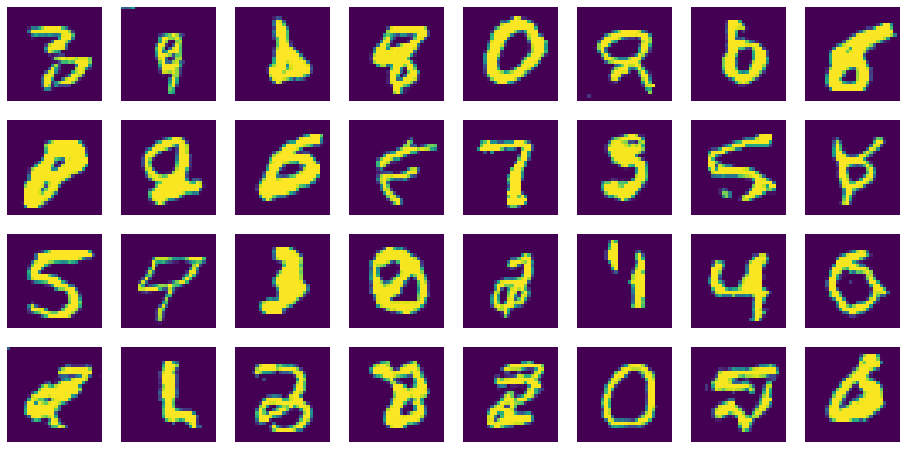

In [16]:


ncol = 8
nrow = n_samples // ncol
plt.figure(figsize=(16, 8))
for i in range(n_samples):
    pxi = pixels[i] # note: undo the encoding permutation
    
    plt.subplot(nrow, ncol, i+1)
    plt.imshow(pxi.view(28,28).cpu().numpy().astype(np.uint8))
    plt.axis('off')

In [17]:
from fastai.vision.all import *
dls=DataLoaders(train_dataset,test_dataset)

In [18]:
learn=Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                opt_func=partial(Adam, sqr_mom=0.95, wd=0.1)).to_fp16()

In [19]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,time


ValueError: not enough values to unpack (expected 2, got 1)